# 1. EDA (Exploratory Data Analysis)
### 1.0 Dataset Overview

We are working with continuous numerical data that refers to gene expression levels. The genes do not have a specific target, but the gene expression levels of the subjects have been evaluated under various conditions. We will employ unsupervised machine learning methods to assess:
- Clusters of genes

--> Explanation of the indices (rows) and how they should be compared: 
- t0: baseline
- t10: after 10-day bed rest
- t40: after 4 weeks of retraining
- basal: normal state
- insulin: state stimulated by insulin

The focus is on the gene expression:
- After a 10-day bed rest compared to the baseline condition
- After 4 weeks of retraining compared to bed rest
- Under normal condition and insulin stimulation
- After retraining and the baseline condition?

Interesting pathways:
- PGCA - mitochondrial factors
- akt - mTOR - foxo/ulk
- YAP/TAZ
- Immunologic factors (immune cells)
- Neovascularization
>Write them on a list (Genecards - Reactome)

### 1.1. Form Analysis - Dataframe initialization
- Target Identification:
    - No target, but we will create it: timing (pre - post training) and treatment (basal or insulin).
- Number of Rows and Columns:
    - (41094, 61) The genes are represented in rows, and the subjects are represented in columns.
    - We will transpose the table for further analysis.
- Variable Types:
    - Continuous numerical variables (gene expression levels).
    - Presence of negative values: these values are normalized and centered around 0.
- Identification of Missing Values:
    - No NaN values present.
- Renaming Columns:
    - dt.columns=Gene_list to place the gene names in columns (not realized yet due to some issues). We will continue working with the Excel file separately for now.

### 1.2. Content Analysis
- Visualization of different rows:
    - t0: baseline.
    - t10: after 10-day bed rest.
    - t40: after 4 weeks of retraining.
    - basal: normal state.
    - insulin: state stimulated by insulin.
- Visualization of the target (hist / boxplot) + elimination of unnecessary columns:
    - The targets are time and treatment.
    - df = original transposed DataFrame.
    - dt = transposed DataFrame with irrelevant test columns removed.
- Understanding different variables:
    - Grouping of genes related to the same pathway:
        - PGC1a.
        - mTOR.
        - YAP/TAZ.
- Visualization of feature-target relationships:
    - Many extreme data points, indicating that we may need to normalize and remove outliers using RobustScaler.
- Identification of outliers:
    - Presence of outliers: highly expressed genes?
        - A transcript can increase up to several thousand-fold or even more.


### 1.3. Primary conclusion
- Null Hypothesis: 
    -  which gene expression level enable us to show if an individual is rested or trained


# 2. Pre-processing
### 2.1. Processing the datas into an adequate format
- NaN: no NaN
- we will work only with the basal condition, thus removing the insulin rows
    - we thus only have 16 samples. We will continue the process for the sake of it but we should add more data
- Evaluating the best way to encode our dataframe: 
    - Searching for a method to evaluate the outliers in a more efficient way (e.g. z_score based)
    - decide what to do with the outliers (we probably have to keep them)
    - We will then evaluate how to proceed to work on our dataframe. Ideally, we could create a df comprising all the gene of interest (after we did some research on it)
    - How to replace the negative values? --> calculating the fold change from pre to post, then adding 1 to the baseline values, then multiply post values by the new baselin values
- Creating a dataframe containing only genes of interest --> because we want to study these path but we could also work with all the columns
    - handling the columns containing the same name
- Encoding
- Train set & test set

- Here is the preprocessing protocol : 
    - Selection of the columns of interest
    - Droping insulin condition
    - keeping only the t10 and t40 index
    - Rename t10 as pre and t40 as post
    - MinMaxScaler to normalize the data
    - renaming and reindexing (a step could be avoided in the whole process)

# 3. Pre-modelling
### 3.1. Creating an Initial Model
- Initial test modeling : DecisionTreeClassifier 
- Evaluation procedure (defining an evaluation function)
    - We will test different method for normalizing the data
    - We will then quickly evaluate them with a Descision tree classifier and decide which model we will keep : 
        - MinMaxScaler for now because i am not sure about the reliability of my method

### 3.2. Improving Model Performance
- Outlier removal
- Feature selection
- Feature engineering
- Feature scaling
- Data leakage
- Boosting / Bagging
==> Training different models
==> Optimization with GridSearchCV
==> (optional) Return to pre-processing / EDA
==> Learning curve and decision-making
#### Decision Tree:
- Underfitting:
    - Polynomial features
    - Feature engineering
    - More complex model
- Overfitting:
    - Imputation / fillna
    - SelectionFromModel
    - Regularization

# 4. Modeling
- Define an evaluation function
- Training different models
- Optimization with GridSearchCV
- (optional) Error analysis and return to Pre-Processing / EDA
- Learning Curve and decision-making

# ===================================

# 1.EDA

### 1.1. Form analysis - Dataframe initialization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_excel('C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Comparative transcriptome analysis\\GSE24215_series_matrix.xlsx')

In [52]:
data.shape

(41094, 61)

In [53]:
data.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [54]:
data.head(20)

ID_REF     GSM595555  GSM595556  GSM595557  GSM595558  \
0      (+)E1A_r60_1  5.822849e-02   0.001721   0.002581   0.005396   
1      (+)E1A_r60_3  4.369316e-01  -0.190861   0.137169  -0.010424   
2   (+)E1A_r60_a104  2.869620e-01  -0.213172  -0.036234  -0.258640   
3   (+)E1A_r60_a107  8.874679e-02   0.136940   0.269694   0.106604   
4   (+)E1A_r60_a135  1.562166e-02   0.153755   0.184788   0.098168   
5    (+)E1A_r60_a20 -4.679203e-03   0.086548   0.121772   0.021582   
6    (+)E1A_r60_a22  3.617668e-02   0.109297   0.205160   0.137590   
7    (+)E1A_r60_a97  1.532969e-01   0.196301   0.266307   0.162905   
8    (+)E1A_r60_n11  8.000851e-03   0.119800   0.206942   0.087627   
9     (+)E1A_r60_n9  1.851559e-02   0.062444   0.148083   0.072693   
10        (+)eQC-39  3.666310e-01   0.115744   0.071602   0.027034   
11        (+)eQC-40  3.899884e-01  -0.062403   0.203055   0.112030   
12        (+)eQC-41  3.886380e-01   0.058408   0.071875   0.117877   
13        (+)eQC-42  4.901299e-01   0.022176   0.171754   0.121323   
14        (-)3xSLv1  4.992366e-01  -0.085976   0.200780   0.104327   
15     A_23_P100001  3.352332e-01  -0.480982  -0.045446   0.017447   
16     A_23_P100011 -1.985402e-01  -0.127105  -0.450820   0.151247   
17     A_23_P100022  7.878876e-02  -0.651698   0.161137  -0.039346   
18     A_23_P100056  1.531892e+07   0.032748  -0.010238  -0.277390   
19     A_23_P100074 -2.301836e-02   0.000338  -0.000185   0.121688   

       GSM595559  GSM595560  GSM595561  GSM595562     GSM595563  ...  \
0  -1.747847e-01   0.382848  -0.064884  -0.107848  4.022465e-01  ...   
1   1.020819e+07   0.516491   0.010424  -0.373842  2.516599e-01  ...   
2   7.288194e-01   0.547183   0.010607  -0.394155  4.461207e-01  ...   
3  -3.570301e-01   0.993039   0.154344   0.231828  1.014038e+07  ...   
4  -1.748061e-01   0.887050   0.105878   0.058809  1.071613e+07  ...   
5  -1.978736e-01   0.730979   0.059990  -0.042139  9.560590e-01  ...   
6  -1.617146e-01   0.815261   0.148487   0.051849  1.008632e+07  ...   
7  -2.618837e-02   0.902563   0.168108   0.081681  9.127021e-01  ...   
8  -1.448541e-01   0.834477   0.086397   0.013698  1.051734e+07  ...   
9  -1.358767e-01   0.651303   0.084957  -0.000136  9.545383e-01  ...   
10  1.088996e+07   0.417087   0.163850  -0.424716  3.220110e-01  ...   
11  9.678235e-01   0.416936   0.021888  -0.399221  4.601064e-01  ...   
12  1.092538e+07   0.525958   0.000855  -0.431586  3.964710e-01  ...   
13  1.083751e+07   0.558189   0.212002  -0.171721  3.798599e-01  ...   
14  1.114593e+06   0.513185   0.118333  -0.307525  3.701463e-01  ...   
15  1.884858e+07   0.212528   0.387056   0.604475  2.730594e-01  ...   
16  4.980822e-01   0.339771  -0.033788   0.061002  4.900165e-01  ...   
17  3.341799e-01   0.907474   0.676310   0.937646  1.296429e+07  ...   
18 -4.015470e-02   0.057361  -0.061857  -0.367176 -1.059020e-01  ...   
19  9.669127e-01   0.564459   0.890457   0.406206 -7.630491e-02  ...   

       GSM595605     GSM595606  GSM595607     GSM595608  GSM595609  GSM595610  \
0  -1.017485e-01 -3.105020e-01  -0.068686 -3.746729e-01  -0.090518  -0.291028   
1  -1.598983e-01 -4.699793e-01  -0.130371  1.585836e+07   0.528262  -0.217233   
2  -4.656448e-01  4.620089e-01  -0.203420  3.076084e+07   0.121137  -0.395579   
3  -1.337573e-01  1.636441e-01   0.048233  1.780665e+07  -0.318635  -0.521027   
4  -1.617751e-01 -3.167033e-01  -0.042809 -2.979159e-01  -0.239561  -0.393270   
5  -2.337623e-01 -4.697032e-01  -0.147709 -5.167623e-01  -0.374741  -0.505344   
6  -1.729679e-01 -3.452368e-01  -0.148009 -4.970055e-01  -0.341270  -0.451969   
7  -3.221083e-02 -2.413936e-01   0.036068 -3.574309e-01  -0.184251  -0.342060   
8  -1.082387e-01 -2.809167e-01  -0.019908 -4.186387e-01  -0.246826  -0.396188   
9  -1.144915e-01 -3.140678e-01  -0.073128 -4.475679e-01  -0.192508  -0.381151   
10 -2.453046e-01 -5.715170e-01  -0.194167  2.436576e-01   0.392729  -0.228547   
11 -2.654648e-01 -1.813192e-01  -0.103734  2.811338e+06  

In [55]:
data.tail(100)

ID_REF     GSM595555     GSM595556     GSM595557  \
40994               A_32_P99432  8.034420e-02 -1.385832e-01  4.465389e-02   
40995               A_32_P99444  4.883304e-01 -1.196637e-01  1.511488e-01   
40996               A_32_P99461  2.947083e-01 -1.516075e-01  6.978207e-01   
40997               A_32_P99492 -4.298544e-02 -5.307698e-01  1.545152e+07   
40998               A_32_P99533 -3.784637e-01 -4.543753e-01  8.488941e-02   
40999               A_32_P99549  6.879726e-01 -1.996598e-01  6.089544e-02   
41000                A_32_P9963 -9.286118e-02 -1.710138e-01  3.858833e-01   
41001               A_32_P99638  5.861535e-01 -1.027546e-01  2.096910e-01   
41002               A_32_P99648 -6.267810e-01 -6.104088e-01 -3.984256e-01   
41003               A_32_P99690  6.278057e-01  4.315805e-01  4.118490e-01   
41004               A_32_P99700  2.105319e-01 -2.744863e-01  3.981950e-01   
41005               A_32_P99715 -4.850316e-02 -1.228690e-02  1.067283e-01   
41006               A_32_P99744  3.402138e-01 -2.217674e-01  1.097088e-01   
41007               A_32_P99753 -3.010924e-01 -1.752765e-01 -2.683456e-01   
41008               A_32_P99804 -6.659334e-01  3.344481e-01 -2.960680e-01   
41009               A_32_P99825  4.855194e-01 -9.511662e-02  1.570625e-01   
41010                A_32_P9986  4.675035e-01 -1.017246e-01  1.469450e-01   
41011               A_32_P99864 -2.592559e-01  3.063295e+07 -3.862076e-01   
41012               A_32_P99902  2.675977e-01 -2.855735e-01  9.514475e-02   
41013               A_32_P99933  4.889984e-01 -1.114612e-01  1.943779e-01   
41014               A_32_P99942  4.102039e-01 -1.586714e-01  1.007404e-01   
41015                    AT_D_3  4.504442e-01 -1.254950e-01  1.401424e-01   
41016                    AT_D_5  5.216989e-01 -1.246061e-01  1.731157e-01   
41017                    AT_D_M  4.726744e-01 -9.135628e-02  1.630945e-01   
41018                    AT_L_3  5.956874e-01 -1.106734e-01  1.700649e-01   
41019                    AT_L_5  5.027771e-01 -8.206892e-02  1.959972e-01   
41020                    AT_L_M  4.586248e-01 -5.594158e-02  1.791525e-01   
41021                   AT_nB_3 -1.141381e-01  8.252335e-02  6.622696e-02   
41022                   AT_nB_5  1.272366e+07 -7.350302e-02  5.725450e-01   
41023                   AT_nC_3  2.229519e-01 -1.282864e-01  1.799660e-01   
41024                   AT_nC_5  3.503289e-01 -7.192802e-02  8.544645e-01   
41025                   AT_nD_3  1.470614e-01  2.740240e-02  4.411745e-02   
41026                   AT_nD_5  3.264184e-01 -2.870455e-01  4.371414e-01   
41027                   AT_nX_3  5.114155e-01 -1.305194e-01  1.513982e-01   
41028                   AT_nX_5  6.988435e-01 -2.081113e-01  8.054972e-02   
41029                    AT_P_3  5.098858e-01 -6.149340e-02  2.274566e-01   
41030                    AT_P_5  4.849639e-01 -7.410002e-02  2.061925e-01   
41031                    AT_P_M  6.792226e-01 -9.216738e-02  2.059774e-01   
41032               AT_ssH_AB_3  6.761217e-01  9.990225e-01  4.437532e-01   
41033               AT_ssH_AB_5 -2.076559e-01 -2.139597e-01 -2.736874e-01   
41034               AT_ssH_GD_3 -1.179161e-01  2.752609e-01  7.631302e-02   
41035               AT_ssH_GD_5  4.113903e-01 -8.437347e-02  5.158071e-01   
41036               AT_ssH_PC_3 -1.139374e-01 -2.340879e-01 -3.290710e-01   
41037               AT_ssH_PC_5 -1.889439e-01 -1.305942e-01 -6.751947e-01   
41038               AT_ssH_RR_3 -1.360377e+07 -1.027545e+06 -1.249128e+07   
41039               AT_ssH_RR_5 -3.043055e-01  1.255097e-01 -3.699145e-01   
41040               AT_ssH_TR_3  9.767737e-01  3.780703e-01 -2.471781e-02   
41041               AT_ssH_TR_5  1.078272e-01  3.254085e-01 -4.211850e-01   
41042                    AT_T_3  4.806480e-01 -9.132385e-02  1.691942e-01   
41043                    AT_T_5  4.199634e-01 -1.467919e-01  1.190839e-01   
41044                    AT_T_M  4.734125e-01 -8.617640e-02  1.858396e-01   
41045                

#### Our array's rows comprise the genes names. Our columns comprise samples. The ID_RED column is referring to the genes ID's.
#### We will transpose our dataframe and use ID_REF as columns names.

In [3]:
genes=data.ID_REF.to_list()

In [4]:
len(genes)

41094

In [5]:
df=data.transpose()
df.columns=genes

In [6]:
df

(+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107  \
ID_REF     (+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107   
GSM595555      0.058228      0.436932         0.286962         0.088747   
GSM595556      0.001721     -0.190861        -0.213172          0.13694   
GSM595557      0.002581      0.137169        -0.036234         0.269694   
GSM595558      0.005396     -0.010424         -0.25864         0.106604   
...                 ...           ...              ...              ...   
GSM595610     -0.291028     -0.217233        -0.395579        -0.521027   
GSM595611     -0.509419     -0.176217        -0.368241        -0.751717   
GSM595612     -0.294459     -0.220764        -0.416386        -0.268868   
GSM595613     -0.032714     -0.059772        -0.010607         0.067655   
GSM595614      0.131787      0.011164         0.085698        -0.006668   

           (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97  \
ID_REF     (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97   
GSM595555         0.015622       -0.004679        0.036177        0.153297   
GSM595556         0.153755        0.086548        0.109297        0.196301   
GSM595557         0.184788        0.121772         0.20516        0.266307   
GSM595558         0.098168        0.021582         0.13759        0.162905   
...                    ...             ...             ...             ...   
GSM595610         -0.39327       -0.505344       -0.451969        -0.34206   
GSM595611        -0.786601       -0.986129        -0.86708       -0.756115   
GSM595612        -0.324461       -0.380846       -0.372736       -0.290148   
GSM595613        -0.015622        0.045696       -0.050747        0.067162   
GSM595614         0.091681        0.101914        0.098777        0.168927   

           (+)E1A_r60_n11  (+)E1A_r60_n9  ...      RC12       RC2       RC3  \
ID_REF     (+)E1A_r60_n11  (+)E1A_r60_n9  ...      RC12       RC2       RC3   
GSM595555        0.008001       0.018516  ...  0.539712  0.493619  0.480468   
GSM595556          0.1198       0.062444  ... -0.119395 -0.023501 -0.106772   
GSM595557        0.206942       0.148083  ...  0.178414  0.280689   0.17386   
GSM595558        0.087627       0.072693  ...  0.109232  0.111441  0.083696   
...                   ...            ...  ...       ...       ...       ...   
GSM595610       -0.396188      -0.381151  ... -0.077959 -0.093119 -0.100692   
GSM595611       -0.813049      -0.664608  ... -0.081916 -0.020406 -0.067632   
GSM595612       -0.339686      -0.369613  ...  -0.32964 -0.262619 -0.250381   
GSM595613       -0.006303      -0.064403  ...  0.001372  0.039303  0.050408   
GSM595614        0.149512       0.102921  ...  0.011377 -0.004325  0.030082   

                RC4       RC5       RC6       RC7       RC8       RC9  \
ID_REF          RC4       RC5       RC6       RC7       RC8       RC9   
GSM595555  0.542186  0.504606  0.508277  0.520182  0.496939  0.505733   
GSM595556  -0.05469  -0.01103 -0.071909  -0.03053 -0.101592 -0.109594   
GSM595557  0.181992  0.335987  0.177259  0.255585  0.189295  0.200929   
GSM595558  0.085302  0.092687  0.126153  0.265812  0.090048  0.129613   
...             ...       ...       ...       ...       ...       ...   
GSM595610 -0.111057  -0.12089 -0.126072 -0.100825  -0.10135  -0.10045   
GSM595611 -0.019668 -0.070546 -0.086359 -0.027839 -0.065886 -0.049293   
GSM595612  -0.27414  -0.29425 -0.306423 -0.286193 -0.292465 -0.215354   
GSM595613  0.027741    0.0045  0.046854  0.033579  0.045466  0.022834   
GSM595614   0.08801 -0.047383 -0.026744 -0.010468  -0.00115 -0.009031   

           !series_matrix_table_end  
ID_REF     !series_matrix_table_end  
GSM595555                       NaN  
GSM595556                       NaN  
GSM595557                       NaN  
GSM595558                       NaN  
...                             ...  
GSM595610                       NaN  
GSM595611                       NaN  
GSM59

In [7]:
df.dtypes.value_counts()

object    41094
dtype: int64

In [8]:
df.iloc[0:1]

(+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107  \
ID_REF  (+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107   

        (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97  \
ID_REF  (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97   

        (+)E1A_r60_n11  (+)E1A_r60_n9  ...  RC12  RC2  RC3  RC4  RC5  RC6  \
ID_REF  (+)E1A_r60_n11  (+)E1A_r60_n9  ...  RC12  RC2  RC3  RC4  RC5  RC6   

        RC7  RC8  RC9  !series_matrix_table_end  
ID_REF  RC7  RC8  RC9  !series_matrix_table_end  

[1 rows x 41094 columns]

#### We will get rid of the ID_REF row since our columns are already named after it

In [9]:
dt=df.drop(['ID_REF'])

In [10]:
dt=dt.drop(['!series_matrix_table_end'], axis=1)

In [11]:
dt

(+)E1A_r60_1 (+)E1A_r60_3 (+)E1A_r60_a104 (+)E1A_r60_a107  \
GSM595555     0.058228     0.436932        0.286962        0.088747   
GSM595556     0.001721    -0.190861       -0.213172         0.13694   
GSM595557     0.002581     0.137169       -0.036234        0.269694   
GSM595558     0.005396    -0.010424        -0.25864        0.106604   
GSM595559    -0.174785   10208187.0        0.728819        -0.35703   
GSM595560     0.382848     0.516491        0.547183        0.993039   
GSM595561    -0.064884     0.010424        0.010607        0.154344   
GSM595562    -0.107848    -0.373842       -0.394155        0.231828   
GSM595563     0.402246      0.25166        0.446121      10140378.0   
GSM595564     0.170053    -0.292097       -0.185668        0.200171   
GSM595565     0.101808    -0.385324       -0.610465        0.007142   
GSM595566    -0.011377    -0.371051        -0.58469       -0.187417   
GSM595567     0.193253    -0.206574       -0.376997        0.006668   
GSM595568      0.11678    -0.323925       -0.655428       -0.035231   
GSM595569    -0.001721    -0.449904       -0.730577       -0.134456   
GSM595570     0.067977    -0.235834        -0.53618       -0.180928   
GSM595571     0.245551     0.037642        0.031863        0.254471   
GSM595572     0.021964    -0.443345       -0.275558        0.143226   
GSM595573    -0.101307     -0.53888       -0.748976       -0.192001   
GSM595574    -0.072093   10638728.0      15599775.0        0.850379   
GSM595575     0.138299     0.362815        0.343974       -0.184839   
GSM595576     0.064759      0.05352       -0.208112       -0.079443   
GSM595577     -0.14731    -0.611245        -0.60359       -0.133712   
GSM595578     0.029881    -0.189289       -0.366587        0.121031   
GSM595579      0.08588    -0.125145       -0.153274        0.118971   
GSM595580      0.10236    -0.377854        0.049353        0.273134   
GSM595581    -0.071019     0.327333        0.036319       -0.257451   
GSM595582     0.545249      0.24818        0.848263       1183068.0   
GSM595583    -0.354438    2145803.0      18188281.0       -0.437557   
GSM595584     0.049001      0.08366        0.152107        0.080244   
GSM595585    -0.190608    -0.116946       -0.355796       -0.654067   
GSM595586    -0.190842     0.162885       -0.146102       -0.945832   
GSM595587    -0.351352   21432962.0      37745194.0      24100964.0   
GSM595588     0.025437     0.223448        0.442142        0.315725   
GSM595589    -0.182979     0.113856         0.17232       -0.308296   
GSM595590     0.058705     0.230297        0.222811       -0.039305   
GSM595591     0.091773     0.352761        0.271683       -0.095795   
GSM595592    -0.093141     0.071215        0.157646       -0.107809   
GSM595593     0.072604     0.774891        0.436098        0.103606   
GSM595594    -0.126012     0.668612        0.443256       -0.498798   
GSM595595     0.058179     0.184191        0.032616       -0.096881   
GSM595596     0.106029     0.791627        0.547371       -0.056556   
GSM595597     0.200363     0.634662         0.53427        0.048061   
GSM595598     0.028061    -0.117207         -0.1418       -0.082608   
GSM595599     0.040895     -0.37526        0.229431         0.37324   
GSM595600    -0.036885    -0.611526       -0.612792        0.142341   
GSM595601    -0.002378     -0.43351       -0.424074       -0.102848   
GSM595602    -0.010173    -0.418262        -0.05409        0.513337   
GSM595603    -0.067222     0.163607        0.044514       -0.276133   
GSM595604    -0.027165    -0.206143       -0.226526        -0.08073   
GSM595605    -0.101748    -0.159898       -0.465645       -0.133757   
GSM595606    -0.310502    -0.469979        0.462009        0.163644   
GSM595607    -0.068686    -0.130371        -0.20342        0.048233   
GSM595608    -0.374673   15858364.0      30760837.0      17806652.0   
GSM595609    -0.090518     0.528262        0.121137       -0.318635   
GSM595610    -0.291028    -0.21723

In [12]:
text = 'Muscle_t0_basal_rep1 Muscle_t0_insulin-rep1 Muscle_t10_basal_rep1 Muscle_t10_insulin_rep1 Muscle_t40_basal_rep1 Muscle_t0_basal_rep2 Muscle_t0_insulin-rep2 Muscle_t10_basal_rep2 Muscle_t10_insulin_rep2 Muscle_t40_basal_rep2 Muscle_t0_basal_rep3 Muscle_t0_insulin-rep3 Muscle_t10_basal_rep3 Muscle_t10_insulin_rep3 Muscle_t40_basal_rep3 Muscle_t0_basal_rep4 Muscle_t0_insulin-rep4 Muscle_t10_basal_rep4 Muscle_t10_insulin_rep4 Muscle_t40_basal_rep4 Muscle_t0_basal_rep5 Muscle_t0_insulin-rep5 Muscle_t10_basal_rep5 Muscle_t10_insulin_rep5 Muscle_t40_basal_rep5 Muscle_t0_basal_rep6 Muscle_t0_insulin-rep6 Muscle_t10_basal_rep6 Muscle_t10_insulin_rep6 Muscle_t40_basal_rep6 Muscle_t0_basal_rep7 Muscle_t0_insulin-rep7 Muscle_t10_basal_rep7 Muscle_t10_insulin_rep7 Muscle_t40_basal_rep7 Muscle_t0_basal_rep8 Muscle_t0_insulin-rep8 Muscle_t10_basal_rep8 Muscle_t10_insulin_rep8 Muscle_t40_basal_rep8 Muscle_t0_basal_rep9 Muscle_t0_insulin-rep9 Muscle_t10_basal_rep9 Muscle_t10_insulin_rep9 Muscle_t40_basal_rep9 Muscle_t0_basal_rep10 Muscle_t0_insulin-rep10 Muscle_t10_basal_rep10 Muscle_t10_insulin_rep10 Muscle_t40_basal_rep10 Muscle_t0_basal_rep1_techrep Muscle_t40_basal_rep1_techrep Muscle_t0_insulin-rep4_techrep Muscle_t40_basal_rep4_techrep Muscle_t0_basal_rep5_techrep Muscle_t0_insulin-rep6_techrep Muscle_t10_insulin_rep6_techrep Muscle_t10_basal_rep7_techrep Muscle_t0_insulin-rep8_techrep Muscle_t10_basal_rep9_techrep'

In [13]:
row_list = text.split(' ')

In [14]:
index = dt.index

In [15]:
row_list

['Muscle_t0_basal_rep1',
 'Muscle_t0_insulin-rep1',
 'Muscle_t10_basal_rep1',
 'Muscle_t10_insulin_rep1',
 'Muscle_t40_basal_rep1',
 'Muscle_t0_basal_rep2',
 'Muscle_t0_insulin-rep2',
 'Muscle_t10_basal_rep2',
 'Muscle_t10_insulin_rep2',
 'Muscle_t40_basal_rep2',
 'Muscle_t0_basal_rep3',
 'Muscle_t0_insulin-rep3',
 'Muscle_t10_basal_rep3',
 'Muscle_t10_insulin_rep3',
 'Muscle_t40_basal_rep3',
 'Muscle_t0_basal_rep4',
 'Muscle_t0_insulin-rep4',
 'Muscle_t10_basal_rep4',
 'Muscle_t10_insulin_rep4',
 'Muscle_t40_basal_rep4',
 'Muscle_t0_basal_rep5',
 'Muscle_t0_insulin-rep5',
 'Muscle_t10_basal_rep5',
 'Muscle_t10_insulin_rep5',
 'Muscle_t40_basal_rep5',
 'Muscle_t0_basal_rep6',
 'Muscle_t0_insulin-rep6',
 'Muscle_t10_basal_rep6',
 'Muscle_t10_insulin_rep6',
 'Muscle_t40_basal_rep6',
 'Muscle_t0_basal_rep7',
 'Muscle_t0_insulin-rep7',
 'Muscle_t10_basal_rep7',
 'Muscle_t10_insulin_rep7',
 'Muscle_t40_basal_rep7',
 'Muscle_t0_basal_rep8',
 'Muscle_t0_insulin-rep8',
 'Muscle_t10_basal_rep8'

In [16]:
index

Index(['GSM595555', 'GSM595556', 'GSM595557', 'GSM595558', 'GSM595559',
       'GSM595560', 'GSM595561', 'GSM595562', 'GSM595563', 'GSM595564',
       'GSM595565', 'GSM595566', 'GSM595567', 'GSM595568', 'GSM595569',
       'GSM595570', 'GSM595571', 'GSM595572', 'GSM595573', 'GSM595574',
       'GSM595575', 'GSM595576', 'GSM595577', 'GSM595578', 'GSM595579',
       'GSM595580', 'GSM595581', 'GSM595582', 'GSM595583', 'GSM595584',
       'GSM595585', 'GSM595586', 'GSM595587', 'GSM595588', 'GSM595589',
       'GSM595590', 'GSM595591', 'GSM595592', 'GSM595593', 'GSM595594',
       'GSM595595', 'GSM595596', 'GSM595597', 'GSM595598', 'GSM595599',
       'GSM595600', 'GSM595601', 'GSM595602', 'GSM595603', 'GSM595604',
       'GSM595605', 'GSM595606', 'GSM595607', 'GSM595608', 'GSM595609',
       'GSM595610', 'GSM595611', 'GSM595612', 'GSM595613', 'GSM595614'],
      dtype='object')

In [17]:
dico = {k: v for k, v in zip(index, row_list)}

In [18]:
dico

{'GSM595555': 'Muscle_t0_basal_rep1',
 'GSM595556': 'Muscle_t0_insulin-rep1',
 'GSM595557': 'Muscle_t10_basal_rep1',
 'GSM595558': 'Muscle_t10_insulin_rep1',
 'GSM595559': 'Muscle_t40_basal_rep1',
 'GSM595560': 'Muscle_t0_basal_rep2',
 'GSM595561': 'Muscle_t0_insulin-rep2',
 'GSM595562': 'Muscle_t10_basal_rep2',
 'GSM595563': 'Muscle_t10_insulin_rep2',
 'GSM595564': 'Muscle_t40_basal_rep2',
 'GSM595565': 'Muscle_t0_basal_rep3',
 'GSM595566': 'Muscle_t0_insulin-rep3',
 'GSM595567': 'Muscle_t10_basal_rep3',
 'GSM595568': 'Muscle_t10_insulin_rep3',
 'GSM595569': 'Muscle_t40_basal_rep3',
 'GSM595570': 'Muscle_t0_basal_rep4',
 'GSM595571': 'Muscle_t0_insulin-rep4',
 'GSM595572': 'Muscle_t10_basal_rep4',
 'GSM595573': 'Muscle_t10_insulin_rep4',
 'GSM595574': 'Muscle_t40_basal_rep4',
 'GSM595575': 'Muscle_t0_basal_rep5',
 'GSM595576': 'Muscle_t0_insulin-rep5',
 'GSM595577': 'Muscle_t10_basal_rep5',
 'GSM595578': 'Muscle_t10_insulin_rep5',
 'GSM595579': 'Muscle_t40_basal_rep5',
 'GSM595580': '

In [19]:
dt.rename(index=dico)

(+)E1A_r60_1 (+)E1A_r60_3 (+)E1A_r60_a104  \
Muscle_t0_basal_rep1                0.058228     0.436932        0.286962   
Muscle_t0_insulin-rep1              0.001721    -0.190861       -0.213172   
Muscle_t10_basal_rep1               0.002581     0.137169       -0.036234   
Muscle_t10_insulin_rep1             0.005396    -0.010424        -0.25864   
Muscle_t40_basal_rep1              -0.174785   10208187.0        0.728819   
Muscle_t0_basal_rep2                0.382848     0.516491        0.547183   
Muscle_t0_insulin-rep2             -0.064884     0.010424        0.010607   
Muscle_t10_basal_rep2              -0.107848    -0.373842       -0.394155   
Muscle_t10_insulin_rep2             0.402246      0.25166        0.446121   
Muscle_t40_basal_rep2               0.170053    -0.292097       -0.185668   
Muscle_t0_basal_rep3                0.101808    -0.385324       -0.610465   
Muscle_t0_insulin-rep3             -0.011377    -0.371051        -0.58469   
Muscle_t10_basal_rep3               0.193253    -0.206574       -0.376997   
Muscle_t10_insulin_rep3              0.11678    -0.323925       -0.655428   
Muscle_t40_basal_rep3              -0.001721    -0.449904       -0.730577   
Muscle_t0_basal_rep4                0.067977    -0.235834        -0.53618   
Muscle_t0_insulin-rep4              0.245551     0.037642        0.031863   
Muscle_t10_basal_rep4               0.021964    -0.443345       -0.275558   
Muscle_t10_insulin_rep4            -0.101307     -0.53888       -0.748976   
Muscle_t40_basal_rep4              -0.072093   10638728.0      15599775.0   
Muscle_t0_basal_rep5                0.138299     0.362815        0.343974   
Muscle_t0_insulin-rep5              0.064759      0.05352       -0.208112   
Muscle_t10_basal_rep5               -0.14731    -0.611245        -0.60359   
Muscle_t10_insulin_rep5             0.029881    -0.189289       -0.366587   
Muscle_t40_basal_rep5                0.08588    -0.125145       -0.153274   
Muscle_t0_basal_rep6                 0.10236    -0.377854        0.049353   
Muscle_t0_insulin-rep6             -0.071019     0.327333        0.036319   
Muscle_t10_basal_rep6               0.545249      0.24818        0.848263   
Muscle_t10_insulin_rep6            -0.354438    2145803.0      18188281.0   
Muscle_t40_basal_rep6               0.049001      0.08366        0.152107   
Muscle_t0_basal_rep7               -0.190608    -0.116946       -0.355796   
Muscle_t0_insulin-rep7             -0.190842     0.162885       -0.146102   
Muscle_t10_basal_rep7              -0.351352   21432962.0      37745194.0   
Muscle_t10_insulin_rep7             0.025437     0.223448        0.442142   
Muscle_t40_basal_rep7              -0.182979     0.113856         0.17232   
Muscle_t0_basal_rep8                0.058705     0.230297        0.222811   
Muscle_t0_insulin-rep8              0.091773     0.352761        0.271683   
Muscle_t10_basal_rep8              -0.093141     0.071215        0.157646   
Muscle_t10_insulin_rep8             0.072604     0.774891        0.436098   
Muscle_t40_basal_rep8              -0.126012     0.668612        0.443256   
Muscle_t0_basal_rep9                0.058179     0.184191        0.032616   
Muscle_t0_insulin-rep9              0.106029     0.791627        0.547371   
Muscle_t10_basal_rep9               0.200363     0.634662         0.53427   
Muscle_t10_insulin_rep9             0.028061    -0.117207         -0.1418   
Muscle_t40_basal_rep9               0.040895     -0.37526        0.229431   
Muscle_t0_basal_rep10              -0.036885    -0.611526       -0.612792   
Muscle_t0_insulin-rep10            -0.002378     -0.43351       -0.424074   
Muscle_t10_basal_rep10             -0.010173    -0.418262        -0.05409   
Muscle_t10_insulin_rep10           -0.067222     0.163607        0.044514   
Muscle_t40_basal_rep10             -0.027165    -0.206143       -0.226526   
Muscle_t0_basal_rep1_techrep       -0.101748    -0.159898       -0.465645   
Muscle_t40_basal_rep1_techre

In [20]:
row_list

['Muscle_t0_basal_rep1',
 'Muscle_t0_insulin-rep1',
 'Muscle_t10_basal_rep1',
 'Muscle_t10_insulin_rep1',
 'Muscle_t40_basal_rep1',
 'Muscle_t0_basal_rep2',
 'Muscle_t0_insulin-rep2',
 'Muscle_t10_basal_rep2',
 'Muscle_t10_insulin_rep2',
 'Muscle_t40_basal_rep2',
 'Muscle_t0_basal_rep3',
 'Muscle_t0_insulin-rep3',
 'Muscle_t10_basal_rep3',
 'Muscle_t10_insulin_rep3',
 'Muscle_t40_basal_rep3',
 'Muscle_t0_basal_rep4',
 'Muscle_t0_insulin-rep4',
 'Muscle_t10_basal_rep4',
 'Muscle_t10_insulin_rep4',
 'Muscle_t40_basal_rep4',
 'Muscle_t0_basal_rep5',
 'Muscle_t0_insulin-rep5',
 'Muscle_t10_basal_rep5',
 'Muscle_t10_insulin_rep5',
 'Muscle_t40_basal_rep5',
 'Muscle_t0_basal_rep6',
 'Muscle_t0_insulin-rep6',
 'Muscle_t10_basal_rep6',
 'Muscle_t10_insulin_rep6',
 'Muscle_t40_basal_rep6',
 'Muscle_t0_basal_rep7',
 'Muscle_t0_insulin-rep7',
 'Muscle_t10_basal_rep7',
 'Muscle_t10_insulin_rep7',
 'Muscle_t40_basal_rep7',
 'Muscle_t0_basal_rep8',
 'Muscle_t0_insulin-rep8',
 'Muscle_t10_basal_rep8'

In [21]:
for i in range(len(row_list)):
    row_list[i] = row_list[i].replace('Muscle_', '')
row_list

['t0_basal_rep1',
 't0_insulin-rep1',
 't10_basal_rep1',
 't10_insulin_rep1',
 't40_basal_rep1',
 't0_basal_rep2',
 't0_insulin-rep2',
 't10_basal_rep2',
 't10_insulin_rep2',
 't40_basal_rep2',
 't0_basal_rep3',
 't0_insulin-rep3',
 't10_basal_rep3',
 't10_insulin_rep3',
 't40_basal_rep3',
 't0_basal_rep4',
 't0_insulin-rep4',
 't10_basal_rep4',
 't10_insulin_rep4',
 't40_basal_rep4',
 't0_basal_rep5',
 't0_insulin-rep5',
 't10_basal_rep5',
 't10_insulin_rep5',
 't40_basal_rep5',
 't0_basal_rep6',
 't0_insulin-rep6',
 't10_basal_rep6',
 't10_insulin_rep6',
 't40_basal_rep6',
 't0_basal_rep7',
 't0_insulin-rep7',
 't10_basal_rep7',
 't10_insulin_rep7',
 't40_basal_rep7',
 't0_basal_rep8',
 't0_insulin-rep8',
 't10_basal_rep8',
 't10_insulin_rep8',
 't40_basal_rep8',
 't0_basal_rep9',
 't0_insulin-rep9',
 't10_basal_rep9',
 't10_insulin_rep9',
 't40_basal_rep9',
 't0_basal_rep10',
 't0_insulin-rep10',
 't10_basal_rep10',
 't10_insulin_rep10',
 't40_basal_rep10',
 't0_basal_rep1_techrep',

In [22]:
dico = {k: v for k, v in zip(index, row_list)}

In [23]:
dt=dt.rename(index=dico)

In [24]:
dt.head()

(+)E1A_r60_1 (+)E1A_r60_3 (+)E1A_r60_a104 (+)E1A_r60_a107  \
t0_basal_rep1        0.058228     0.436932        0.286962        0.088747   
t0_insulin-rep1      0.001721    -0.190861       -0.213172         0.13694   
t10_basal_rep1       0.002581     0.137169       -0.036234        0.269694   
t10_insulin_rep1     0.005396    -0.010424        -0.25864        0.106604   
t40_basal_rep1      -0.174785   10208187.0        0.728819        -0.35703   

                 (+)E1A_r60_a135 (+)E1A_r60_a20 (+)E1A_r60_a22 (+)E1A_r60_a97  \
t0_basal_rep1           0.015622      -0.004679       0.036177       0.153297   
t0_insulin-rep1         0.153755       0.086548       0.109297       0.196301   
t10_basal_rep1          0.184788       0.121772        0.20516       0.266307   
t10_insulin_rep1        0.098168       0.021582        0.13759       0.162905   
t40_basal_rep1         -0.174806      -0.197874      -0.161715      -0.026188   

                 (+)E1A_r60_n11 (+)E1A_r60_n9  ...       RC11        RC12  \
t0_basal_rep1          0.008001      0.018516  ...   0.482773    0.539712   
t0_insulin-rep1          0.1198      0.062444  ...  -0.090741   -0.119395   
t10_basal_rep1         0.206942      0.148083  ...   0.202036    0.178414   
t10_insulin_rep1       0.087627      0.072693  ...   0.075169    0.109232   
t40_basal_rep1        -0.144854     -0.135877  ...  1152379.0  10972738.0   

                         RC2         RC3         RC4         RC5         RC6  \
t0_basal_rep1       0.493619    0.480468    0.542186    0.504606    0.508277   
t0_insulin-rep1    -0.023501   -0.106772    -0.05469    -0.01103   -0.071909   
t10_basal_rep1      0.280689     0.17386    0.181992    0.335987    0.177259   
t10_insulin_rep1    0.111441    0.083696    0.085302    0.092687    0.126153   
t40_basal_rep1    11481633.0  10998378.0  11091809.0  11742034.0  10152526.0   

                         RC7         RC8         RC9  
t0_basal_rep1       0.520182    0.496939    0.505733  
t0_insulin-rep1     -0.03053   -0.101592   -0.109594  
t10_basal_rep1      0.255585    0.189295    0.200929  
t10_insulin_rep1    0.265812    0.090048    0.129613  
t40_basal_rep1    11378756.0  10547471.0  10431852.0  

[5 rows x 41093 columns]

In [25]:
row_list[1]

't0_insulin-rep1'

In [26]:
dt=dt.iloc[:-10, :]

In [27]:
dt

(+)E1A_r60_1 (+)E1A_r60_3 (+)E1A_r60_a104 (+)E1A_r60_a107  \
t0_basal_rep1         0.058228     0.436932        0.286962        0.088747   
t0_insulin-rep1       0.001721    -0.190861       -0.213172         0.13694   
t10_basal_rep1        0.002581     0.137169       -0.036234        0.269694   
t10_insulin_rep1      0.005396    -0.010424        -0.25864        0.106604   
t40_basal_rep1       -0.174785   10208187.0        0.728819        -0.35703   
t0_basal_rep2         0.382848     0.516491        0.547183        0.993039   
t0_insulin-rep2      -0.064884     0.010424        0.010607        0.154344   
t10_basal_rep2       -0.107848    -0.373842       -0.394155        0.231828   
t10_insulin_rep2      0.402246      0.25166        0.446121      10140378.0   
t40_basal_rep2        0.170053    -0.292097       -0.185668        0.200171   
t0_basal_rep3         0.101808    -0.385324       -0.610465        0.007142   
t0_insulin-rep3      -0.011377    -0.371051        -0.58469       -0.187417   
t10_basal_rep3        0.193253    -0.206574       -0.376997        0.006668   
t10_insulin_rep3       0.11678    -0.323925       -0.655428       -0.035231   
t40_basal_rep3       -0.001721    -0.449904       -0.730577       -0.134456   
t0_basal_rep4         0.067977    -0.235834        -0.53618       -0.180928   
t0_insulin-rep4       0.245551     0.037642        0.031863        0.254471   
t10_basal_rep4        0.021964    -0.443345       -0.275558        0.143226   
t10_insulin_rep4     -0.101307     -0.53888       -0.748976       -0.192001   
t40_basal_rep4       -0.072093   10638728.0      15599775.0        0.850379   
t0_basal_rep5         0.138299     0.362815        0.343974       -0.184839   
t0_insulin-rep5       0.064759      0.05352       -0.208112       -0.079443   
t10_basal_rep5        -0.14731    -0.611245        -0.60359       -0.133712   
t10_insulin_rep5      0.029881    -0.189289       -0.366587        0.121031   
t40_basal_rep5         0.08588    -0.125145       -0.153274        0.118971   
t0_basal_rep6          0.10236    -0.377854        0.049353        0.273134   
t0_insulin-rep6      -0.071019     0.327333        0.036319       -0.257451   
t10_basal_rep6        0.545249      0.24818        0.848263       1183068.0   
t10_insulin_rep6     -0.354438    2145803.0      18188281.0       -0.437557   
t40_basal_rep6        0.049001      0.08366        0.152107        0.080244   
t0_basal_rep7        -0.190608    -0.116946       -0.355796       -0.654067   
t0_insulin-rep7      -0.190842     0.162885       -0.146102       -0.945832   
t10_basal_rep7       -0.351352   21432962.0      37745194.0      24100964.0   
t10_insulin_rep7      0.025437     0.223448        0.442142        0.315725   
t40_basal_rep7       -0.182979     0.113856         0.17232       -0.308296   
t0_basal_rep8         0.058705     0.230297        0.222811       -0.039305   
t0_insulin-rep8       0.091773     0.352761        0.271683       -0.095795   
t10_basal_rep8       -0.093141     0.071215        0.157646       -0.107809   
t10_insulin_rep8      0.072604     0.774891        0.436098        0.103606   
t40_basal_rep8       -0.126012     0.668612        0.443256       -0.498798   
t0_basal_rep9         0.058179     0.184191        0.032616       -0.096881   
t0_insulin-rep9       0.106029     0.791627        0.547371       -0.056556   
t10_basal_rep9        0.200363     0.634662         0.53427        0.048061   
t10_insulin_rep9      0.028061    -0.117207         -0.1418       -0.082608   
t40_basal_rep9        0.040895     -0.37526        0.229431         0.37324   
t0_basal_rep10       -0.036885    -0.611526       -0.612792        0.142341   
t0_insulin-rep10     -0.002378     -0.43351       -0.424074       -0.102848   
t10_basal_rep10      -0.010173    -0.418262        -0.05409        0.513337   
t10_insulin_rep10    -0.067222     0.163607        0.044514       -0.276133   
t40_basal_rep10      -0.027165    -0.206143       -0.226526        -

#### I will check if the df contains NaN

In [28]:
dt.isna().sum().sum()

0

## 1.2. Content analysis

#### Droping the columns that don't refer to genes - based on agilent whole 44k documentation

In [29]:
dt=dt.drop(dt.iloc[:, 0:14], axis=1)

In [30]:
dt.head()

(-)3xSLv1 A_23_P100001 A_23_P100011 A_23_P100022  \
t0_basal_rep1      0.499237     0.335233     -0.19854     0.078789   
t0_insulin-rep1   -0.085976    -0.480982    -0.127105    -0.651698   
t10_basal_rep1      0.20078    -0.045446     -0.45082     0.161137   
t10_insulin_rep1   0.104327     0.017447     0.151247    -0.039346   
t40_basal_rep1    1114593.0   18848577.0     0.498082      0.33418   

                 A_23_P100056 A_23_P100074 A_23_P100092 A_23_P100103  \
t0_basal_rep1      15318921.0    -0.023018     -0.09325    -0.226954   
t0_insulin-rep1      0.032748     0.000338     0.144243    -0.048192   
t10_basal_rep1      -0.010238    -0.000185     0.096157    -0.302989   
t10_insulin_rep1     -0.27739     0.121688     0.109054     0.265533   
t40_basal_rep1      -0.040155     0.966913    -0.067466    -0.086299   

                 A_23_P100111 A_23_P100127  ...       RC11        RC12  \
t0_basal_rep1       -0.453899     0.519914  ...   0.482773    0.539712   
t0_insulin-rep1     -0.445986    -0.152225  ...  -0.090741   -0.119395   
t10_basal_rep1      -0.797921     0.162173  ...   0.202036    0.178414   
t10_insulin_rep1    -0.650673     0.070255  ...   0.075169    0.109232   
t40_basal_rep1       0.336258   13043389.0  ...  1152379.0  10972738.0   

                         RC2         RC3         RC4         RC5         RC6  \
t0_basal_rep1       0.493619    0.480468    0.542186    0.504606    0.508277   
t0_insulin-rep1    -0.023501   -0.106772    -0.05469    -0.01103   -0.071909   
t10_basal_rep1      0.280689     0.17386    0.181992    0.335987    0.177259   
t10_insulin_rep1    0.111441    0.083696    0.085302    0.092687    0.126153   
t40_basal_rep1    11481633.0  10998378.0  11091809.0  11742034.0  10152526.0   

                         RC7         RC8         RC9  
t0_basal_rep1       0.520182    0.496939    0.505733  
t0_insulin-rep1     -0.03053   -0.101592   -0.109594  
t10_basal_rep1      0.255585    0.189295    0.200929  
t10_insulin_rep1    0.265812    0.090048    0.129613  
t40_basal_rep1    11378756.0  10547471.0  10431852.0  

[5 rows x 41079 columns]

In [31]:
dt=dt.drop(dt.iloc[:, 0:1], axis=1)

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
dt.iloc[:, 41000:]

AT_D_3      AT_D_5      AT_D_M      AT_L_3      AT_L_5  \
t0_basal_rep1        0.450444    0.521699    0.472674    0.595687    0.502777   
t0_insulin-rep1     -0.125495   -0.124606   -0.091356   -0.110673   -0.082069   
t10_basal_rep1       0.140142    0.173116    0.163095    0.170065    0.195997   
t10_insulin_rep1     0.024895    0.063601    0.102393    0.134861    0.101769   
t40_basal_rep1     10930204.0  10314517.0  10181813.0  10536056.0  11204252.0   
t0_basal_rep2        0.495019    0.458414    0.500505    0.518159    0.516498   
t0_insulin-rep2     -0.022175    0.050844    0.077682    0.056345    0.131829   
t10_basal_rep2      -0.327246   -0.354018   -0.322636   -0.310194   -0.323581   
t10_insulin_rep2     0.463548    0.420869    0.367941    0.396589    0.390188   
t40_basal_rep2      -0.366936   -0.303217   -0.327842   -0.343674   -0.323043   
t0_basal_rep3       -0.012183   -0.376742   -0.458312   -0.459326   -0.447698   
t0_insulin-rep3      -0.41052   -0.337754   -0.387464   -0.299085   -0.363828   
t10_basal_rep3       -0.14562   -0.152418   -0.126185   -0.124435   -0.090302   
t10_insulin_rep3    -0.175151   -0.200183   -0.380191   -0.368598   -0.349207   
t40_basal_rep3      -0.673434   -0.590537   -0.526462   -0.553936   -0.570344   
t0_basal_rep4       -0.218985   -0.204426   -0.109983   -0.181267    -0.15346   
t0_insulin-rep4      0.037175    0.149341   -0.011307    0.005746   -0.013511   
t10_basal_rep4      -0.256105    -0.35859   -0.421297   -0.423139   -0.412234   
t10_insulin_rep4    -0.602467   -0.487347   -0.573664   -0.563272   -0.543933   
t40_basal_rep4       0.275157   -0.487831    0.749019   -0.346107   -0.432224   
t0_basal_rep5        0.344932    0.408567    0.378911    0.335268    0.423354   
t0_insulin-rep5     -0.018842    0.030436    0.035757    0.033324    0.061282   
t10_basal_rep5      -0.686836   -0.664065   -0.637314   -0.680847   -0.644465   
t10_insulin_rep5    -0.109209   -0.088092   -0.069824   -0.089733    -0.05733   
t40_basal_rep5       0.025023   -0.050764   -0.058669   -0.048398   -0.043335   
t0_basal_rep6       -0.510316   -0.522971   -0.502885   -0.510551   -0.488839   
t0_insulin-rep6      0.420691    0.448029    0.619403    0.466101    0.456966   
t10_basal_rep6       0.024755    0.073708    0.079365    0.088855    0.097595   
t10_insulin_rep6   22231932.0  22190442.0  22178063.0  22212338.0    225005.0   
t40_basal_rep6       0.012183    0.038444     0.04923    0.033007    0.082528   
t0_basal_rep7       -0.137317    0.014611    -0.09053   -0.133877   -0.062434   
t0_insulin-rep7      0.192049    0.228382    0.190855    0.186302    0.263886   
t10_basal_rep7     19413571.0    0.459715  26249056.0   1261725.0  20922809.0   
t10_insulin_rep7     0.203121    0.247419    0.226947    0.244929    0.372201   
t40_basal_rep7       0.155149    0.174573     0.17288    0.171773    0.187424   
t0_basal_rep8        0.301398    0.192725    0.247228    0.188831    0.211134   
t0_insulin-rep8      0.433101    0.447968    0.419322    0.577975    0.444536   
t10_basal_rep8       0.156729    0.012022    0.006903   -0.005746     0.03424   
t10_insulin_rep8     0.682622    0.731206    0.718989    0.694895    0.825596   
t40_basal_rep8       0.751694    0.781689    0.782345    0.789675    0.860683   
t0_basal_rep9        0.170568    0.220375    0.198346    0.244389    0.215746   
t0_insulin-rep9       0.71087    0.728354    0.745883    0.737018    0.756009   
t10_basal_rep9       0.651307    0.669821    0.710201    0.694924    0.710351   
t10_insulin_rep9    -0.219008   -0.218614   -0.179972   -0.217112   -0.055058   
t40_basal_rep9      -0.297574    -0.19673   -0.277494   -0.257119   -0.250149   
t0_basal_rep10      -0.643905   -0.599984   -0.619136   -0.618665   -0.558891   
t0_insulin-rep10    -0.552835     -0.5087   -0.521784   -0.515736   -0.493344   
t10_basal_rep10     -0.410498   -0.286761   -0.383145   -0.379631   -0.366791   
t10_insulin_rep10    0.239332    0.313117    0.293654 

In [34]:
dt=dt.drop(dt.iloc[:, 41000:], axis=1)

In [35]:
dt.shape

(50, 41000)

In [36]:
dt.columns

Index(['A_23_P100001', 'A_23_P100011', 'A_23_P100022', 'A_23_P100056',
       'A_23_P100074', 'A_23_P100092', 'A_23_P100103', 'A_23_P100111',
       'A_23_P100127', 'A_23_P100133',
       ...
       'A_32_P99715', 'A_32_P99744', 'A_32_P99753', 'A_32_P99804',
       'A_32_P99825', 'A_32_P9986', 'A_32_P99864', 'A_32_P99902',
       'A_32_P99933', 'A_32_P99942'],
      dtype='object', length=41000)

#### Droping calibration col

In [37]:
dt=dt.iloc[:-10]

#### Splitting in different datasets --> check if necessary now

We will creat different dataframe to work on
- basal vs insuline state
- pre vs post training

In [38]:
dt

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_basal_rep1        0.335233     -0.19854     0.078789   15318921.0   
t0_insulin-rep1     -0.480982    -0.127105    -0.651698     0.032748   
t10_basal_rep1      -0.045446     -0.45082     0.161137    -0.010238   
t10_insulin_rep1     0.017447     0.151247    -0.039346     -0.27739   
t40_basal_rep1     18848577.0     0.498082      0.33418    -0.040155   
t0_basal_rep2        0.212528     0.339771     0.907474     0.057361   
t0_insulin-rep2      0.387056    -0.033788      0.67631    -0.061857   
t10_basal_rep2       0.604475     0.061002     0.937646    -0.367176   
t10_insulin_rep2     0.273059     0.490016   12964287.0    -0.105902   
t40_basal_rep2      -0.060332    -0.251745   15490398.0     0.989612   
t0_basal_rep3        0.035585       0.1715    -0.616434    -0.185254   
t0_insulin-rep3     -0.157832     0.177104    -0.404272    -0.406148   
t10_basal_rep3       0.318801    -0.088048    -0.337891    -0.584497   
t10_insulin_rep3     0.176894     0.155484    -0.498531    -0.497473   
t40_basal_rep3      -0.262558    -0.039362    -0.534764     0.629377   
t0_basal_rep4        0.131788    -0.026765     0.344079     0.519442   
t0_insulin-rep4     -0.193423      0.46144     0.115945     0.160459   
t10_basal_rep4       0.864777      0.53102     0.253137     0.249942   
t10_insulin_rep4     0.244001     0.216695      0.23623     0.008802   
t40_basal_rep4      -0.491333     0.084266   10044565.0   14449432.0   
t0_basal_rep5        -0.22504    -0.019874     -0.14324    -0.088694   
t0_insulin-rep5     -0.127523     0.072827    -0.368538     0.100801   
t10_basal_rep5     10080457.0     0.053988     0.106305     0.087851   
t10_insulin_rep5   12818179.0     0.148007    -0.178359    -0.631345   
t40_basal_rep5     18071952.0     0.162993     -0.24285     0.237144   
t0_basal_rep6       -0.020916    -0.549932     -0.18244   11299198.0   
t0_insulin-rep6     -0.189076    -0.249431    -0.164745      0.29812   
t10_basal_rep6       0.234264     0.310631    -0.300742     0.490343   
t10_insulin_rep6     0.015163    -0.059448    -0.555958    -0.513744   
t40_basal_rep6      -0.013079    -0.052623     0.270617     0.565947   
t0_basal_rep7       -0.083005    -0.068339     0.312889     0.443483   
t0_insulin-rep7     -0.049629      -0.1237     0.254575  -10554473.0   
t10_basal_rep7       0.180495     0.756702   10021057.0   18671052.0   
t10_insulin_rep7     0.156473     0.329353      0.28732    -0.051213   
t40_basal_rep7      -0.058526     -0.00591     0.560473     0.250444   
t0_basal_rep8        0.038973      0.12104    -0.043632    -0.128489   
t0_insulin-rep8     -0.172568      0.07094    -0.335859    -0.841847   
t10_basal_rep8       0.092695    -0.156068     0.132585    -0.249304   
t10_insulin_rep8     0.013079    -0.146926     0.172083     0.106853   
t40_basal_rep8      -0.368081    -0.028728     -0.34658     -0.04299   

                 A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_basal_rep1       -0.023018     -0.09325    -0.226954    -0.453899   
t0_insulin-rep1      0.000338     0.144243    -0.048192    -0.445986   
t10_basal_rep1      -0.000185     0.096157    -0.302989    -0.797921   
t10_insulin_rep1     0.121688     0.109054     0.265533    -0.650673   
t40_basal_rep1       0.966913    -0.067466    -0.086299     0.336258   
t0_basal_rep2        0.564459    -0.203497     0.376927     0.567957   
t0_insulin-rep2      0.890457     0.184862     0.190001      0.14597   
t10_basal_rep2       0.406206     0.040513     0.193428     0.294264   
t10_insulin_rep2    -0.076305     -0.39092     0.165308     0.117611   
t40_basal_rep2      -0.074981    -0.219911     -0.35877    -0.113548   
t0_basal_rep3       -0.120213    -0.129536     0.126042    -0.044962   
t0_insulin-rep3     -0.380065     0.068526     0.037598    -0.076274   
t10_basal_rep3      -0.251754     0.062174     0.026899    -0.425987   
t10_insulin_rep3    -0.073792     0.300916     0.369462 

In [39]:
# Basal
basal = dt.index.str.contains('basal')
basal_df=dt.loc[basal]
basal_df

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_basal_rep1      0.335233     -0.19854     0.078789   15318921.0   
t10_basal_rep1    -0.045446     -0.45082     0.161137    -0.010238   
t40_basal_rep1   18848577.0     0.498082      0.33418    -0.040155   
t0_basal_rep2      0.212528     0.339771     0.907474     0.057361   
t10_basal_rep2     0.604475     0.061002     0.937646    -0.367176   
t40_basal_rep2    -0.060332    -0.251745   15490398.0     0.989612   
t0_basal_rep3      0.035585       0.1715    -0.616434    -0.185254   
t10_basal_rep3     0.318801    -0.088048    -0.337891    -0.584497   
t40_basal_rep3    -0.262558    -0.039362    -0.534764     0.629377   
t0_basal_rep4      0.131788    -0.026765     0.344079     0.519442   
t10_basal_rep4     0.864777      0.53102     0.253137     0.249942   
t40_basal_rep4    -0.491333     0.084266   10044565.0   14449432.0   
t0_basal_rep5      -0.22504    -0.019874     -0.14324    -0.088694   
t10_basal_rep5   10080457.0     0.053988     0.106305     0.087851   
t40_basal_rep5   18071952.0     0.162993     -0.24285     0.237144   
t0_basal_rep6     -0.020916    -0.549932     -0.18244   11299198.0   
t10_basal_rep6     0.234264     0.310631    -0.300742     0.490343   
t40_basal_rep6    -0.013079    -0.052623     0.270617     0.565947   
t0_basal_rep7     -0.083005    -0.068339     0.312889     0.443483   
t10_basal_rep7     0.180495     0.756702   10021057.0   18671052.0   
t40_basal_rep7    -0.058526     -0.00591     0.560473     0.250444   
t0_basal_rep8      0.038973      0.12104    -0.043632    -0.128489   
t10_basal_rep8     0.092695    -0.156068     0.132585    -0.249304   
t40_basal_rep8    -0.368081    -0.028728     -0.34658     -0.04299   

               A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_basal_rep1     -0.023018     -0.09325    -0.226954    -0.453899   
t10_basal_rep1    -0.000185     0.096157    -0.302989    -0.797921   
t40_basal_rep1     0.966913    -0.067466    -0.086299     0.336258   
t0_basal_rep2      0.564459    -0.203497     0.376927     0.567957   
t10_basal_rep2     0.406206     0.040513     0.193428     0.294264   
t40_basal_rep2    -0.074981    -0.219911     -0.35877    -0.113548   
t0_basal_rep3     -0.120213    -0.129536     0.126042    -0.044962   
t10_basal_rep3    -0.251754     0.062174     0.026899    -0.425987   
t40_basal_rep3    -0.205157     0.087178    -0.332609    -0.358913   
t0_basal_rep4      0.047997     0.001566    -0.105532     0.192901   
t10_basal_rep4     0.539813     0.026183     0.045761     0.031198   
t40_basal_rep4    -0.096354     0.075811    -0.213014     0.129094   
t0_basal_rep5      0.099835     -0.10595    -0.483354    -0.024014   
t10_basal_rep5     0.435691    -0.361727    -0.350233     0.164257   
t40_basal_rep5     0.485007    -0.150326    -0.246717     0.065931   
t0_basal_rep6     -0.141771     -0.09547    -0.421948    -0.338057   
t10_basal_rep6      0.43071     0.292614     0.232383     0.291032   
t40_basal_rep6     0.449304     0.222118     0.065774     0.013274   
t0_basal_rep7     -0.258728    -0.021382    -0.166117    -0.220443   
t10_basal_rep7    -0.346364    -0.194026    -0.016208    -0.219537   
t40_basal_rep7    -0.027407    -0.034366    -0.108799     0.066126   
t0_basal_rep8     -0.007724     0.000596     0.198031     0.390229   
t10_basal_rep8     0.004458    -0.066892     0.183815    -0.096447   
t40_basal_rep8    -0.074029     0.166841     0.239921     0.386996   

               A_23_P100127 A_23_P100133  ... A_32_P99715 A_32_P99744  \
t0_basal_rep1      0.519914    -0.419779  ...   -0.048503    0.340214   
t10_basal_rep1     0.162173     -0.29546  ...    0.106728    0.109709   
t40_basal_rep1   13043389.0   21866333.0  ...    0.108463    0.816507   
t0_basal_rep2      0.438276    -0.118039  ...     0.26397      0.4361   
t10_basal_rep2    -0.389084     -0.11772  ...    -0.14335   -0.406758   
t40_basal_rep2    -0.043464    -0.158726  ...   -0.176218    0.521967   
t0

In [40]:
# Insulin
insulin = dt.index.str.contains('insulin')
insulin_df=dt.loc[insulin]
insulin_df

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_insulin-rep1     -0.480982    -0.127105    -0.651698     0.032748   
t10_insulin_rep1     0.017447     0.151247    -0.039346     -0.27739   
t0_insulin-rep2      0.387056    -0.033788      0.67631    -0.061857   
t10_insulin_rep2     0.273059     0.490016   12964287.0    -0.105902   
t0_insulin-rep3     -0.157832     0.177104    -0.404272    -0.406148   
t10_insulin_rep3     0.176894     0.155484    -0.498531    -0.497473   
t0_insulin-rep4     -0.193423      0.46144     0.115945     0.160459   
t10_insulin_rep4     0.244001     0.216695      0.23623     0.008802   
t0_insulin-rep5     -0.127523     0.072827    -0.368538     0.100801   
t10_insulin_rep5   12818179.0     0.148007    -0.178359    -0.631345   
t0_insulin-rep6     -0.189076    -0.249431    -0.164745      0.29812   
t10_insulin_rep6     0.015163    -0.059448    -0.555958    -0.513744   
t0_insulin-rep7     -0.049629      -0.1237     0.254575  -10554473.0   
t10_insulin_rep7     0.156473     0.329353      0.28732    -0.051213   
t0_insulin-rep8     -0.172568      0.07094    -0.335859    -0.841847   
t10_insulin_rep8     0.013079    -0.146926     0.172083     0.106853   

                 A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_insulin-rep1      0.000338     0.144243    -0.048192    -0.445986   
t10_insulin_rep1     0.121688     0.109054     0.265533    -0.650673   
t0_insulin-rep2      0.890457     0.184862     0.190001      0.14597   
t10_insulin_rep2    -0.076305     -0.39092     0.165308     0.117611   
t0_insulin-rep3     -0.380065     0.068526     0.037598    -0.076274   
t10_insulin_rep3    -0.073792     0.300916     0.369462     -0.10405   
t0_insulin-rep4      0.000185    -0.126017     0.294806     0.330225   
t10_insulin_rep4     0.006838    -0.265101       0.0978    -0.294146   
t0_insulin-rep5     -0.094215    -0.035196    -0.000504     0.262297   
t10_insulin_rep5     0.454326     0.097131    -0.469495     0.200252   
t0_insulin-rep6     -0.098207     -0.29271    -0.137356     -0.04248   
t10_insulin_rep6     0.196863     0.297553    -0.207434    -0.524126   
t0_insulin-rep7     -0.153218    -0.000596    -0.142111    -0.057609   
t10_insulin_rep7     -0.06122    -0.185472     0.285063    -0.033473   
t0_insulin-rep8     -0.284581      0.06055     0.213563     0.822154   
t10_insulin_rep8    -0.189719    -0.143209     0.029419    -0.042073   

                 A_23_P100127 A_23_P100133  ... A_32_P99715 A_32_P99744  \
t0_insulin-rep1     -0.152225    -0.062657  ...   -0.012287   -0.221767   
t10_insulin_rep1     0.070255    -0.066625  ...    0.012287   -0.031129   
t0_insulin-rep2      0.022683     0.013064  ...   -0.111359    0.008718   
t10_insulin_rep2     0.317329      0.39479  ...   -0.599734      0.2438   
t0_insulin-rep3     -0.447925     0.122939  ...    0.110227   -0.012468   
t10_insulin_rep3    -0.414125     0.450122  ...     0.24421   -0.199947   
t0_insulin-rep4     -0.075116     0.219625  ...   -0.173281   -0.138338   
t10_insulin_rep4    -0.609667     0.286288  ...   -0.175455    -0.59892   
t0_insulin-rep5     -0.022683     0.467007  ...   -0.101672  21186209.0   
t10_insulin_rep5    -0.124311     0.528647  ...   -0.355687   -0.153381   
t0_insulin-rep6      0.352318    -0.332547  ...   -0.400421    0.469569   
t10_insulin_rep6   22068892.0    -0.525838  ... -10735948.0  21490808.0   
t0_insulin-rep7       0.19723    -0.067073  ...     0.40506    0.225884   
t10_insulin_rep7     0.197165    -0.022284  ...   -0.061133    0.242506   
t0_insulin-rep8      0.556125    -0.010881  ...   -0.051238    0.297133   
t10_insulin_rep8     0.747681     0.057338  ...    0.364722     0.67095   

                 A_32_P99753 A_32_P99804 A_32_P99825  A_32_P9986 A_32_P99864  \
t0_insulin-rep1    -0.175277    0.334448   -0.095117   -0.101725  30632954.0   
t10_insulin_rep1    0.012189    0.534261     0.08022    0.055133   -0.703565   
t0_insulin-rep2     -0.31997    0.449379    0.06231

In [41]:
insulin

array([False,  True, False,  True, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False])

#### Creating different df for later visualization

In [42]:
# Pre and post in basal state
pre=basal_df.index.str.contains('t0')
basal_pre_df=basal_df.loc[pre]

post=basal_df.index.str.contains('t40')
basal_post_df=basal_df.loc[post]

In [43]:
basal_pre_df

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_basal_rep1     0.335233     -0.19854     0.078789   15318921.0   
t0_basal_rep2     0.212528     0.339771     0.907474     0.057361   
t0_basal_rep3     0.035585       0.1715    -0.616434    -0.185254   
t0_basal_rep4     0.131788    -0.026765     0.344079     0.519442   
t0_basal_rep5     -0.22504    -0.019874     -0.14324    -0.088694   
t0_basal_rep6    -0.020916    -0.549932     -0.18244   11299198.0   
t0_basal_rep7    -0.083005    -0.068339     0.312889     0.443483   
t0_basal_rep8     0.038973      0.12104    -0.043632    -0.128489   

              A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_basal_rep1    -0.023018     -0.09325    -0.226954    -0.453899   
t0_basal_rep2     0.564459    -0.203497     0.376927     0.567957   
t0_basal_rep3    -0.120213    -0.129536     0.126042    -0.044962   
t0_basal_rep4     0.047997     0.001566    -0.105532     0.192901   
t0_basal_rep5     0.099835     -0.10595    -0.483354    -0.024014   
t0_basal_rep6    -0.141771     -0.09547    -0.421948    -0.338057   
t0_basal_rep7    -0.258728    -0.021382    -0.166117    -0.220443   
t0_basal_rep8    -0.007724     0.000596     0.198031     0.390229   

              A_23_P100127 A_23_P100133  ... A_32_P99715 A_32_P99744  \
t0_basal_rep1     0.519914    -0.419779  ...   -0.048503    0.340214   
t0_basal_rep2     0.438276    -0.118039  ...     0.26397      0.4361   
t0_basal_rep3    -0.507272     0.083206  ...   -0.035042   -0.572761   
t0_basal_rep4    -0.249541    -0.154485  ...   -0.247927   -0.275829   
t0_basal_rep5     0.889743     0.868759  ...    0.074673     0.28473   
t0_basal_rep6     0.143184    -0.438303  ...   -0.464753   -0.543326   
t0_basal_rep7    -0.107855    -0.291474  ...    0.057175    0.627749   
t0_basal_rep8     0.112216     -0.40691  ...    0.164863    0.192286   

              A_32_P99753 A_32_P99804 A_32_P99825 A_32_P9986 A_32_P99864  \
t0_basal_rep1   -0.301092   -0.665933    0.485519   0.467504   -0.259256   
t0_basal_rep2   -0.251469   -0.044504    0.516424   0.511771    -0.29926   
t0_basal_rep3    0.309987    -0.55707   -0.431509  -0.455502   -0.319669   
t0_basal_rep4     0.27759    0.270964   -0.159651  -0.212076 -10062523.0   
t0_basal_rep5    0.149783   -0.538152    0.468581   0.357579   -0.306076   
t0_basal_rep6    0.561374   -0.517106   -0.487186  -0.481211    0.227994   
t0_basal_rep7    0.108805    0.215371   -0.006163  -0.066271   -0.881413   
t0_basal_rep8    0.069413     0.00137    0.200006   0.178916   -0.590368   

              A_32_P99902 A_32_P99933 A_32_P99942  
t0_basal_rep1    0.267598    0.488998    0.410204  
t0_basal_rep2   -0.615861    0.478361    0.451304  
t0_basal_rep3    0.085149    -0.49307   -0.495397  
t0_basal_rep4   -0.121516   -0.216321   -0.212399  
t0_basal_rep5    0.276024    0.524056    0.379314  
t0_basal_rep6    0.214949    0.692465    0.135839  
t0_basal_rep7    0.362867  17386866.0   -0.078463  
t0_basal_rep8    -0.08257    0.153782    0.170715  

[8 rows x 41000 columns]

In [44]:
basal_post_df

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t40_basal_rep1   18848577.0     0.498082      0.33418    -0.040155   
t40_basal_rep2    -0.060332    -0.251745   15490398.0     0.989612   
t40_basal_rep3    -0.262558    -0.039362    -0.534764     0.629377   
t40_basal_rep4    -0.491333     0.084266   10044565.0   14449432.0   
t40_basal_rep5   18071952.0     0.162993     -0.24285     0.237144   
t40_basal_rep6    -0.013079    -0.052623     0.270617     0.565947   
t40_basal_rep7    -0.058526     -0.00591     0.560473     0.250444   
t40_basal_rep8    -0.368081    -0.028728     -0.34658     -0.04299   

               A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t40_basal_rep1     0.966913    -0.067466    -0.086299     0.336258   
t40_basal_rep2    -0.074981    -0.219911     -0.35877    -0.113548   
t40_basal_rep3    -0.205157     0.087178    -0.332609    -0.358913   
t40_basal_rep4    -0.096354     0.075811    -0.213014     0.129094   
t40_basal_rep5     0.485007    -0.150326    -0.246717     0.065931   
t40_basal_rep6     0.449304     0.222118     0.065774     0.013274   
t40_basal_rep7    -0.027407    -0.034366    -0.108799     0.066126   
t40_basal_rep8    -0.074029     0.166841     0.239921     0.386996   

               A_23_P100127 A_23_P100133  ... A_32_P99715 A_32_P99744  \
t40_basal_rep1   13043389.0   21866333.0  ...    0.108463    0.816507   
t40_basal_rep2    -0.043464    -0.158726  ...   -0.176218    0.521967   
t40_basal_rep3    -0.023208     0.079378  ...    0.049495    0.447376   
t40_basal_rep4      0.58448    -0.015124  ...  14332545.0  10775728.0   
t40_basal_rep5    -0.143319     0.336824  ...   -0.125549   -0.077019   
t40_basal_rep6     0.237191    -0.416826  ...    0.064765   -0.004287   
t40_basal_rep7     0.095493    -0.365831  ...    0.200054     0.15683   
t40_basal_rep8     0.716642    -0.310725  ...    0.129833    0.732348   

               A_32_P99753 A_32_P99804 A_32_P99825  A_32_P9986 A_32_P99864  \
t40_basal_rep1   -0.614332  10604041.0  10715466.0  10333004.0    0.351029   
t40_basal_rep2    0.657118    0.329634   -0.279754   -0.299843    0.684422   
t40_basal_rep3    0.009735   -0.248589   -0.554687   -0.586078    0.278987   
t40_basal_rep4    0.813036    0.109035   -0.487611   -0.523531  20950923.0   
t40_basal_rep5   -0.055476    0.890342   -0.059679   -0.062823   -0.171897   
t40_basal_rep6    0.040592   -0.109558    0.067728     0.07162   -0.767072   
t40_basal_rep7   -0.087352    0.143948    0.178314    0.182812    -0.60745   
t40_basal_rep8    -0.41782   -0.406125     0.78277    0.759642   -0.004169   

               A_32_P99902 A_32_P99933 A_32_P99942  
t40_basal_rep1    0.056957  36773758.0     0.99396  
t40_basal_rep2    0.146494    0.576035   -0.348182  
t40_basal_rep3   -0.164982   -0.628776   -0.621366  
t40_basal_rep4   -0.255452   -0.498746  23413634.0  
t40_basal_rep5    0.074511   -0.114004   -0.113042  
t40_basal_rep6    0.204445   -0.010848    0.008912  
t40_basal_rep7    0.230675     0.14325    0.127068  
t40_basal_rep8    -0.29158    0.790674     0.73454  

[8 rows x 41000 columns]

#### Adding gene names

In [45]:
name=pd.read_excel('C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Comparative transcriptome analysis\\Whole_genome_ID_to_gene.xlsx')

In [46]:
name.shape

(41000, 2)

In [47]:
name.head()

ID     Gene
0  A_23_P100001  FAM174B
1  A_23_P100011    AP3S2
2  A_23_P100022     SV2B
3  A_23_P100056   RBPMS2
4  A_23_P100074     AVEN

In [48]:
ID_list=name['ID'].to_list()

In [49]:
Gene_list=name['Gene'].to_list()

In [50]:
dt.columns=ID_list

In [51]:
#Gene_list=name['Gene'].to_list()
#dt.columns=Gene_list

#### Too many 'technical problems' when manipulating the dataframe with the genes names (NaN detected in the columns names, identical col, etc)

In [52]:
dt.head()

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_basal_rep1        0.335233     -0.19854     0.078789   15318921.0   
t0_insulin-rep1     -0.480982    -0.127105    -0.651698     0.032748   
t10_basal_rep1      -0.045446     -0.45082     0.161137    -0.010238   
t10_insulin_rep1     0.017447     0.151247    -0.039346     -0.27739   
t40_basal_rep1     18848577.0     0.498082      0.33418    -0.040155   

                 A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_basal_rep1       -0.023018     -0.09325    -0.226954    -0.453899   
t0_insulin-rep1      0.000338     0.144243    -0.048192    -0.445986   
t10_basal_rep1      -0.000185     0.096157    -0.302989    -0.797921   
t10_insulin_rep1     0.121688     0.109054     0.265533    -0.650673   
t40_basal_rep1       0.966913    -0.067466    -0.086299     0.336258   

                 A_23_P100127 A_23_P100133  ... A_32_P99715 A_32_P99744  \
t0_basal_rep1        0.519914    -0.419779  ...   -0.048503    0.340214   
t0_insulin-rep1     -0.152225    -0.062657  ...   -0.012287   -0.221767   
t10_basal_rep1       0.162173     -0.29546  ...    0.106728    0.109709   
t10_insulin_rep1     0.070255    -0.066625  ...    0.012287   -0.031129   
t40_basal_rep1     13043389.0   21866333.0  ...    0.108463    0.816507   

                 A_32_P99753 A_32_P99804 A_32_P99825  A_32_P9986 A_32_P99864  \
t0_basal_rep1      -0.301092   -0.665933    0.485519    0.467504   -0.259256   
t0_insulin-rep1    -0.175277    0.334448   -0.095117   -0.101725  30632954.0   
t10_basal_rep1     -0.268346   -0.296068    0.157063    0.146945   -0.386208   
t10_insulin_rep1    0.012189    0.534261     0.08022    0.055133   -0.703565   
t40_basal_rep1     -0.614332  10604041.0  10715466.0  10333004.0    0.351029   

                 A_32_P99902 A_32_P99933 A_32_P99942  
t0_basal_rep1       0.267598    0.488998    0.410204  
t0_insulin-rep1    -0.285573   -0.111461   -0.158671  
t10_basal_rep1      0.095145    0.194378     0.10074  
t10_insulin_rep1   -0.248327    0.080406    0.025804  
t40_basal_rep1      0.056957  36773758.0     0.99396  

[5 rows x 41000 columns]

#### Creating a PGC dataframe based on the newly defined df

In [53]:
pgc_basal_pre=basal_pre_df[['A_23_P256735', 'A_23_P7961', 'A_23_P7965']]
pgc_basal_post=basal_post_df[['A_23_P256735', 'A_23_P7961', 'A_23_P7965']]

In [54]:
pgc_basal=pd.concat([pgc_basal_pre, pgc_basal_post])
pgc_basal

A_23_P256735  A_23_P7961 A_23_P7965
t0_basal_rep1     -0.140093   -0.159424   0.370779
t0_basal_rep2     -0.543313    0.300989   -0.27126
t0_basal_rep3      0.260814   -0.892455   0.520162
t0_basal_rep4      0.000328    0.571447  -0.944255
t0_basal_rep5      0.275877    0.531759  -0.314244
t0_basal_rep6      0.722007   -0.473692   0.625413
t0_basal_rep7      0.542326    0.360322   0.548105
t0_basal_rep8     -0.401742  10466065.0    0.10662
t40_basal_rep1     0.807439    0.670264   0.244638
t40_basal_rep2     0.273715   -0.041543   0.406982
t40_basal_rep3     0.569405    0.236027   0.537505
t40_basal_rep4    -0.220898  24460835.0   0.607409
t40_basal_rep5     0.545911   -0.669307   0.076849
t40_basal_rep6    -0.017022   -0.587719   0.133495
t40_basal_rep7     0.600797   -0.479535  -0.594689
t40_basal_rep8    -0.356026    0.203602   0.001009

In [55]:
pgc_basal.columns=['PGCP', 'PGC1', 'PGC2']

In [56]:
pgc_basal

PGCP        PGC1      PGC2
t0_basal_rep1  -0.140093   -0.159424  0.370779
t0_basal_rep2  -0.543313    0.300989  -0.27126
t0_basal_rep3   0.260814   -0.892455  0.520162
t0_basal_rep4   0.000328    0.571447 -0.944255
t0_basal_rep5   0.275877    0.531759 -0.314244
t0_basal_rep6   0.722007   -0.473692  0.625413
t0_basal_rep7   0.542326    0.360322  0.548105
t0_basal_rep8  -0.401742  10466065.0   0.10662
t40_basal_rep1  0.807439    0.670264  0.244638
t40_basal_rep2  0.273715   -0.041543  0.406982
t40_basal_rep3  0.569405    0.236027  0.537505
t40_basal_rep4 -0.220898  24460835.0  0.607409
t40_basal_rep5  0.545911   -0.669307  0.076849
t40_basal_rep6 -0.017022   -0.587719  0.133495
t40_basal_rep7  0.600797   -0.479535 -0.594689
t40_basal_rep8 -0.356026    0.203602  0.001009

#### Data visualization

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

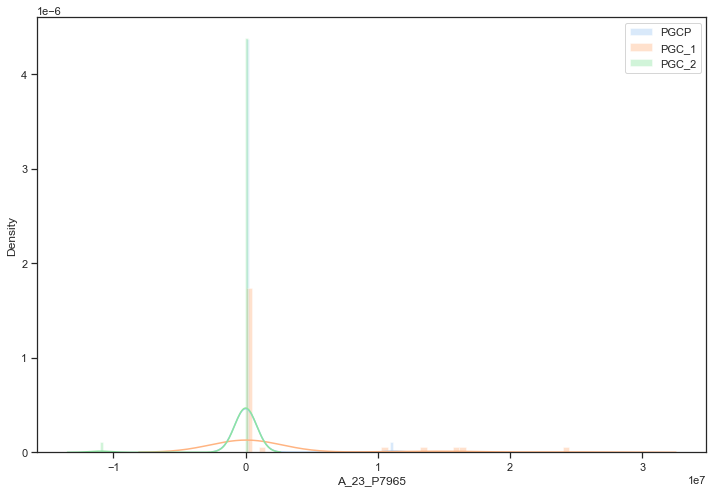

In [333]:
plt.figure(figsize=(12, 8))
sns.distplot(dt['A_23_P256735'], label='PGCP')
sns.distplot(dt['A_23_P7961'], label='PGC_1')
sns.distplot(dt['A_23_P7965'], label='PGC_2')
plt.legend()

#### We clearly see that our data are centered around 0, thus have probably been normalized

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A_23_P256735', ylabel='Density'>

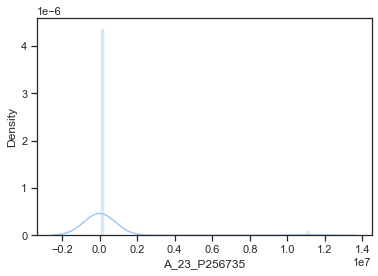

In [347]:
sns.distplot(dt['A_23_P256735'], label='PGCP')

<AxesSubplot:>

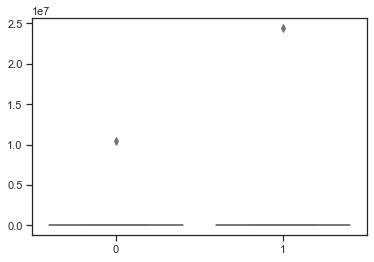

In [348]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=[pgc_basal_pre, pgc_basal_post])

In [349]:
from sklearn.preprocessing import RobustScaler

In [350]:
pgc1=RobustScaler().fit_transform(pgc_basal_pre)
pgc2=RobustScaler().fit_transform(pgc_basal_post)

<AxesSubplot:>

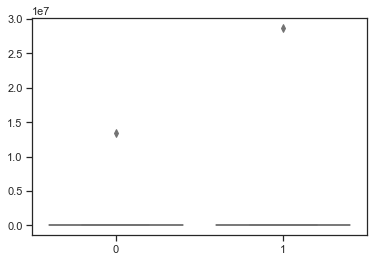

In [351]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=[pgc1, pgc2])

<AxesSubplot:>

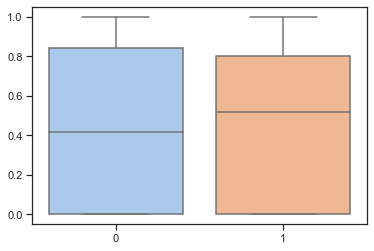

In [353]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
pgc1=minmax.fit_transform(pgc1)
pgc2=minmax.fit_transform(pgc2)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=[pgc1, pgc2])

In order to have a look at some data distributions : 
1. we will drop 'visual' outliers 
2. data visualization
3. Searching for a method to evaluate the outliers in a more efficient way (e.g. z_score based)

We will then evaluate how to proceed to work on our dataframe.
Ideally, we could create a df comprising all the gene of interest (after we did some research on it)

What does the negative value means? : 
> These result from the background being substracted from the spot intensity and if the background is higher than the spot (i.e. no gene detected) it gets a negative value.

I will replace the negative by 0 for the primary data visualization, but will seek for a solution when processing the data

In [109]:
pgc_basal_pre

A_23_P256735  A_23_P7961 A_23_P7965
t0_basal_rep1    -0.140093   -0.159424   0.370779
t0_basal_rep2    -0.543313    0.300989   -0.27126
t0_basal_rep3     0.260814   -0.892455   0.520162
t0_basal_rep4     0.000328    0.571447  -0.944255
t0_basal_rep5     0.275877    0.531759  -0.314244
t0_basal_rep6     0.722007   -0.473692   0.625413
t0_basal_rep7     0.542326    0.360322   0.548105
t0_basal_rep8    -0.401742  10466065.0    0.10662

In [110]:
pgc_basal_pre=pgc_basal_pre[pgc_basal_pre >= 0].fillna(value=0)

In [111]:
pgc_basal_pre=pgc_basal_pre[pgc_basal_pre < 1].fillna(value=0)

In [112]:
pgc_basal_pre

A_23_P256735  A_23_P7961  A_23_P7965
t0_basal_rep1      0.000000    0.000000    0.370779
t0_basal_rep2      0.000000    0.300989    0.000000
t0_basal_rep3      0.260814    0.000000    0.520162
t0_basal_rep4      0.000328    0.571447    0.000000
t0_basal_rep5      0.275877    0.531759    0.000000
t0_basal_rep6      0.722007    0.000000    0.625413
t0_basal_rep7      0.542326    0.360322    0.548105
t0_basal_rep8      0.000000    0.000000    0.106620

<AxesSubplot:>

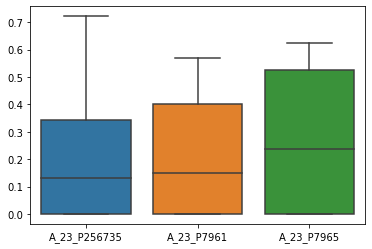

In [113]:
sns.boxplot(data=pgc_basal_pre)

<AxesSubplot:>

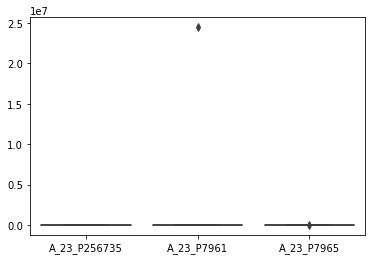

In [114]:
sns.boxplot(data=pgc_basal_post)

In [115]:
pgc_basal_post=pgc_basal_post[pgc_basal_post >= 0].fillna(value=0)
pgc_basal_post=pgc_basal_post[pgc_basal_post < 1].fillna(value=0)

It is quite hard to visualize the data with 2 arrays. We will thus work with one array in which we will encode our data : 
> encode the treatment in a column

In [116]:
dt[dt[dt.index.str.contains('t0')] == True]

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_basal_rep1             NaN          NaN          NaN          NaN   
t0_insulin-rep1           NaN          NaN          NaN          NaN   
t10_basal_rep1            NaN          NaN          NaN          NaN   
t10_insulin_rep1          NaN          NaN          NaN          NaN   
t40_basal_rep1            NaN          NaN          NaN          NaN   
t0_basal_rep2             NaN          NaN          NaN          NaN   
t0_insulin-rep2           NaN          NaN          NaN          NaN   
t10_basal_rep2            NaN          NaN          NaN          NaN   
t10_insulin_rep2          NaN          NaN          NaN          NaN   
t40_basal_rep2            NaN          NaN          NaN          NaN   
t0_basal_rep3             NaN          NaN          NaN          NaN   
t0_insulin-rep3           NaN          NaN          NaN          NaN   
t10_basal_rep3            NaN          NaN          NaN          NaN   
t10_insulin_rep3          NaN          NaN          NaN          NaN   
t40_basal_rep3            NaN          NaN          NaN          NaN   
t0_basal_rep4             NaN          NaN          NaN          NaN   
t0_insulin-rep4           NaN          NaN          NaN          NaN   
t10_basal_rep4            NaN          NaN          NaN          NaN   
t10_insulin_rep4          NaN          NaN          NaN          NaN   
t40_basal_rep4            NaN          NaN          NaN          NaN   
t0_basal_rep5             NaN          NaN          NaN          NaN   
t0_insulin-rep5           NaN          NaN          NaN          NaN   
t10_basal_rep5            NaN          NaN          NaN          NaN   
t10_insulin_rep5          NaN          NaN          NaN          NaN   
t40_basal_rep5            NaN          NaN          NaN          NaN   
t0_basal_rep6             NaN          NaN          NaN          NaN   
t0_insulin-rep6           NaN          NaN          NaN          NaN   
t10_basal_rep6            NaN          NaN          NaN          NaN   
t10_insulin_rep6          NaN          NaN          NaN          NaN   
t40_basal_rep6            NaN          NaN          NaN          NaN   
t0_basal_rep7             NaN          NaN          NaN          NaN   
t0_insulin-rep7           NaN          NaN          NaN          NaN   
t10_basal_rep7            NaN          NaN          NaN          NaN   
t10_insulin_rep7          NaN          NaN          NaN          NaN   
t40_basal_rep7            NaN          NaN          NaN          NaN   
t0_basal_rep8             NaN          NaN          NaN          NaN   
t0_insulin-rep8           NaN          NaN          NaN          NaN   
t10_basal_rep8            NaN          NaN          NaN          NaN   
t10_insulin_rep8          NaN          NaN          NaN          NaN   
t40_basal_rep8            NaN          NaN          NaN          NaN   

                 A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_basal_rep1             NaN          NaN          NaN          NaN   
t0_insulin-rep1           NaN          NaN          NaN          NaN   
t10_basal_rep1            NaN          NaN          NaN          NaN   
t10_insulin_rep1          NaN          NaN          NaN          NaN   
t40_basal_rep1            NaN          NaN          NaN          NaN   
t0_basal_rep2             NaN          NaN          NaN          NaN   
t0_insulin-rep2           NaN          NaN          NaN          NaN   
t10_basal_rep2            NaN          NaN          NaN          NaN   
t10_insulin_rep2          NaN          NaN          NaN          NaN   
t40_basal_rep2            NaN          NaN          NaN          NaN   
t0_basal_rep3             NaN          NaN          NaN          NaN   
t0_insulin-rep3           NaN          NaN          NaN          NaN   
t10_basal_rep3            NaN          NaN          NaN          NaN   
t10_insulin_rep3          NaN          NaN          NaN 

In [57]:
def encode_treatment(index_value):
    if 'basal' in index_value:
        return 0
    elif 'insulin' in index_value:
        return 1

In [58]:
def encode_time(index_value): 
    if 't0' in index_value:
        return 0
    elif 't10' in index_value:
        return 1
    elif 't40' in index_value:
        return 2

In [59]:
dt['treatment'] = dt.index.map(encode_treatment)
dt['time'] = dt.index.map(encode_time)

In [60]:
dt['treatment']

t0_basal_rep1       0
t0_insulin-rep1     1
t10_basal_rep1      0
t10_insulin_rep1    1
t40_basal_rep1      0
t0_basal_rep2       0
t0_insulin-rep2     1
t10_basal_rep2      0
t10_insulin_rep2    1
t40_basal_rep2      0
t0_basal_rep3       0
t0_insulin-rep3     1
t10_basal_rep3      0
t10_insulin_rep3    1
t40_basal_rep3      0
t0_basal_rep4       0
t0_insulin-rep4     1
t10_basal_rep4      0
t10_insulin_rep4    1
t40_basal_rep4      0
t0_basal_rep5       0
t0_insulin-rep5     1
t10_basal_rep5      0
t10_insulin_rep5    1
t40_basal_rep5      0
t0_basal_rep6       0
t0_insulin-rep6     1
t10_basal_rep6      0
t10_insulin_rep6    1
t40_basal_rep6      0
t0_basal_rep7       0
t0_insulin-rep7     1
t10_basal_rep7      0
t10_insulin_rep7    1
t40_basal_rep7      0
t0_basal_rep8       0
t0_insulin-rep8     1
t10_basal_rep8      0
t10_insulin_rep8    1
t40_basal_rep8      0
Name: treatment, dtype: int64

In [61]:
dt.head()

A_23_P100001 A_23_P100011 A_23_P100022 A_23_P100056  \
t0_basal_rep1        0.335233     -0.19854     0.078789   15318921.0   
t0_insulin-rep1     -0.480982    -0.127105    -0.651698     0.032748   
t10_basal_rep1      -0.045446     -0.45082     0.161137    -0.010238   
t10_insulin_rep1     0.017447     0.151247    -0.039346     -0.27739   
t40_basal_rep1     18848577.0     0.498082      0.33418    -0.040155   

                 A_23_P100074 A_23_P100092 A_23_P100103 A_23_P100111  \
t0_basal_rep1       -0.023018     -0.09325    -0.226954    -0.453899   
t0_insulin-rep1      0.000338     0.144243    -0.048192    -0.445986   
t10_basal_rep1      -0.000185     0.096157    -0.302989    -0.797921   
t10_insulin_rep1     0.121688     0.109054     0.265533    -0.650673   
t40_basal_rep1       0.966913    -0.067466    -0.086299     0.336258   

                 A_23_P100127 A_23_P100133  ... A_32_P99753 A_32_P99804  \
t0_basal_rep1        0.519914    -0.419779  ...   -0.301092   -0.665933   
t0_insulin-rep1     -0.152225    -0.062657  ...   -0.175277    0.334448   
t10_basal_rep1       0.162173     -0.29546  ...   -0.268346   -0.296068   
t10_insulin_rep1     0.070255    -0.066625  ...    0.012189    0.534261   
t40_basal_rep1     13043389.0   21866333.0  ...   -0.614332  10604041.0   

                 A_32_P99825  A_32_P9986 A_32_P99864 A_32_P99902 A_32_P99933  \
t0_basal_rep1       0.485519    0.467504   -0.259256    0.267598    0.488998   
t0_insulin-rep1    -0.095117   -0.101725  30632954.0   -0.285573   -0.111461   
t10_basal_rep1      0.157063    0.146945   -0.386208    0.095145    0.194378   
t10_insulin_rep1     0.08022    0.055133   -0.703565   -0.248327    0.080406   
t40_basal_rep1    10715466.0  10333004.0    0.351029    0.056957  36773758.0   

                 A_32_P99942 treatment time  
t0_basal_rep1       0.410204         0    0  
t0_insulin-rep1    -0.158671         1    0  
t10_basal_rep1       0.10074         0    1  
t10_insulin_rep1    0.025804         1    1  
t40_basal_rep1       0.99396         0    2  

[5 rows x 41002 columns]

#### Let's have a look at how normalization and outliers suppression affects our datas

>"Raw" data

In [122]:
pgc = dt[['A_23_P256735', 'A_23_P7961', 'A_23_P7965', 'treatment', 'time']]
pgc.columns=['PGCP', 'PGC1', 'PGC2', 'treatment', 'time']
pgc

PGCP        PGC1        PGC2  treatment  time
t0_basal_rep1      -0.140093   -0.159424    0.370779          0     0
t0_insulin-rep1    -0.338881    0.304341   -0.271654          1     0
t10_basal_rep1      0.344186   -0.153202   -0.617609          0     1
t10_insulin_rep1    -0.26556   -0.262506   -0.210495          1     1
t40_basal_rep1      0.807439    0.670264    0.244638          0     2
t0_basal_rep2      -0.543313    0.300989    -0.27126          0     0
t0_insulin-rep2    -0.488493    0.997705   -0.527639          1     0
t10_basal_rep2      0.104233   -0.013847 -10984597.0          0     1
t10_insulin_rep2    0.098049   -0.279527    0.844446          1     1
t40_basal_rep2      0.273715   -0.041543    0.406982          0     2
t0_basal_rep3       0.260814   -0.892455    0.520162          0     0
t0_insulin-rep3     0.111011    0.657745    0.602119          1     0
t10_basal_rep3      0.358572   -0.719176   -0.812975          0     1
t10_insulin_rep3    0.115564    0.409534   -0.027253          1     1
t40_basal_rep3      0.569405    0.236027    0.537505          0     2
t0_basal_rep4       0.000328    0.571447   -0.944255          0     0
t0_insulin-rep4    -0.567967   -0.575544   -0.729685          1     0
t10_basal_rep4      0.389208    0.139026   -0.496641          0     1
t10_insulin_rep4   -0.237032    0.108291    0.569406          1     1
t40_basal_rep4     -0.220898  24460835.0    0.607409          0     2
t0_basal_rep5       0.275877    0.531759   -0.314244          0     0
t0_insulin-rep5     0.249764   -0.007229    0.064092          1     0
t10_basal_rep5    11151991.0   -0.258325   -0.611071          0     1
t10_insulin_rep5    0.403072   -0.143447   -0.664598          1     1
t40_basal_rep5      0.545911   -0.669307    0.076849          0     2
t0_basal_rep6       0.722007   -0.473692    0.625413          0     0
t0_insulin-rep6    -0.153456   -0.230353   -0.369104          1     0
t10_basal_rep6      -0.15374   -0.598967    0.366182          0     1
t10_insulin_rep6   -0.248251  16356554.0    148034.0          1     1
t40_basal_rep6     -0.017022   -0.587719    0.133495          0     2
t0_basal_rep7       0.542326    0.360322    0.548105          0     0
t0_insulin-rep7    -0.000328    0.515221   -0.154193          1     0
t10_basal_rep7      0.395376  15792418.0    0.877489          0     1
t10_insulin_rep7    0.219353   -0.145486    0.128804          1     1
t40_basal_rep7      0.600797   -0.479535   -0.594689          0     2
t0_basal_rep8      -0.401742  10466065.0     0.10662          0     0
t0_insulin-rep8    -0.441544    0.133608   -0.357747          1     0
t10_basal_rep8     -0.201024   1283947.0   -0.150563          0     1
t10_insulin_rep8   -0.384392  13300481.0    0.945369          1     1
t40_basal_rep8     -0.356026    0.203602    0.001009          0     2

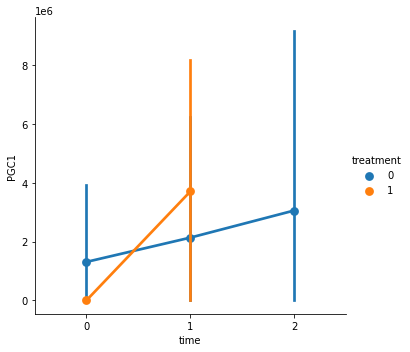

In [123]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC1', hue='treatment', kind='point')

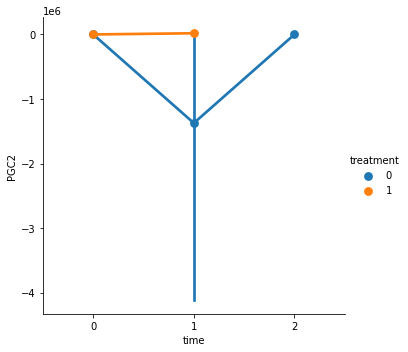

In [108]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC2', hue='treatment', kind='point')

>Filled negative data with 0 and outliers with 5

In [109]:
pgc=pgc[pgc > 0].fillna(value=0)
pgc=pgc[pgc < 5].fillna(value=5)

In [110]:
pgc

PGCP      PGC1      PGC2  treatment  time
t0_basal_rep1     0.000000  0.000000  0.370779        0.0   0.0
t0_insulin-rep1   0.000000  0.304341  0.000000        1.0   0.0
t10_basal_rep1    0.344186  0.000000  0.000000        0.0   1.0
t10_insulin_rep1  0.000000  0.000000  0.000000        1.0   1.0
t40_basal_rep1    0.807439  0.670264  0.244638        0.0   2.0
t0_basal_rep2     0.000000  0.300989  0.000000        0.0   0.0
t0_insulin-rep2   0.000000  0.997705  0.000000        1.0   0.0
t10_basal_rep2    0.104233  0.000000  0.000000        0.0   1.0
t10_insulin_rep2  0.098049  0.000000  0.844446        1.0   1.0
t40_basal_rep2    0.273715  0.000000  0.406982        0.0   2.0
t0_basal_rep3     0.260814  0.000000  0.520162        0.0   0.0
t0_insulin-rep3   0.111011  0.657745  0.602119        1.0   0.0
t10_basal_rep3    0.358572  0.000000  0.000000        0.0   1.0
t10_insulin_rep3  0.115564  0.409534  0.000000        1.0   1.0
t40_basal_rep3    0.569405  0.236027  0.537505        0.0   2.0
t0_basal_rep4     0.000328  0.571447  0.000000        0.0   0.0
t0_insulin-rep4   0.000000  0.000000  0.000000        1.0   0.0
t10_basal_rep4    0.389208  0.139026  0.000000        0.0   1.0
t10_insulin_rep4  0.000000  0.108291  0.569406        1.0   1.0
t40_basal_rep4    0.000000  5.000000  0.607409        0.0   2.0
t0_basal_rep5     0.275877  0.531759  0.000000        0.0   0.0
t0_insulin-rep5   0.249764  0.000000  0.064092        1.0   0.0
t10_basal_rep5    5.000000  0.000000  0.000000        0.0   1.0
t10_insulin_rep5  0.403072  0.000000  0.000000        1.0   1.0
t40_basal_rep5    0.545911  0.000000  0.076849        0.0   2.0
t0_basal_rep6     0.722007  0.000000  0.625413        0.0   0.0
t0_insulin-rep6   0.000000  0.000000  0.000000        1.0   0.0
t10_basal_rep6    0.000000  0.000000  0.366182        0.0   1.0
t10_insulin_rep6  0.000000  5.000000  5.000000        1.0   1.0
t40_basal_rep6    0.000000  0.000000  0.133495        0.0   2.0
t0_basal_rep7     0.542326  0.360322  0.548105        0.0   0.0
t0_insulin-rep7   0.000000  0.515221  0.000000        1.0   0.0
t10_basal_rep7    0.395376  5.000000  0.877489        0.0   1.0
t10_insulin_rep7  0.219353  0.000000  0.128804        1.0   1.0
t40_basal_rep7    0.600797  0.000000  0.000000        0.0   2.0
t0_basal_rep8     0.000000  5.000000  0.106620        0.0   0.0
t0_insulin-rep8   0.000000  0.133608  0.000000        1.0   0.0
t10_basal_rep8    0.000000  5.000000  0.000000        0.0   1.0
t10_insulin_rep8  0.000000  5.000000  0.945369        1.0   1.0
t40_basal_rep8    0.000000  0.203602  0.001009        0.0   2.0

In [111]:
pgc[['PGCP', 'PGC1', 'PGC2']].columns

Index(['PGCP', 'PGC1', 'PGC2'], dtype='object')

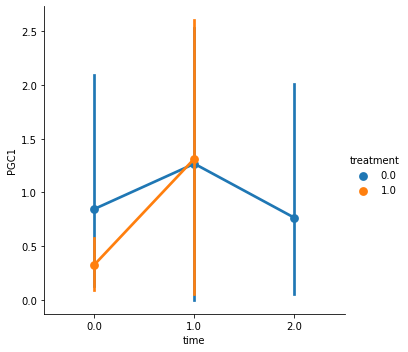

In [112]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC1', hue='treatment', kind='point')

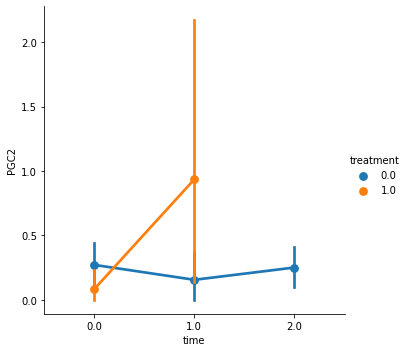

In [113]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC2', hue='treatment', kind='point')

>Filled negative data with 0 and outliers with 0

In [114]:
pgc=pgc[pgc > 0].fillna(value=0)
pgc=pgc[pgc < 5].fillna(value=0)

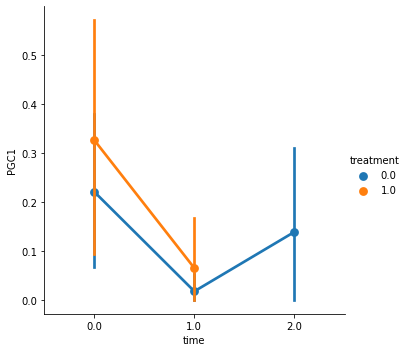

In [115]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC1', hue='treatment', kind='point')

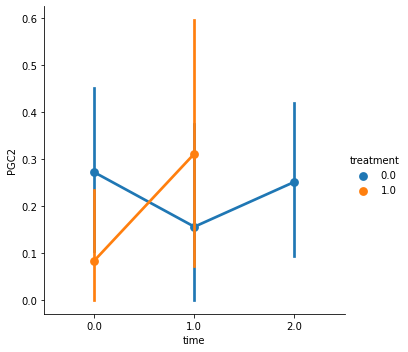

In [116]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC2', hue='treatment', kind='point')

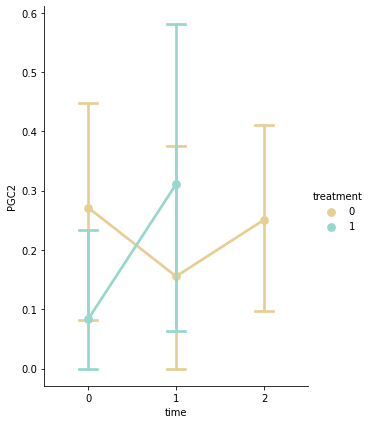

In [74]:
cat=sns.catplot(
    data=pgc,x='time',y='PGC2', hue='treatment',capsize=.2, palette="BrBG", errorbar="se",
    kind="point", height=6, aspect=.75)

<AxesSubplot:xlabel='time', ylabel='PGC1'>

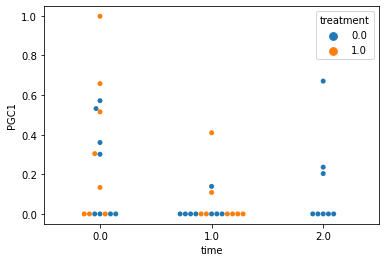

In [123]:
sns.swarmplot(data=pgc,x='time',y='PGC1', hue='treatment')

We removed the outliers in order to visualize the data.
Now we cannot just remove the outliers as they can increase a lot in some cases.

## 1.3. Primary conclusion

Null Hypothesis:  
> the target gene expression levele is similar among trained and untrained individuals. 

> we could also seek for gene pattern --> unsupervised ml 

# 2. Pre-processing

## 2.1. Treating our datas to better suit for ML 

- NaN: no NaN
- we will work only with the basal condition, thus removing the insulin rows
- Evaluating the best way to encode our dataframe: 
    - Searching for a method to evaluate the outliers in a more efficient way (e.g. z_score based)
    - decide what to do with the outliers (we probably have to keep them)
    - We will then evaluate how to proceed to work on our dataframe. Ideally, we could create a df comprising all the gene of interest (after we did some research on it)
    - How to replace the negative values? --> calculating the fold change from pre to post, then adding 1 to the baseline values, then multiply post values by the new baselin values
- Creating a dataframe containing only genes of interest
- Encoding
- Train set & test set

We have a lot of negative values in transcriptomics dataset because the initial values are normalized using a base 2 log
yet it is not handy to visualize and it can be tricky when interpreting the data

#### Preprocessing of the negative values --> trying a method to get rid of them

If we want to get rid of the negative values we could: 
    - add 1 to each cell since most of the negative are bigger than -1, but this will bias any fold change
    - use a threshold but we will lose a lot of values
    - calculate the fold change from baseline to post treatment, then add 1 to each baseline rows, then multiply the post treatment cells by the fold change

In [4]:
pd.set_option('display.float_format', lambda x:f'{x:.8f}')

In [63]:
# Initializing the pgc dataframe
pgc = dt[['A_23_P256735', 'A_23_P7961', 'A_23_P7965', 'treatment', 'time']]
pgc.columns=['PGCP', 'PGC1', 'PGC2', 'treatment', 'time']

# removing negative outliers
pgc=pgc[pgc>-2].fillna(value=-1.99)

# keeping the basal condition
basal_col=pgc.index.str.contains('basal')
pgc=pgc.loc[basal_col]

# Droping treatment column as it identifies basal or insulin condition
pgc=pgc.drop('treatment', axis=1)

# 1. Calculating the fold change with a special case for double negative with a lower value for post condition
pre_conditions = pgc[pgc['time'] == 1]#.set_index('PGCP')
post_conditions = pgc[pgc['time'] == 2]#.set_index('PGCP')

pre_conditions = pre_conditions.reset_index(drop=True)
post_conditions = post_conditions.reset_index(drop=True)

fold_change = post_conditions / pre_conditions

    # Apply the condition for negative fold change
fold_change = fold_change.mask((pre_conditions < 0) & (post_conditions < pre_conditions), -fold_change)
    # The mask() method replaces the values of the rows where the condition evaluates to True. 
    # The mask() method is the opposite of the The where() method.
fold_change=fold_change.drop('time', axis=1)

# 2. adding 1 to the pre condition
pre_conditions+=1

# 3. post condition = pre condition time fold change
post_conditions = pre_conditions*fold_change

# 4. set a new index
j = range(1, (len(post_conditions)+1))
i=pd.Series('post_' + str(j) for j in range(1, (len(post_conditions)+1)))
post_conditions=post_conditions.set_index(i)

j = range(1, (len(post_conditions)+1))
i=pd.Series('pre_' + str(j) for j in range(1, (len(post_conditions)+1)))
pre_conditions=pre_conditions.set_index(i)

# Concatenate the 2 df
pgc=pd.concat([pre_conditions, post_conditions])
pgc=pgc.drop('time', axis=1)
pgc

PGCP            PGC1     PGC2
pre_1         1.34419         0.84680  0.38239
pre_2         1.10423         0.98615 -0.99000
pre_3         1.35857         0.28082  0.18702
pre_4         1.38921         1.13903  0.50336
pre_5  11151992.00000         0.74167  0.38893
pre_6         0.84626         0.40103  1.36618
pre_7         1.39538  15792419.00000  1.87749
pre_8         0.79898   1283948.00000  0.84944
post_1        3.15338        -3.70478 -0.15147
post_2        2.89971        -2.95849  0.20247
post_3        2.15738        -0.09216 -0.12365
post_4       -0.78845 200405547.08882 -0.61562
post_5        0.54591        -1.92164 -0.04891
post_6        0.09370         0.39350  0.49806
post_7        2.12035        -0.47953 -1.27241
post_8       -1.41503         0.20360 -0.00569

In [32]:
###==================================================
### Encoding cell with the +1 and fold change method
###==================================================
# --> problem is that the highly negative values are close to 0, so minmax normalization could work better probably

def encode_time(index_value): 
    if 't0' in index_value:
        return 0
    elif 't10' in index_value:
        return 1
    elif 't40' in index_value:
        return 2

def encoding(data): 
    # 1. Creating a time column
    data['time'] = data.index.map(encode_time)
    # 2. removing negative outliers
    data=data[data>-2].fillna(value=-0.99999)

    # 3. keeping the basal condition
    basal_col=data.index.str.contains('basal')
    data=data.loc[basal_col]

    # 4. Calculating the fold change with a special case for double negative with a lower value for post condition
    pre_conditions = data[data['time'] == 1]#.set_index('PGCP')
    post_conditions = data[data['time'] == 2]#.set_index('PGCP')

    pre_conditions = pre_conditions.reset_index(drop=True)
    post_conditions = post_conditions.reset_index(drop=True)

    fold_change = post_conditions / pre_conditions

        # Apply the condition for negative fold change
    fold_change = fold_change.mask((pre_conditions < 0) & (post_conditions < pre_conditions), -fold_change)
        # The mask() method replaces the values of the rows where the condition evaluates to True. 
        # The mask() method is the opposite of the The where() method.
    fold_change=fold_change.drop('time', axis=1)

    # 5. adding 1 to the pre condition
    pre_conditions+=1

    # 6. post condition = pre condition time fold change
    post_conditions = pre_conditions*fold_change

    # 7. set a new index
    j = range(1, (len(post_conditions)+1))
    i=pd.Series('post_' + str(j) for j in range(1, (len(post_conditions)+1)))
    post_conditions=post_conditions.set_index(i)

    j = range(1, (len(post_conditions)+1))
    i=pd.Series('pre_' + str(j) for j in range(1, (len(post_conditions)+1)))
    pre_conditions=pre_conditions.set_index(i)

    # 8. Concatenate the 2 df
    data=pd.concat([pre_conditions, post_conditions])
    data=data.drop('time', axis=1)
    return data

In [108]:
dt5

HK1            HK1             HK2             HK2  \
t0_basal_rep1    -0.36962        0.45913 -22036471.00000 -10252719.00000   
t0_insulin-rep1   0.11694       -0.12873        -0.27432        -0.33008   
t10_basal_rep1   -0.23362        0.11982 -17358704.00000 -29958844.00000   
t10_insulin_rep1  0.36244        0.03546        -0.87723 -19842458.00000   
t40_basal_rep1   -0.76009 10282655.00000 -19491973.00000  -2611165.00000   
t0_basal_rep2     0.38762        0.48282  11932716.00000         0.59291   
t0_insulin-rep2   0.27338        0.02340  12135296.00000  16641984.00000   
t10_basal_rep2   -0.13840       -0.33075 -10125628.00000        -0.88156   
t10_insulin_rep2 -0.05911        0.38768        -0.62541  -1318748.00000   
t40_basal_rep2   -0.49228       -0.31480        -0.74513        -0.17335   
t0_basal_rep3    -0.40169       -0.46744         0.72659         0.89287   
t0_insulin-rep3  -0.25257       -0.39176         0.89067  10783744.00000   
t10_basal_rep3   -0.10795       -0.08324 -15386662.00000 -12256923.00000   
t10_insulin_rep3  0.03565       -0.38795 -20249472.00000 -10980926.00000   
t40_basal_rep3   -0.22014       -0.58724         0.63165         0.79842   
t0_basal_rep4    -0.12447       -0.20469         0.41678         0.87380   
t0_insulin-rep4  -0.21450        0.00966  16436572.00000  12214007.00000   
t10_basal_rep4   -0.09128       -0.44832 -14793129.00000 -13192277.00000   
t10_insulin_rep4 -0.06668       -0.33273        -0.23663        -0.49046   
t40_basal_rep4   -0.02864 20259838.00000        -0.19325        -0.07326   
t0_basal_rep5    -0.89974        0.45286         0.67315  10672317.00000   
t0_insulin-rep5  -0.63950        0.00842         0.59422  10619912.00000   
t10_basal_rep5   -0.43304       -0.73281  -1843451.00000 -15122952.00000   
t10_insulin_rep5 -0.44435       -0.11370         0.69259         0.41246   
t40_basal_rep5   -0.41153       -0.09685 -17384791.00000        -0.85146   
t0_basal_rep6    -0.61063       -0.53420        -0.46886         0.01737   
t0_insulin-rep6  -0.13001        0.36943         0.01159        -0.31749   
t10_basal_rep6    0.77312       -0.00108 -16479826.00000    -10762.00000   
t10_insulin_rep6  0.28981 22187371.00000        -0.79162        -0.01737   
t40_basal_rep6    0.34384        0.02967         0.24289         0.65373   
t0_basal_rep7    -0.07869       -0.04005  12116833.00000  13092685.00000   
t0_insulin-rep7   0.00075        0.22291  17206082.00000  18358836.00000   
t10_basal_rep7   -0.54393 36345344.00000 -17057557.00000        -0.84328   
t10_insulin_rep7  0.28042        0.17267         0.58011         0.17038   
t40_basal_rep7    0.15142        0.13986  18581748.00000  16373687.00000   
t0_basal_rep8    -0.00075        0.13811         0.15089        -0.44151   
t0_insulin-rep8   0.10866        0.36939        -0.32643         0.57318   
t10_basal_rep8    0.12269       -0.03354        -0.44788 -10451388.00000   
t10_insulin_rep8  0.22378        0.74588         0.39089         0.07503   
t40_basal_rep8    0.17902        0.74048  19625354.00000  13852277.00000   

                             HK3             HK3             GCK  \
t0_basal_rep1            0.11582         0.46903        -0.50307   
t0_insulin-rep1   21872454.00000  21327734.00000        -0.79143   
t10_basal_rep1    14361091.00000  11175423.00000         0.15371   
t10_insulin_rep1         0.20207         0.79324         0.13480   
t40_basal_rep1           0.02921        -0.87978         0.61494   
t0_basal_rep2           -0.57408 -17359076.00000        -0.55859   
t0_insulin-rep2          0.89637  11511478.00000        -0.98808   
t10_basal_rep2           0.02002        -0.32840        -0.13298   
t10_insulin_rep2        -0.65695        -0.98490        -0.63478   
t40_basal_rep2    13294001.00000   1258923.00000        -0.29700   
t0_basal_rep3            0.21941        -0.19101         0.17830   
t0_insulin-rep3          0.21920        -0.34500        -0.02827   
t10_basal_rep3   -114

In [65]:
encoding(dt)

A_23_P100001  A_23_P100011   A_23_P100022   A_23_P100056  \
pre_1           0.95455       0.54918        1.16114        0.98976   
pre_2           1.60447       1.06100        1.93765        0.63282   
pre_3           1.31880       0.91195        0.66211        0.41550   
pre_4           1.86478       1.53102        1.25314        1.24994   
pre_5    10080458.00000       1.05399        1.10631        1.08785   
pre_6           1.23426       1.31063        0.69926        1.49034   
pre_7           1.18049       1.75670 10021058.00000 18671053.00000   
pre_8           1.09269       0.84393        1.13258        0.75070   
post_1 -395898819.46595      -0.60675        2.40807       -3.88199   
post_2         -0.16014      -4.37860 32010918.16651       -1.70558   
post_3         -1.08614       0.40769       -1.04789       -0.44741   
post_4         -1.05950       0.24295 49724973.95543 72260667.01695   
post_5   18071953.79277       3.18203       -2.52732        2.93652   
post_6         -0.06891      -0.22203       -0.62921        1.72013   
post_7         -0.38278      -0.01372        0.56047        0.25044   
post_8         -4.33897       0.15535       -2.96061        0.12945   

        A_23_P100074  A_23_P100092  A_23_P100103  A_23_P100111   A_23_P100127  \
pre_1        0.99982       1.09616       0.69701       0.20208        1.16217   
pre_2        1.40621       1.04051       1.19343       1.29426        0.61092   
pre_3        0.74825       1.06217       1.02690       0.57401        0.82185   
pre_4        1.53981       1.02618       1.04576       1.03120        1.24330   
pre_5        1.43569       0.63827       0.64977       1.16426        1.85613   
pre_6        1.43071       1.29261       1.23238       1.29103        0.94268   
pre_7        0.65364       0.80597       0.98379       0.78046  1955328.00000   
pre_8        1.00446       0.93311       1.18382       0.90355        0.95128   
post_1   -5225.58849      -0.76910       0.19853      -0.08516 93472345.02715   
post_2      -0.25957      -5.64811      -2.21357      -0.49942        0.06824   
post_3       0.60975       1.48934     -12.69777       0.48363        0.10706   
post_4      -0.27485       2.97119      -4.86798       4.26703        2.98676   
post_5       1.59820       0.26525       0.45772       0.46732       -0.31072   
post_6       1.49247       0.98120       0.34881       0.05888       -3.90098   
post_7       0.05172       0.14276      -6.60377      -0.23508        0.09549   
post_8     -16.68019      -2.32733       1.54515      -3.62552      -13.99250   

          A_23_P100133  ...     A_32_P99744    A_32_P99753     A_32_P99804  \
pre_1          0.70454  ...         1.10971        0.73165         0.70393   
pre_2          0.88228  ...         0.59324        0.55335         1.69275   
pre_3          1.33554  ...         0.75731        1.00253         0.94743   
pre_4          1.17894  ...         0.51378        1.12384         1.71657   
pre_5          1.50314  ...         0.28827        0.96551         1.92537   
pre_6          1.12468  ...         1.13620        1.14864         0.77341   
pre_7          0.98425  ...  18768889.00000 19881567.00000         1.85049   
pre_8          0.74186  ...         1.00429        0.32137         1.19473   
post_1 -52141312.55772  ...         8.25900       -1.67500 -25212199.83255   
post_2        -1.18960  ...        -0.76127       -0.81410         0.80547   
post_3         0.31595  ...        -1.39601        3.86281        -4.48046   
post_4        -0.09964  ... -11386590.19257        7.37822         0.26120   
post_5         1.00627  ...         0.03120       -1.55311         1.85249   
post_6        -3.75993  ...        -0.03577        0.31368         0.37395   
post_7       -22.85634  ...         0.15683       -0.08735         0.31320   
post_8        -0.89298  ...       171.53350        0.19786        -2.49174   

          A_32_P99825     A_32_P9986    A_32_P99864  A_32_P99902  \
pre_1         1.15706        1

We have an inf value in the dataset due to the division by 0 (replaced negative outlier by 0).
We should probably replace by a low negative (just above the used threshold) instead of 0 

<AxesSubplot:>

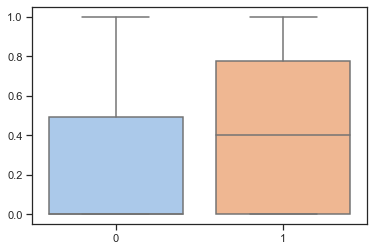

In [384]:
minmax=MinMaxScaler()
pgc1=pgc[pgc.index.str.contains('pre')]
pgc2=pgc[pgc.index.str.contains('post')]

pgc1=minmax.fit_transform(pgc1)
pgc2=minmax.fit_transform(pgc2)

sns.boxplot(data=[pgc1, pgc2])

In [385]:
pgc2

array([[1.00000000e+00, 0.00000000e+00, 6.33133905e-01],
       [9.44474085e-01, 3.72390719e-09, 8.33045559e-01],
       [7.81982337e-01, 1.80265454e-08, 6.48844187e-01],
       [1.37154811e-01, 1.00000000e+00, 3.70966277e-01],
       [4.29240039e-01, 8.89767219e-09, 6.91059661e-01],
       [3.30253189e-01, 2.04499636e-08, 1.00000000e+00],
       [7.73876839e-01, 1.60936108e-08, 0.00000000e+00],
       [0.00000000e+00, 1.95023819e-08, 7.15471092e-01]])

<AxesSubplot:>

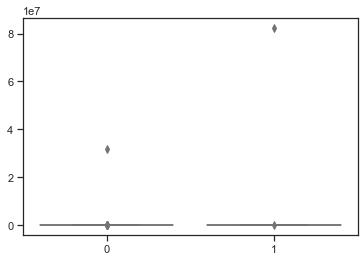

In [378]:
robust=RobustScaler()
pgc1=pgc[pgc.index.str.contains('pre')]
pgc2=pgc[pgc.index.str.contains('post')]

pgc1=robust.fit_transform(pgc1)
pgc2=robust.fit_transform(pgc2)

sns.boxplot(data=[pgc1, pgc2])

<AxesSubplot:>

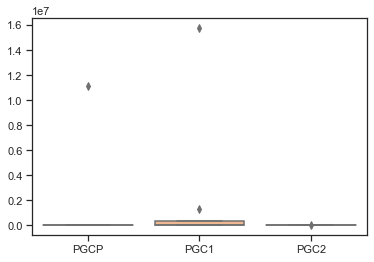

In [389]:
pgc1=pgc[pgc.index.str.contains('pre')]
pgc2=pgc[pgc.index.str.contains('post')]
sns.boxplot(data=pgc1)

#### I will switch the column from id to gene names 

In [4]:
dt2 = dt.copy()
dt2.head()

NameError: name 'dt' is not defined

In [68]:
dt2 = dt2.drop(['treatment', 'time'], axis=1)

In [69]:
#ID_list
Gene_list=name['Gene'].to_list()
dt2.columns=Gene_list
dt2.head()

FAM174B    AP3S2     SV2B         RBPMS2     AVEN  \
t0_basal_rep1           0.33523 -0.19854  0.07879 15318921.00000 -0.02302   
t0_insulin-rep1        -0.48098 -0.12711 -0.65170        0.03275  0.00034   
t10_basal_rep1         -0.04545 -0.45082  0.16114       -0.01024 -0.00018   
t10_insulin_rep1        0.01745  0.15125 -0.03935       -0.27739  0.12169   
t40_basal_rep1   18848577.00000  0.49808  0.33418       -0.04015  0.96691   

                  ZSCAN29    VPS39      CHP          CASC5          ATMIN  \
t0_basal_rep1    -0.09325 -0.22695 -0.45390        0.51991       -0.41978   
t0_insulin-rep1   0.14424 -0.04819 -0.44599       -0.15223       -0.06266   
t10_basal_rep1    0.09616 -0.30299 -0.79792        0.16217       -0.29546   
t10_insulin_rep1  0.10905  0.26553 -0.65067        0.07026       -0.06663   
t40_basal_rep1   -0.06747 -0.08630  0.33626 13043389.00000 21866333.00000   

                  ...      NaN      NaN  C3orf25            NaN  \
t0_basal_rep1     ... -0.04850  0.34021 -0.30109       -0.66593   
t0_insulin-rep1   ... -0.01229 -0.22177 -0.17528        0.33445   
t10_basal_rep1    ...  0.10673  0.10971 -0.26835       -0.29607   
t10_insulin_rep1  ...  0.01229 -0.03113  0.01219        0.53426   
t40_basal_rep1    ...  0.10846  0.81651 -0.61433 10604041.00000   

                            NaN   LOC100129522            NaN C15orf40  \
t0_basal_rep1           0.48552        0.46750       -0.25926  0.26760   
t0_insulin-rep1        -0.09512       -0.10172 30632954.00000 -0.28557   
t10_basal_rep1          0.15706        0.14694       -0.38621  0.09514   
t10_insulin_rep1        0.08022        0.05513       -0.70357 -0.24833   
t40_basal_rep1   10715466.00000 10333004.00000        0.35103  0.05696   

                            NaN      NaN  
t0_basal_rep1           0.48900  0.41020  
t0_insulin-rep1        -0.11146 -0.15867  
t10_basal_rep1          0.19438  0.10074  
t10_insulin_rep1        0.08041  0.02580  
t40_basal_rep1   36773758.00000  0.99396  

[5 rows x 41000 columns]

In [622]:
dt2.dropna(axis=1)

FAM174B    AP3S2           SV2B          RBPMS2  \
t0_basal_rep1           0.33523 -0.19854        0.07879  15318921.00000   
t0_insulin-rep1        -0.48098 -0.12711       -0.65170         0.03275   
t10_basal_rep1         -0.04545 -0.45082        0.16114        -0.01024   
t10_insulin_rep1        0.01745  0.15125       -0.03935        -0.27739   
t40_basal_rep1   18848577.00000  0.49808        0.33418        -0.04015   
t0_basal_rep2           0.21253  0.33977        0.90747         0.05736   
t0_insulin-rep2         0.38706 -0.03379        0.67631        -0.06186   
t10_basal_rep2          0.60447  0.06100        0.93765        -0.36718   
t10_insulin_rep2        0.27306  0.49002 12964287.00000        -0.10590   
t40_basal_rep2         -0.06033 -0.25175 15490398.00000         0.98961   
t0_basal_rep3           0.03558  0.17150       -0.61643        -0.18525   
t0_insulin-rep3        -0.15783  0.17710       -0.40427        -0.40615   
t10_basal_rep3          0.31880 -0.08805       -0.33789        -0.58450   
t10_insulin_rep3        0.17689  0.15548       -0.49853        -0.49747   
t40_basal_rep3         -0.26256 -0.03936       -0.53476         0.62938   
t0_basal_rep4           0.13179 -0.02676        0.34408         0.51944   
t0_insulin-rep4        -0.19342  0.46144        0.11594         0.16046   
t10_basal_rep4          0.86478  0.53102        0.25314         0.24994   
t10_insulin_rep4        0.24400  0.21670        0.23623         0.00880   
t40_basal_rep4         -0.49133  0.08427 10044565.00000  14449432.00000   
t0_basal_rep5          -0.22504 -0.01987       -0.14324        -0.08869   
t0_insulin-rep5        -0.12752  0.07283       -0.36854         0.10080   
t10_basal_rep5   10080457.00000  0.05399        0.10631         0.08785   
t10_insulin_rep5 12818179.00000  0.14801       -0.17836        -0.63135   
t40_basal_rep5   18071952.00000  0.16299       -0.24285         0.23714   
t0_basal_rep6          -0.02092 -0.54993       -0.18244  11299198.00000   
t0_insulin-rep6        -0.18908 -0.24943       -0.16475         0.29812   
t10_basal_rep6          0.23426  0.31063       -0.30074         0.49034   
t10_insulin_rep6        0.01516 -0.05945       -0.55596        -0.51374   
t40_basal_rep6         -0.01308 -0.05262        0.27062         0.56595   
t0_basal_rep7          -0.08301 -0.06834        0.31289         0.44348   
t0_insulin-rep7        -0.04963 -0.12370        0.25458 -10554473.00000   
t10_basal_rep7          0.18049  0.75670 10021057.00000  18671052.00000   
t10_insulin_rep7        0.15647  0.32935        0.28732        -0.05121   
t40_basal_rep7         -0.05853 -0.00591        0.56047         0.25044   
t0_basal_rep8           0.03897  0.12104       -0.04363        -0.12849   
t0_insulin-rep8        -0.17257  0.07094       -0.33586        -0.84185   
t10_basal_rep8          0.09269 -0.15607        0.13258        -0.24930   
t10_insulin_rep8        0.01308 -0.14693        0.17208         0.10685   
t40_basal_rep8         -0.36808 -0.02873       -0.34658        -0.04299   

                     AVEN  ZSCAN29    VPS39      CHP          CASC5  \
t0_basal_rep1    -0.02302 -0.09325 -0.22695 -0.45390        0.51991   
t0_insulin-rep1   0.00034  0.14424 -0.04819 -0.44599       -0.15223   
t10_basal_rep1   -0.00018  0.09616 -0.30299 -0.79792        0.16217   
t10_insulin_rep1  0.12169  0.10905  0.26553 -0.65067        0.07026   
t40_basal_rep1    0.96691 -0.06747 -0.08630  0.33626 13043389.00000   
t0_basal_rep2     0.56446 -0.20350  0.37693  0.56796        0.43828   
t0_insulin-rep2   0.89046  0.18486  0.19000  0.14597        0.02268   
t10_basal_rep2    0.40621  0.04051  0.19343  0.29426       -0.38908   
t10_insulin_rep2 -0.07630 -0.39092  0.16531  0.11761        0.31733   
t40_basal_rep2   -0.07498 -0.21991 -0.35877 -0.11355       -0.04346   
t0_basal_rep3    -0.12021 -0.12954  0.12604 -0.04496       -0.50727   
t0_insulin-rep3  -0.38007  0.06853  0.03760 -0.07627       -0.44792   
t10_basal_rep3   -0.25175

In [196]:
dt2.dropna(axis=1, how='any', inplace=True)

In [197]:
dt2.columns.str.contains('PGC')

Index([False, False, False, False, False, False, False, False, False, False,
       ...
         nan,   nan, False,   nan,   nan, False,   nan, False,   nan,   nan],
      dtype='object', length=41000)

Doesn't seem to work. I could create a dictionnary with key(ID) : values(gene name), removing the keys for values = NaN
Then i could save both keys and values in lists
Then i could loc the columns containing the ID of the remaining keys and finally change it for the list of gene name

In [515]:
Gene_list

['FAM174B',
 'AP3S2',
 'SV2B',
 'RBPMS2',
 'AVEN',
 'ZSCAN29',
 'VPS39',
 'CHP',
 'CASC5',
 'ATMIN',
 'UNKL',
 'TMEM127',
 'MMP15',
 'PRM1',
 'USP10',
 'HSBP1',
 'RBM35B',
 'CDH16',
 'NELL2',
 'CMIP',
 'GRIN2A',
 'ZNF598',
 'DECR2',
 'C16orf35',
 'ORC6L',
 'ORC6L',
 'PPP4C',
 'IL34',
 'TCEB2',
 'NTN3',
 'EXOSC6',
 'ZCCHC14',
 'NIP30',
 'MTHFSD',
 'TXNL4B',
 'MYST1',
 'VKORC1',
 'ROGDI',
 'HMOX2',
 'TMEM170A',
 nan,
 'ABCC6',
 'EXOC7',
 'PSMB3',
 'LPO',
 nan,
 nan,
 'TBCD',
 'MGAT4C',
 'HN1',
 'PNMT',
 'ZBTB4',
 'SERPINF1',
 'SMG6',
 'HELZ',
 'MAPK7',
 'PMP22',
 'SKAP1',
 'SMURF2',
 'SLC25A39',
 'PNPLA2',
 'UBTF',
 'STAT5B',
 'STAT3',
 'CCDC56',
 'ARL13B',
 'MYO19',
 'HOXB3',
 'SUZ12',
 nan,
 'GIT1',
 'AIPL1',
 'AIPL1',
 'ZFP3',
 'SPNS3',
 'KRT38',
 'KRT38',
 'NOTUM',
 'TMC6',
 'LGALS9C',
 'KRTAP9-3',
 'KRTAP3-2',
 'KRT34',
 'OR1E1',
 'SPATA22',
 'COPZ2',
 'CTDP1',
 nan,
 'GRP',
 'RNF125',
 'NARS',
 'MYO5B',
 'CYB5A',
 'SFRP1',
 'C18orf21',
 'LOC147645',
 'LOC147645',
 'ZNF614',
 'ZNF61

In [516]:
ID_list

['A_23_P100001',
 'A_23_P100011',
 'A_23_P100022',
 'A_23_P100056',
 'A_23_P100074',
 'A_23_P100092',
 'A_23_P100103',
 'A_23_P100111',
 'A_23_P100127',
 'A_23_P100133',
 'A_23_P100141',
 'A_23_P100156',
 'A_23_P100177',
 'A_23_P100189',
 'A_23_P100196',
 'A_23_P100203',
 'A_23_P100220',
 'A_23_P100240',
 'A_23_P10025',
 'A_23_P100263',
 'A_23_P100278',
 'A_23_P100292',
 'A_23_P100315',
 'A_23_P100326',
 'A_23_P100341',
 'A_23_P100344',
 'A_23_P100355',
 'A_23_P100386',
 'A_23_P100392',
 'A_23_P100408',
 'A_23_P100413',
 'A_23_P100420',
 'A_23_P100441',
 'A_23_P100455',
 'A_23_P100469',
 'A_23_P100478',
 'A_23_P100486',
 'A_23_P100499',
 'A_23_P100501',
 'A_23_P100517',
 'A_23_P100522',
 'A_23_P100539',
 'A_23_P100556',
 'A_23_P100576',
 'A_23_P100583',
 'A_23_P100595',
 'A_23_P10060',
 'A_23_P100602',
 'A_23_P10062',
 'A_23_P100632',
 'A_23_P100642',
 'A_23_P100654',
 'A_23_P100660',
 'A_23_P100676',
 'A_23_P100693',
 'A_23_P100704',
 'A_23_P100711',
 'A_23_P100730',
 'A_23_P100754',


In [70]:
column_dict = {k:v for k, v in zip(ID_list, Gene_list)}

In [71]:
column_dict

{'A_23_P100001': 'FAM174B',
 'A_23_P100011': 'AP3S2',
 'A_23_P100022': 'SV2B',
 'A_23_P100056': 'RBPMS2',
 'A_23_P100074': 'AVEN',
 'A_23_P100092': 'ZSCAN29',
 'A_23_P100103': 'VPS39',
 'A_23_P100111': 'CHP',
 'A_23_P100127': 'CASC5',
 'A_23_P100133': 'ATMIN',
 'A_23_P100141': 'UNKL',
 'A_23_P100156': 'TMEM127',
 'A_23_P100177': 'MMP15',
 'A_23_P100189': 'PRM1',
 'A_23_P100196': 'USP10',
 'A_23_P100203': 'HSBP1',
 'A_23_P100220': 'RBM35B',
 'A_23_P100240': 'CDH16',
 'A_23_P10025': 'NELL2',
 'A_23_P100263': 'CMIP',
 'A_23_P100278': 'GRIN2A',
 'A_23_P100292': 'ZNF598',
 'A_23_P100315': 'DECR2',
 'A_23_P100326': 'C16orf35',
 'A_23_P100341': 'ORC6L',
 'A_23_P100344': 'ORC6L',
 'A_23_P100355': 'PPP4C',
 'A_23_P100386': 'IL34',
 'A_23_P100392': 'TCEB2',
 'A_23_P100408': 'NTN3',
 'A_23_P100413': 'EXOSC6',
 'A_23_P100420': 'ZCCHC14',
 'A_23_P100441': 'NIP30',
 'A_23_P100455': 'MTHFSD',
 'A_23_P100469': 'TXNL4B',
 'A_23_P100478': 'MYST1',
 'A_23_P100486': 'VKORC1',
 'A_23_P100499': 'ROGDI',
 'A

In [72]:
# Assuming your dictionary is named 'my_dict'
nonan_col_dict = {key: value for key, value in column_dict.items() if str(value).lower() != 'nan'}

# In this example, str(value).lower() is used to convert the value to lowercase string representation 
# and then compared with 'nan'. If the lowercase string representation of the value is not 'nan', 
# the key-value pair is kept in the dictionary.

In [73]:
import datetime
undesired_values = [value for value in nonan_col_dict.values() if isinstance(value, datetime.datetime)]
nonan_col_dict = {key:value for key, value in nonan_col_dict.items() if value not in undesired_values}

In [241]:
nonan_col_dict.values()

dict_values(['FAM174B', 'AP3S2', 'SV2B', 'RBPMS2', 'AVEN', 'ZSCAN29', 'VPS39', 'CHP', 'CASC5', 'ATMIN', 'UNKL', 'TMEM127', 'MMP15', 'PRM1', 'USP10', 'HSBP1', 'RBM35B', 'CDH16', 'NELL2', 'CMIP', 'GRIN2A', 'ZNF598', 'DECR2', 'C16orf35', 'ORC6L', 'ORC6L', 'PPP4C', 'IL34', 'TCEB2', 'NTN3', 'EXOSC6', 'ZCCHC14', 'NIP30', 'MTHFSD', 'TXNL4B', 'MYST1', 'VKORC1', 'ROGDI', 'HMOX2', 'TMEM170A', 'ABCC6', 'EXOC7', 'PSMB3', 'LPO', 'TBCD', 'MGAT4C', 'HN1', 'PNMT', 'ZBTB4', 'SERPINF1', 'SMG6', 'HELZ', 'MAPK7', 'PMP22', 'SKAP1', 'SMURF2', 'SLC25A39', 'PNPLA2', 'UBTF', 'STAT5B', 'STAT3', 'CCDC56', 'ARL13B', 'MYO19', 'HOXB3', 'SUZ12', 'GIT1', 'AIPL1', 'AIPL1', 'ZFP3', 'SPNS3', 'KRT38', 'KRT38', 'NOTUM', 'TMC6', 'LGALS9C', 'KRTAP9-3', 'KRTAP3-2', 'KRT34', 'OR1E1', 'SPATA22', 'COPZ2', 'CTDP1', 'GRP', 'RNF125', 'NARS', 'MYO5B', 'CYB5A', 'SFRP1', 'C18orf21', 'LOC147645', 'LOC147645', 'ZNF614', 'ZNF614', 'SFRP1', 'ZNF446', 'ZNF587', 'EML2', 'LRRC68', 'LRRC68', 'ZNF285A', 'ARHGEF1', 'KRI1', 'ATG4D', 'NKIRAS2', 

In [74]:
dt2.columns = Gene_list

In [75]:
dt2

FAM174B    AP3S2           SV2B          RBPMS2  \
t0_basal_rep1           0.33523 -0.19854        0.07879  15318921.00000   
t0_insulin-rep1        -0.48098 -0.12711       -0.65170         0.03275   
t10_basal_rep1         -0.04545 -0.45082        0.16114        -0.01024   
t10_insulin_rep1        0.01745  0.15125       -0.03935        -0.27739   
t40_basal_rep1   18848577.00000  0.49808        0.33418        -0.04015   
t0_basal_rep2           0.21253  0.33977        0.90747         0.05736   
t0_insulin-rep2         0.38706 -0.03379        0.67631        -0.06186   
t10_basal_rep2          0.60447  0.06100        0.93765        -0.36718   
t10_insulin_rep2        0.27306  0.49002 12964287.00000        -0.10590   
t40_basal_rep2         -0.06033 -0.25175 15490398.00000         0.98961   
t0_basal_rep3           0.03558  0.17150       -0.61643        -0.18525   
t0_insulin-rep3        -0.15783  0.17710       -0.40427        -0.40615   
t10_basal_rep3          0.31880 -0.08805       -0.33789        -0.58450   
t10_insulin_rep3        0.17689  0.15548       -0.49853        -0.49747   
t40_basal_rep3         -0.26256 -0.03936       -0.53476         0.62938   
t0_basal_rep4           0.13179 -0.02676        0.34408         0.51944   
t0_insulin-rep4        -0.19342  0.46144        0.11594         0.16046   
t10_basal_rep4          0.86478  0.53102        0.25314         0.24994   
t10_insulin_rep4        0.24400  0.21670        0.23623         0.00880   
t40_basal_rep4         -0.49133  0.08427 10044565.00000  14449432.00000   
t0_basal_rep5          -0.22504 -0.01987       -0.14324        -0.08869   
t0_insulin-rep5        -0.12752  0.07283       -0.36854         0.10080   
t10_basal_rep5   10080457.00000  0.05399        0.10631         0.08785   
t10_insulin_rep5 12818179.00000  0.14801       -0.17836        -0.63135   
t40_basal_rep5   18071952.00000  0.16299       -0.24285         0.23714   
t0_basal_rep6          -0.02092 -0.54993       -0.18244  11299198.00000   
t0_insulin-rep6        -0.18908 -0.24943       -0.16475         0.29812   
t10_basal_rep6          0.23426  0.31063       -0.30074         0.49034   
t10_insulin_rep6        0.01516 -0.05945       -0.55596        -0.51374   
t40_basal_rep6         -0.01308 -0.05262        0.27062         0.56595   
t0_basal_rep7          -0.08301 -0.06834        0.31289         0.44348   
t0_insulin-rep7        -0.04963 -0.12370        0.25458 -10554473.00000   
t10_basal_rep7          0.18049  0.75670 10021057.00000  18671052.00000   
t10_insulin_rep7        0.15647  0.32935        0.28732        -0.05121   
t40_basal_rep7         -0.05853 -0.00591        0.56047         0.25044   
t0_basal_rep8           0.03897  0.12104       -0.04363        -0.12849   
t0_insulin-rep8        -0.17257  0.07094       -0.33586        -0.84185   
t10_basal_rep8          0.09269 -0.15607        0.13258        -0.24930   
t10_insulin_rep8        0.01308 -0.14693        0.17208         0.10685   
t40_basal_rep8         -0.36808 -0.02873       -0.34658        -0.04299   

                     AVEN  ZSCAN29    VPS39      CHP          CASC5  \
t0_basal_rep1    -0.02302 -0.09325 -0.22695 -0.45390        0.51991   
t0_insulin-rep1   0.00034  0.14424 -0.04819 -0.44599       -0.15223   
t10_basal_rep1   -0.00018  0.09616 -0.30299 -0.79792        0.16217   
t10_insulin_rep1  0.12169  0.10905  0.26553 -0.65067        0.07026   
t40_basal_rep1    0.96691 -0.06747 -0.08630  0.33626 13043389.00000   
t0_basal_rep2     0.56446 -0.20350  0.37693  0.56796        0.43828   
t0_insulin-rep2   0.89046  0.18486  0.19000  0.14597        0.02268   
t10_basal_rep2    0.40621  0.04051  0.19343  0.29426       -0.38908   
t10_insulin_rep2 -0.07630 -0.39092  0.16531  0.11761        0.31733   
t40_basal_rep2   -0.07498 -0.21991 -0.35877 -0.11355       -0.04346   
t0_basal_rep3    -0.12021 -0.12954  0.12604 -0.04496       -0.50727   
t0_insulin-rep3  -0.38007  0.06853  0.03760 -0.07627       -0.44792   
t10_basal_rep3   -0.25175

In [83]:
selected_columns=dt2.loc[:, nonan_col_dict.values()]

In [84]:
selected_columns

FAM174B    AP3S2           AP3S2    AP3S2    AP3S2  \
t0_basal_rep1           0.33523 -0.19854         0.02168 -0.01741 -0.12046   
t0_insulin-rep1        -0.48098 -0.12711        -0.06434  0.01006 -0.22330   
t10_basal_rep1         -0.04545 -0.45082         0.00507 -0.08497 -0.28194   
t10_insulin_rep1        0.01745  0.15125         0.31594  0.35905  0.01630   
t40_basal_rep1   18848577.00000  0.49808         0.78977  0.93119  0.39301   
t0_basal_rep2           0.21253  0.33977         0.21979  0.38205  0.55195   
t0_insulin-rep2         0.38706 -0.03379         0.07294  0.14856  0.18763   
t10_basal_rep2          0.60447  0.06100         0.09251  0.21564  0.37742   
t10_insulin_rep2        0.27306  0.49002         0.01737 -0.08671  0.90294   
t40_basal_rep2         -0.06033 -0.25175        -0.23113 -0.21030  0.31885   
t0_basal_rep3           0.03558  0.17150        -0.02273  0.00122  0.49053   
t0_insulin-rep3        -0.15783  0.17710         0.05300 -0.00312  0.48339   
t10_basal_rep3          0.31880 -0.08805        -0.20657 -0.25402  0.58210   
t10_insulin_rep3        0.17689  0.15548        -0.04579  0.02929  0.68259   
t40_basal_rep3         -0.26256 -0.03936        -0.22626 -0.36587  0.04582   
t0_basal_rep4           0.13179 -0.02676         0.17039 -0.06055  0.36952   
t0_insulin-rep4        -0.19342  0.46144         0.01702  0.15417  0.31950   
t10_basal_rep4          0.86478  0.53102         0.50665  0.51055  0.95488   
t10_insulin_rep4        0.24400  0.21670        -0.08543 -0.01395  0.38572   
t40_basal_rep4         -0.49133  0.08427        -0.10579 -0.17717  0.12819   
t0_basal_rep5          -0.22504 -0.01987         0.05524 -0.19299  0.20845   
t0_insulin-rep5        -0.12752  0.07283        -0.01215  0.06712  0.36673   
t10_basal_rep5   10080457.00000  0.05399         0.13929  0.09813  0.53346   
t10_insulin_rep5 12818179.00000  0.14801         0.30355  0.19488  0.39894   
t40_basal_rep5   18071952.00000  0.16299         0.19512  0.09022  0.65689   
t0_basal_rep6          -0.02092 -0.54993        -0.49576 -0.67497 -0.30240   
t0_insulin-rep6        -0.18908 -0.24943        -0.27182 -0.26117 -0.01630   
t10_basal_rep6          0.23426  0.31063         0.10442  0.11719  0.97040   
t10_insulin_rep6        0.01516 -0.05945        -0.02580 -0.17210 -0.47257   
t40_basal_rep6         -0.01308 -0.05262         0.02781  0.05761 -0.33256   
t0_basal_rep7          -0.08301 -0.06834         0.08317 -0.07596 -0.17160   
t0_insulin-rep7        -0.04963 -0.12370         0.12811  0.10212 -0.21218   
t10_basal_rep7          0.18049  0.75670        -0.19875 -0.21024 -0.16871   
t10_insulin_rep7        0.15647  0.32935         0.05322  0.37135 -0.03731   
t40_basal_rep7         -0.05853 -0.00591         0.08232  0.18196 -0.44853   
t0_basal_rep8           0.03897  0.12104        -0.18559 -0.01228 -0.23492   
t0_insulin-rep8        -0.17257  0.07094 -10869598.00000 -0.00527 -0.30326   
t10_basal_rep8          0.09269 -0.15607        -0.20360 -0.08380 -0.22104   
t10_insulin_rep8        0.01308 -0.14693        -0.14258 -0.06981  0.14311   
t40_basal_rep8         -0.36808 -0.02873        -0.06177  0.13150 -0.76817   

                           SV2B          RBPMS2     AVEN  ZSCAN29  ZSCAN29  \
t0_basal_rep1           0.07879  15318921.00000 -0.02302 -0.09325 -0.07552   
t0_insulin-rep1        -0.65170         0.03275  0.00034  0.14424 -0.21060   
t10_basal_rep1          0.16114        -0.01024 -0.00018  0.09616  0.00025   
t10_insulin_rep1       -0.03935        -0.27739  0.12169  0.10905 -0.15315   
t40_basal_rep1          0.33418        -0.04015  0.96691 -0.06747  0.19604   
t0_basal_rep2           0.90747         0.05736  0.56446 -0.20350 -0.44846   
t0_insulin-rep2         0.67631        -0.06186  0.89046  0.18486  0.03965   
t10_basal_rep2          0.93765        -0.36718  0.40621  0.04051 -0.30253   
t10_insulin_rep2 12964287.00000        -0.10590 -0.07630 -0.39092 -0.12895   
t40_basal_rep2   15490398.00000         0.989

In [81]:
len(nonan_col_dict.values())

30326

In [93]:
len(dt2.columns)

41000

In [96]:
#columns_to_drop = set(dt2.columns) - set(nonan_col_dict.values())
#dt4=dt2.drop(columns=columns_to_drop)
dt4 = dt2.copy()

In [97]:
dt4

FAM174B    AP3S2           SV2B          RBPMS2  \
t0_basal_rep1           0.33523 -0.19854        0.07879  15318921.00000   
t0_insulin-rep1        -0.48098 -0.12711       -0.65170         0.03275   
t10_basal_rep1         -0.04545 -0.45082        0.16114        -0.01024   
t10_insulin_rep1        0.01745  0.15125       -0.03935        -0.27739   
t40_basal_rep1   18848577.00000  0.49808        0.33418        -0.04015   
t0_basal_rep2           0.21253  0.33977        0.90747         0.05736   
t0_insulin-rep2         0.38706 -0.03379        0.67631        -0.06186   
t10_basal_rep2          0.60447  0.06100        0.93765        -0.36718   
t10_insulin_rep2        0.27306  0.49002 12964287.00000        -0.10590   
t40_basal_rep2         -0.06033 -0.25175 15490398.00000         0.98961   
t0_basal_rep3           0.03558  0.17150       -0.61643        -0.18525   
t0_insulin-rep3        -0.15783  0.17710       -0.40427        -0.40615   
t10_basal_rep3          0.31880 -0.08805       -0.33789        -0.58450   
t10_insulin_rep3        0.17689  0.15548       -0.49853        -0.49747   
t40_basal_rep3         -0.26256 -0.03936       -0.53476         0.62938   
t0_basal_rep4           0.13179 -0.02676        0.34408         0.51944   
t0_insulin-rep4        -0.19342  0.46144        0.11594         0.16046   
t10_basal_rep4          0.86478  0.53102        0.25314         0.24994   
t10_insulin_rep4        0.24400  0.21670        0.23623         0.00880   
t40_basal_rep4         -0.49133  0.08427 10044565.00000  14449432.00000   
t0_basal_rep5          -0.22504 -0.01987       -0.14324        -0.08869   
t0_insulin-rep5        -0.12752  0.07283       -0.36854         0.10080   
t10_basal_rep5   10080457.00000  0.05399        0.10631         0.08785   
t10_insulin_rep5 12818179.00000  0.14801       -0.17836        -0.63135   
t40_basal_rep5   18071952.00000  0.16299       -0.24285         0.23714   
t0_basal_rep6          -0.02092 -0.54993       -0.18244  11299198.00000   
t0_insulin-rep6        -0.18908 -0.24943       -0.16475         0.29812   
t10_basal_rep6          0.23426  0.31063       -0.30074         0.49034   
t10_insulin_rep6        0.01516 -0.05945       -0.55596        -0.51374   
t40_basal_rep6         -0.01308 -0.05262        0.27062         0.56595   
t0_basal_rep7          -0.08301 -0.06834        0.31289         0.44348   
t0_insulin-rep7        -0.04963 -0.12370        0.25458 -10554473.00000   
t10_basal_rep7          0.18049  0.75670 10021057.00000  18671052.00000   
t10_insulin_rep7        0.15647  0.32935        0.28732        -0.05121   
t40_basal_rep7         -0.05853 -0.00591        0.56047         0.25044   
t0_basal_rep8           0.03897  0.12104       -0.04363        -0.12849   
t0_insulin-rep8        -0.17257  0.07094       -0.33586        -0.84185   
t10_basal_rep8          0.09269 -0.15607        0.13258        -0.24930   
t10_insulin_rep8        0.01308 -0.14693        0.17208         0.10685   
t40_basal_rep8         -0.36808 -0.02873       -0.34658        -0.04299   

                     AVEN  ZSCAN29    VPS39      CHP          CASC5  \
t0_basal_rep1    -0.02302 -0.09325 -0.22695 -0.45390        0.51991   
t0_insulin-rep1   0.00034  0.14424 -0.04819 -0.44599       -0.15223   
t10_basal_rep1   -0.00018  0.09616 -0.30299 -0.79792        0.16217   
t10_insulin_rep1  0.12169  0.10905  0.26553 -0.65067        0.07026   
t40_basal_rep1    0.96691 -0.06747 -0.08630  0.33626 13043389.00000   
t0_basal_rep2     0.56446 -0.20350  0.37693  0.56796        0.43828   
t0_insulin-rep2   0.89046  0.18486  0.19000  0.14597        0.02268   
t10_basal_rep2    0.40621  0.04051  0.19343  0.29426       -0.38908   
t10_insulin_rep2 -0.07630 -0.39092  0.16531  0.11761        0.31733   
t40_basal_rep2   -0.07498 -0.21991 -0.35877 -0.11355       -0.04346   
t0_basal_rep3    -0.12021 -0.12954  0.12604 -0.04496       -0.50727   
t0_insulin-rep3  -0.38007  0.06853  0.03760 -0.07627       -0.44792   
t10_basal_rep3   -0.25175

Note for myself : my method to get rid of the NaN worked, on the contrary of ChatGPT's method

#### Determining the list of genes to keep

In [236]:
genes_pgc = ['PPARGC1A', 'NRF1', 'HEBP1', 'TFAM', 'CREB1', 'PPARA', 'PPARD', 'PPARGC1B', 'MED1', 'ESRRA', 'ESRRB', 'ESRRG', 'FOXO1', 'SIRT1', 'SIRT3', 'SIRT4', 'SIRT5', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'HDAC10', 'HDAC11', 'PRDM16', 'CITED2']
genes_mtor = ['FRAP1', 'RHEB', 'SEC13', 'AKT1', 'AKT2', 'AKT3', 'TSC1', 'TSC2', 'KIAA1303', 'RICTOR', 'C11orf59', 'ROBLD3', 'MAPKSP1', 'HBXIP', 'MAPK1', 'MAPK3', 'MAPK14', 'MAPK8', 'MAPK9', 'MAPK10', 'EIF4EBP1', 'EIF4EBP2', 'ANKHD1-EIF4EBP3', 'RPS6KB1', 'RPS6KB2', 'RRAGA', 'RRAGB', 'RRAGC', 'RRAGD', 'DEPDC5', 'NPR2', 'NPR3', 'CUL3', 'GABARAP', 'GABARAPL1', 'GABARAPL2', 'ULK1', 'ULK2', 'KIAA0652', 'C12orf44', 'WIPI1', 'WIPI2', 'PIK3C3', 'PIK3R4', 'BECN1', 'AMBRA1', 'PIK3C3', 'PIK3R4', 'KIAA0831', 'ATG2A', 'ATG2B', 'ATG9A', 'ATG9B', 'WIPI1', 'ATG12', 'ATG7', 'ATG10', 'ATG5', 'ATG16L1', 'ATG16L2', 'ULK3', 'PRKAA1', 'PRKAA2', 'EIF4E', 'FOXO1', 'FOXO3', 'FOXO4', 'GSK3B', 'RPS6', 'RPS6KB1', 'RPS6KB2']
genes_vegf = ['VEGFA', 'FLT1', 'FLT4', 'KDR', 'NRP1', 'ANGPT1', 'ANGPT2', 'PIK3CA', 'AKT1', 'MAPK1', 'PTEN', 'HIF1A', 'PLCG1', 'FIGF', 'ERBB2', 'MYC', 'STAT3', 'SRC', 'JAK2', 'PTPN11']
genes_yap_taz = ['YAP1', 'WWTR1', 'TEAD1', 'TEAD2', 'TEAD3', 'TEAD4', 'TAZ', 'LATS1', 'LATS2', 'MST1', 'STK3', 'SAV1', 'AMOT', 'AMOTL1', 'AMOTL2', 'ANGPTL2', 'CTGF', 'CYR61', 'SMAD7', 'TAZ', 'DLG4', 'FAT4', 'NF2', 'TP53', 'CTNNB1', 'TGFBR1', 'TGFBR2']
genes_glycolysis = ['HK1', 'HK2', 'HK3', 'GCK', 'PFKFB1', 'PFKFB2', 'PFKFB3', 'PFKFB4', 'PFKL', 'PGM1', 'PGM2', 'ALDOA', 'ALDOB', 'ALDOC', 'TPI1', 'GAPDH', 'PGK1', 'PGK2', 'PGAM1', 'PGAM2', 'ENO1', 'ENO2', 'ENO3', 'PKM2', 'PKLR', 'LDHA', 'LDHB', 'LDHC', 'LDHD', 'PDK1', 'PDK2', 'PDK3', 'PDK4']
genes_mitochondrial_respiration = ['NDUFA9', 'NDUFS1', 'SDHA', 'SDHB', 'UQCRC1', 'COX4I1', 'COX5A', 'COX6A2', 'ATP5A1', 'ATP5B']


In [105]:
selected_columns = genes_glycolysis + genes_mitochondrial_respiration + genes_mtor + genes_pgc + genes_vegf + genes_yap_taz
dt5 = dt4.loc[:, selected_columns]
dt5

HK1            HK1             HK2             HK2  \
t0_basal_rep1    -0.36962        0.45913 -22036471.00000 -10252719.00000   
t0_insulin-rep1   0.11694       -0.12873        -0.27432        -0.33008   
t10_basal_rep1   -0.23362        0.11982 -17358704.00000 -29958844.00000   
t10_insulin_rep1  0.36244        0.03546        -0.87723 -19842458.00000   
t40_basal_rep1   -0.76009 10282655.00000 -19491973.00000  -2611165.00000   
t0_basal_rep2     0.38762        0.48282  11932716.00000         0.59291   
t0_insulin-rep2   0.27338        0.02340  12135296.00000  16641984.00000   
t10_basal_rep2   -0.13840       -0.33075 -10125628.00000        -0.88156   
t10_insulin_rep2 -0.05911        0.38768        -0.62541  -1318748.00000   
t40_basal_rep2   -0.49228       -0.31480        -0.74513        -0.17335   
t0_basal_rep3    -0.40169       -0.46744         0.72659         0.89287   
t0_insulin-rep3  -0.25257       -0.39176         0.89067  10783744.00000   
t10_basal_rep3   -0.10795       -0.08324 -15386662.00000 -12256923.00000   
t10_insulin_rep3  0.03565       -0.38795 -20249472.00000 -10980926.00000   
t40_basal_rep3   -0.22014       -0.58724         0.63165         0.79842   
t0_basal_rep4    -0.12447       -0.20469         0.41678         0.87380   
t0_insulin-rep4  -0.21450        0.00966  16436572.00000  12214007.00000   
t10_basal_rep4   -0.09128       -0.44832 -14793129.00000 -13192277.00000   
t10_insulin_rep4 -0.06668       -0.33273        -0.23663        -0.49046   
t40_basal_rep4   -0.02864 20259838.00000        -0.19325        -0.07326   
t0_basal_rep5    -0.89974        0.45286         0.67315  10672317.00000   
t0_insulin-rep5  -0.63950        0.00842         0.59422  10619912.00000   
t10_basal_rep5   -0.43304       -0.73281  -1843451.00000 -15122952.00000   
t10_insulin_rep5 -0.44435       -0.11370         0.69259         0.41246   
t40_basal_rep5   -0.41153       -0.09685 -17384791.00000        -0.85146   
t0_basal_rep6    -0.61063       -0.53420        -0.46886         0.01737   
t0_insulin-rep6  -0.13001        0.36943         0.01159        -0.31749   
t10_basal_rep6    0.77312       -0.00108 -16479826.00000    -10762.00000   
t10_insulin_rep6  0.28981 22187371.00000        -0.79162        -0.01737   
t40_basal_rep6    0.34384        0.02967         0.24289         0.65373   
t0_basal_rep7    -0.07869       -0.04005  12116833.00000  13092685.00000   
t0_insulin-rep7   0.00075        0.22291  17206082.00000  18358836.00000   
t10_basal_rep7   -0.54393 36345344.00000 -17057557.00000        -0.84328   
t10_insulin_rep7  0.28042        0.17267         0.58011         0.17038   
t40_basal_rep7    0.15142        0.13986  18581748.00000  16373687.00000   
t0_basal_rep8    -0.00075        0.13811         0.15089        -0.44151   
t0_insulin-rep8   0.10866        0.36939        -0.32643         0.57318   
t10_basal_rep8    0.12269       -0.03354        -0.44788 -10451388.00000   
t10_insulin_rep8  0.22378        0.74588         0.39089         0.07503   
t40_basal_rep8    0.17902        0.74048  19625354.00000  13852277.00000   

                             HK3             HK3             GCK  \
t0_basal_rep1            0.11582         0.46903        -0.50307   
t0_insulin-rep1   21872454.00000  21327734.00000        -0.79143   
t10_basal_rep1    14361091.00000  11175423.00000         0.15371   
t10_insulin_rep1         0.20207         0.79324         0.13480   
t40_basal_rep1           0.02921        -0.87978         0.61494   
t0_basal_rep2           -0.57408 -17359076.00000        -0.55859   
t0_insulin-rep2          0.89637  11511478.00000        -0.98808   
t10_basal_rep2           0.02002        -0.32840        -0.13298   
t10_insulin_rep2        -0.65695        -0.98490        -0.63478   
t40_basal_rep2    13294001.00000   1258923.00000        -0.29700   
t0_basal_rep3            0.21941        -0.19101         0.17830   
t0_insulin-rep3          0.21920        -0.34500        -0.02827   
t10_basal_rep3   -114

#### Dealing with double columns (multiple probes targeting the same genes: 2 methods to deal with it:
    - summarization
    - probe-level analysis approach

I will simply evaluate the mean 

In [106]:
# Aggregate the multiple columns for each probe by taking the mean
df_agg = dt5.groupby(dt5.columns.str.split('_').str[0], axis=1).mean()

# Print the aggregated DataFrame
df_agg


AKT1            AKT2           AKT3          ALDOA  \
t0_basal_rep1    -0.04061   3641216.48531        0.33516       -0.05811   
t0_insulin-rep1   0.02222         0.38001        0.30750        0.38210   
t10_basal_rep1   -0.47683        -0.26313        0.48769        0.11790   
t10_insulin_rep1  0.05838   9323323.31242        0.38341        0.25022   
t40_basal_rep1   -0.36070   4732912.93333 -3550125.41131 -5405097.27210   
t0_basal_rep2     0.43925   3726499.55121       -0.21547        0.20793   
t0_insulin-rep2   0.12845        -0.80172       -0.06787       -0.24581   
t10_basal_rep2   -0.15439         0.19645       -0.24122       -0.56968   
t10_insulin_rep2  0.20734         0.51477        0.00128        0.30944   
t40_basal_rep2    0.22187 -12251875.94699       -0.26945        0.39847   
t0_basal_rep3     0.06286        -0.06330       -0.19733        0.24606   
t0_insulin-rep3   0.07221        -0.07074       -0.08399        0.33748   
t10_basal_rep3   -0.25383 -16512503.00000       -0.13731        0.31264   
t10_insulin_rep3 -0.07081 -10510224.95595        0.06297        0.31907   
t40_basal_rep3    0.05752         0.40884       -0.11760        0.11401   
t0_basal_rep4     0.41547  -5011552.89154       -0.17129        0.21607   
t0_insulin-rep4   0.26471        -0.19434       -0.37049        0.10607   
t10_basal_rep4   -0.38392         0.02030       -0.23712       -0.49485   
t10_insulin_rep4  0.14386         0.33396       -0.33794       -0.01637   
t40_basal_rep4    0.25981        -0.55401  6351016.49131       -0.07018   
t0_basal_rep5     0.18340         0.49854        0.08410        0.43799   
t0_insulin-rep5   0.25537        -0.14018        0.12382        0.12419   
t10_basal_rep5   -0.14559         0.43100        0.26129 -6078491.07095   
t10_insulin_rep5 -0.00702  14950249.33333        0.15486       -0.30022   
t40_basal_rep5    0.00423         0.24470       -0.05752       -0.30531   
t0_basal_rep6    -0.18866        -0.49155        0.14630       -0.04044   
t0_insulin-rep6   0.02290        -0.33723       -0.04671       -0.04593   
t10_basal_rep6    0.69468        -0.40058       -0.07494        0.59638   
t10_insulin_rep6 -0.20103  -4008976.07687  7210853.81443       -0.21767   
t40_basal_rep6    0.04306  -7117313.78236       -0.36204       -0.21789   
t0_basal_rep7     0.42672  16680117.33333        0.01564        0.01573   
t0_insulin-rep7   0.14692 -12409217.00000       -0.12134        0.11590   
t10_basal_rep7   -0.27498        -0.05507  8992022.46512       -0.41153   
t10_insulin_rep7 -0.00423         0.43450  5072147.12661       -0.06129   
t40_basal_rep7    0.12614         0.49893        0.38186       -0.19247   
t0_basal_rep8     0.30432         0.62588        0.00684        0.09702   
t0_insulin-rep8   0.09475  -4534061.65364       -0.11155       -0.19376   
t10_basal_rep8   -0.13436         0.09880       -0.27344       -0.07814   
t10_insulin_rep8 -0.11003        -0.23005        0.15439       -0.06871   
t40_basal_rep8    0.30028   8876146.97545        0.02173       -0.27278   

                          ALDOB          ALDOC   AMBRA1            AMOT  \
t0_basal_rep1           0.30196        0.05173 -0.00928         0.28402   
t0_insulin-rep1  12735166.60681       -0.44267 -0.09157         0.12974   
t10_basal_rep1          0.50686       -0.09463 -0.27998  -7826724.42265   
t10_insulin_rep1        0.17269       -0.26634 -0.10878        -0.30914   
t40_basal_rep1   12753753.94993 -1447933.00000  0.00730  -6506843.77761   
t0_basal_rep2           0.32824        0.51231 -0.23786         0.28866   
t0_insulin-rep2        -0.06966        0.33669 -0.16601         0.40269   
t10_basal_rep2    6866042.50000       -0.16212 -0.45536  -5737893.92256   
t10_insulin_rep2        0.12579        0.58074 -0.35732  -5103891.36543   
t40_basal_rep2          0.14482  3092871.00000 -0.76344         0.19813   
t0_basal_rep3          -0.31702       -0.09951 -0.09627        -0.64461   
t0_insulin-rep3        -0.33301       -0.1246

Here is the preprocessing protocol : 
- Selection of the columns of interest
- Droping insulin condition
- keeping only the t10 and t40 index
- Rename t10 as pre and t40 as post
- MinMaxScaler to normalize the data

In [111]:
def encode_time(index_value): 
    if 't0' in index_value:
        return 0
    elif 't10' in index_value:
        return 1
    elif 't40' in index_value:
        return 2

def encoding_2(data): 
    # 1. Creating a time column
    data['time'] = data.index.map(encode_time)
    
    # 3. keeping the basal condition
    basal_col=data.index.str.contains('basal')
    data=data.loc[basal_col]

    # 4. Calculating the fold change with a special case for double negative with a lower value for post condition
    pre_conditions = data[data['time'] == 1]
    post_conditions = data[data['time'] == 2]

    pre_conditions = pre_conditions.reset_index(drop=True)
    post_conditions = post_conditions.reset_index(drop=True)

    # 7. set a new index
    j = range(1, (len(post_conditions)+1))
    i=pd.Series('post_' + str(j) for j in range(1, (len(post_conditions)+1)))
    post_conditions=post_conditions.set_index(i)

    j = range(1, (len(post_conditions)+1))
    i=pd.Series('pre_' + str(j) for j in range(1, (len(post_conditions)+1)))
    pre_conditions=pre_conditions.set_index(i)

    # 8. Concatenate the 2 df
    data=pd.concat([pre_conditions, post_conditions])
    data=data.drop('time', axis=1)
    return data

In [123]:
df_agg_2=encoding_2(df_agg)

In [124]:
df_agg_2

AKT1            AKT2           AKT3          ALDOA          ALDOB  \
pre_1  -0.47683        -0.26313        0.48769        0.11790        0.50686   
pre_2  -0.15439         0.19645       -0.24122       -0.56968  6866042.50000   
pre_3  -0.25383 -16512503.00000       -0.13731        0.31264   502058.49124   
pre_4  -0.38392         0.02030       -0.23712       -0.49485       -0.55939   
pre_5  -0.14559         0.43100        0.26129 -6078491.07095  -816215.84847   
pre_6   0.69468        -0.40058       -0.07494        0.59638        0.20955   
pre_7  -0.27498        -0.05507  8992022.46512       -0.41153 18381133.00000   
pre_8  -0.13436         0.09880       -0.27344       -0.07814       -0.44753   
post_1 -0.36070   4732912.93333 -3550125.41131 -5405097.27210 12753753.94993   
post_2  0.22187 -12251875.94699       -0.26945        0.39847        0.14482   
post_3  0.05752         0.40884       -0.11760        0.11401       -0.72141   
post_4  0.25981        -0.55401  6351016.49131       -0.07018 16359332.00000   
post_5  0.00423         0.24470       -0.05752       -0.30531       -0.32954   
post_6  0.04306  -7117313.78236       -0.36204       -0.21789        0.12554   
post_7  0.12614         0.49893        0.38186       -0.19247       -0.35565   
post_8  0.30028   8876146.97545        0.02173       -0.27278 -6360587.60634   

                ALDOC   AMBRA1            AMOT         AMOTL1         AMOTL2  \
pre_1        -0.09463 -0.27998  -7826724.42265       -0.25292        0.48732   
pre_2        -0.16212 -0.45536  -5737893.92256       -0.16500        0.48349   
pre_3  13780515.00000 -0.62460 -19523680.00000 -2713876.08414       -0.17119   
pre_4        -0.18211 -0.01545  -5551688.98637       -0.10644        0.71880   
pre_5        -0.44711  0.21971 -13125718.00000        0.13067        0.85243   
pre_6         0.06233  0.24304        -0.17209        0.39577       -0.19345   
pre_7         0.41692 -0.50597  -6452324.68678  2937704.23840       -0.98303   
pre_8        -0.64508  0.18418        -0.84328       -0.47388       -0.62199   
post_1 -1447933.00000  0.00730  -6506843.77761 11297178.25000 11272955.00000   
post_2  3092871.00000 -0.76344         0.19813        0.17139        0.23348   
post_3       -0.17299  0.23019         0.28790       -0.07266        0.00204   
post_4        0.00588 -0.40090         0.43357  3269293.19943       -0.10612   
post_5        0.24878  0.33419         0.05375  8809009.23698       -0.07930   
post_6        0.35588 -0.37199         0.10922        0.11612       -0.21325   
post_7       -0.00588  0.20313         0.92261        0.70134       -0.35891   
post_8        0.31285  0.55300         0.46322        0.48833       -0.49499   

        ...     TSC2     ULK1          ULK2     ULK3   UQCRC1           VEGFA  \
pre_1   ...  0.03180  0.41225      -0.23331 -0.01539 -0.37824  -4039081.23203   
pre_2   ...  0.21159  0.40364 5000033.56630  0.15034 -0.41594  -5951996.44390   
pre_3   ...  0.06050  0.44953      -0.15180 -0.01358 -0.24226  -2816227.06809   
pre_4   ...  0.16268  0.22334 7950358.60704  0.14956 -0.18276  -2908113.47221   
pre_5   ... -0.13732  0.00720       0.39633  0.01291 -0.66105 -15411256.00000   
pre_6   ...  0.84640  0.02978      -0.16934 -0.52893  0.40975  -3237494.71275   
pre_7   ... -0.50043  0.19991       0.20549 -0.35678 -0.36082        -0.39742   
pre_8   ...  0.19195  0.53619       0.18229 -0.20954 -0.09911        -0.32444   
post_1  ...  0.44322 -0.13186       0.30282  0.08012  0.05506 -16191153.00000   
post_2  ... -0.13588 -0.53624      -0.08987  0.29333  0.14432         0.22152   
post_3  ... -0.11152  0.11209       0.09817 -0.19808 -0.00190         0.68151   
post_4  ... -0.20690 -0.15293       0.24888  0.03571  0.36293         0.87862   
post_5  ... -0.17057  0.10959 6759428.95921  0.10113 -0.01135        -0.67758   
post_6  ...  0.06633 -0.05517      -0.21591  0.24279  0.47879        -0.12805   
post_7  ... -0.41345 -0.52125      -0.33566  0.15782  0.07568         0.25

In [129]:
df_agg_3.shape

(16, 182)

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_agg_3=scaler.fit_transform(df_agg_2)

In [131]:
df_agg_4 = pd.DataFrame(data=df_agg_3, columns=df_agg_2.columns)

In [148]:
df_agg_4_pre=df_agg_4.iloc[0:8, :]

In [149]:
df_agg_4_pre

AKT1         AKT2         AKT3        ALDOA        ALDOB  \
0 0.0000000000 0.6503891602 0.2830556563 0.9999999213 0.2570794576   
1 0.2752337871 0.6503891783 0.2830555982 0.9999998082 0.5345881282   
2 0.1903558863 0.0000000000 0.2830556065 0.9999999533 0.2773714168   
3 0.0793057003 0.6503891714 0.2830555985 0.9999998205 0.2570794145   
4 0.2827462951 0.6503891876 0.2830556383 0.0000000000 0.2240899833   
5 1.0000000000 0.6503891548 0.2830556115 1.0000000000 0.2570794456   
6 0.1722981013 0.6503891684 1.0000000000 0.9999998342 1.0000000000   
7 0.2923309830 0.6503891745 0.2830555956 0.9999998890 0.2570794190   

         ALDOC       AMBRA1         AMOT       AMOTL1       AMOTL2  ...  \
0 0.0950807926 0.3672488476 0.5991163052 0.1936953327 0.0000001304  ...   
1 0.0950807881 0.2340250012 0.7061058892 0.1936953390 0.0000001301  ...   
2 1.0000000000 0.1054657532 0.0000000000 0.0000000000 0.0000000720  ...   
3 0.0950807868 0.5681890156 0.7156432780 0.1936953432 0.0000001510  ...   
4 0.0950807694 0.7468253574 0.3277026512 0.1936953601 0.0000001628  ...   
5 0.0950808029 0.7645471440 0.9999999439 0.1936953790 0.0000000700  ...   
6 0.0950808262 0.1955800988 0.6695128529 0.4033658130 0.0000000000  ...   
7 0.0950807564 0.7198322799 0.9999999096 0.1936953170 0.0000000320  ...   

          TSC2         ULK1         ULK2         ULK3       UQCRC1  \
0 0.3951766396 0.8844279866 0.0000000129 0.6245481031 0.2481130868   
1 0.5286669766 0.8764037028 0.6289066869 0.8260985520 0.2150424909   
2 0.4164830353 0.9191973579 0.0000000231 0.6267442270 0.3674110012   
3 0.4923498053 0.7082810074 1.0000000000 0.8251457561 0.4196097585   
4 0.2696048612 0.5067348422 0.0000000921 0.6589669903 0.0000000000   
5 1.0000000000 0.5277953101 0.0000000209 0.0000000000 0.9394327763   
6 0.0000000000 0.6864299846 0.0000000681 0.2093543099 0.2633975255   
7 0.5140796401 1.0000000000 0.0000000651 0.3884216098 0.4930007611   

         VEGFA        WIPI1        WIPI2        WWTR1         YAP1  
0 0.7505377232 0.0000000000 0.9740801719 0.3119156615 0.9999998666  
1 0.6323920230 0.2765093296 0.8498305040 0.5870549804 0.1111453502  
2 0.8260637897 0.0182119346 0.6595930272 0.3119156497 0.9999998313  
3 0.8203886905 0.1361751756 0.6973246891 0.0000000000 0.9999999048  
4 0.0481680926 0.1116028026 0.4276817497 1.0000000000 0.9999999713  
5 0.8000454065 0.8481780735 1.0000000000 0.0655556033 0.9999999605  
6 0.9999999212 0.1935196973 0.4152969779 0.6771095838 0.0000000000  
7 0.9999999257 0.4216462221 0.9466869065 0.3119157097 0.9999999243  

[8 rows x 182 columns]

In [154]:
i=pd.Series('pre_' + str(j) for j in range(1, ((len(df_agg_4)//2)+1)))
df_agg_4_pre=df_agg_4_pre.set_index(i)

In [158]:
df_agg_4_post=df_agg_4.iloc[8:, :]

In [159]:
i=pd.Series('post_' + str(j) for j in range(1, ((len(df_agg_4)//2)+1)))
df_agg_4_post=df_agg_4_post.set_index(i)

In [160]:
df_agg_4_post

AKT1         AKT2         AKT3        ALDOA        ALDOB  \
post_1 0.0991312035 0.8368076268 0.0000000000 0.1107830422 0.7725550644   
post_2 0.5964104164 0.1678162115 0.2830555960 0.9999999674 0.2570794430   
post_3 0.4561258637 0.6503891867 0.2830556081 0.9999999206 0.2570794079   
post_4 0.6287935392 0.6503891488 0.7894295299 0.9999998903 0.9182837349   
post_5 0.4106335955 0.6503891802 0.2830556129 0.9999998517 0.2570794238   
post_6 0.4437827483 0.3700546987 0.2830555886 0.9999998660 0.2570794422   
post_7 0.5146930854 0.6503891902 0.2830556479 0.9999998702 0.2570794227   
post_8 0.6633383930 1.0000000000 0.2830556192 0.9999998570 0.0000000000   

              ALDOC       AMBRA1         AMOT       AMOTL1       AMOTL2  ...  \
post_1 0.0000000000 0.5854746978 0.6667203932 1.0000000000 1.0000000000  ...   
post_2 0.2981790397 0.0000000000 0.9999999629 0.1936953630 0.0000001079  ...   
post_3 0.0950807874 0.7547825241 0.9999999675 0.1936953456 0.0000000874  ...   
post_4 0.0950807992 0.2753951641 0.9999999750 0.4270320520 0.0000000778  ...   
post_5 0.0950808151 0.8337862215 0.9999999555 0.8224138631 0.0000000802  ...   
post_6 0.0950808221 0.2973577786 0.9999999583 0.1936953591 0.0000000683  ...   
post_7 0.0950807984 0.7342332707 1.0000000000 0.1936954008 0.0000000554  ...   
post_8 0.0950808193 1.0000000000 0.9999999765 0.1936953856 0.0000000433  ...   

               TSC2         ULK1         ULK2         ULK3       UQCRC1  \
post_1 0.7006483290 0.3770706454 0.0000000803 0.7407043122 0.6282558323   
post_2 0.2706733640 0.0000000000 0.0000000309 1.0000000000 0.7065656752   
post_3 0.2887593718 0.6045455583 0.0000000546 0.4023586122 0.5782843216   
post_4 0.2179391502 0.3574249989 0.0000000735 0.6866902245 0.8983618733   
post_5 0.2449159190 0.6022165733 0.8502042919 0.7662569352 0.5699894827   
post_6 0.4208129965 0.4485804593 0.0000000151 0.9385311525 1.0000000000   
post_7 0.0645840822 0.0139787956 0.0000000000 0.8351956157 0.6463498628   
post_8 0.4104600299 0.4963424454 0.6408936328 0.5650318169 0.6859348334   

              VEGFA        WIPI1        WIPI2        WWTR1         YAP1  
post_1 0.0000000000 0.3126393151 0.4511084480 0.5807938093 0.9999999747  
post_2 0.9999999594 0.5304321382 0.2496875323 0.3119156825 0.9999998565  
post_3 0.9999999878 0.4536540884 0.1628941814 0.3119156837 0.9999999571  
post_4 1.0000000000 0.7782845638 0.4415078519 0.3119156836 0.9999998754  
post_5 0.9999999039 0.4089284061 0.6723326654 0.3119157245 1.0000000000  
post_6 0.9999999378 0.7803502217 0.6275475424 0.3119156820 0.9999999028  
post_7 0.9999999614 0.7398479639 0.0000000000 0.3119157101 0.9999999428  
post_8 0.9999999965 1.0000000000 0.3936059233 0.3119157021 0.9999999738  

[8 rows x 182 columns]

In [161]:
df_agg_5=pd.concat([df_agg_4_pre, df_agg_4_post])

#### We can eventually test different preprocessing options with a simple model to see how it evolves
- Quand on a fini d'explorer notre dataframe via une copie durant l'EDA, on refait une copie du dataframe original afin de repartir sur des bases 'saines':
>dt = data.copy()

- Next step : making the code sheet more accessible (creating functions, reducing the number of cells, reducing the steps)
- train / test set
- testing the different options for preprocessing: 
    - the +1 / fold change method:
        - fill the <-2 values with 0.999999 & -2<x<-1 with 0.9
    - MinMaxScaler method

### Creating the cleaning / encoding process

In [164]:
data_preprocessed=df_agg_5.copy()
data_non_preprocessed = dt.copy()

In [166]:
# Name after genes names
Gene_list=name['Gene'].to_list()
def rename_columns(data):
    data.columns=Gene_list

In [3]:
###===========================
### Cleaning the data part 1
###===========================

# Setting the column name and transpose the df
genes=data.ID_REF.to_list()
dt=data.transpose()
dt.columns=genes
# Getting rid of useless columns
dt=dt.drop(['ID_REF'])
dt=dt.drop(['!series_matrix_table_end'], axis=1)


# Setting the row names
text = 'Muscle_t0_basal_rep1 Muscle_t0_insulin-rep1 Muscle_t10_basal_rep1 Muscle_t10_insulin_rep1 Muscle_t40_basal_rep1 Muscle_t0_basal_rep2 Muscle_t0_insulin-rep2 Muscle_t10_basal_rep2 Muscle_t10_insulin_rep2 Muscle_t40_basal_rep2 Muscle_t0_basal_rep3 Muscle_t0_insulin-rep3 Muscle_t10_basal_rep3 Muscle_t10_insulin_rep3 Muscle_t40_basal_rep3 Muscle_t0_basal_rep4 Muscle_t0_insulin-rep4 Muscle_t10_basal_rep4 Muscle_t10_insulin_rep4 Muscle_t40_basal_rep4 Muscle_t0_basal_rep5 Muscle_t0_insulin-rep5 Muscle_t10_basal_rep5 Muscle_t10_insulin_rep5 Muscle_t40_basal_rep5 Muscle_t0_basal_rep6 Muscle_t0_insulin-rep6 Muscle_t10_basal_rep6 Muscle_t10_insulin_rep6 Muscle_t40_basal_rep6 Muscle_t0_basal_rep7 Muscle_t0_insulin-rep7 Muscle_t10_basal_rep7 Muscle_t10_insulin_rep7 Muscle_t40_basal_rep7 Muscle_t0_basal_rep8 Muscle_t0_insulin-rep8 Muscle_t10_basal_rep8 Muscle_t10_insulin_rep8 Muscle_t40_basal_rep8 Muscle_t0_basal_rep9 Muscle_t0_insulin-rep9 Muscle_t10_basal_rep9 Muscle_t10_insulin_rep9 Muscle_t40_basal_rep9 Muscle_t0_basal_rep10 Muscle_t0_insulin-rep10 Muscle_t10_basal_rep10 Muscle_t10_insulin_rep10 Muscle_t40_basal_rep10 Muscle_t0_basal_rep1_techrep Muscle_t40_basal_rep1_techrep Muscle_t0_insulin-rep4_techrep Muscle_t40_basal_rep4_techrep Muscle_t0_basal_rep5_techrep Muscle_t0_insulin-rep6_techrep Muscle_t10_insulin_rep6_techrep Muscle_t10_basal_rep7_techrep Muscle_t0_insulin-rep8_techrep Muscle_t10_basal_rep9_techrep'
row_list = text.split(' ')
index = dt.index
#dico = {k: v for k, v in zip(index, row_list)}
#dt.rename(index=dico)
for i in range(len(row_list)):
    row_list[i] = row_list[i].replace('Muscle_', '')
dico = {k: v for k, v in zip(index, row_list)}
dt=dt.rename(index=dico)


# Cleaning the df
dt=dt.iloc[:-10, :]
dt=dt.drop(dt.iloc[:, 0:14], axis=1)
dt=dt.drop(dt.iloc[:, 0:1], axis=1)
dt=dt.drop(dt.iloc[:, 41000:], axis=1)
# Dropping calibration columns
dt=dt.iloc[:-10]


# Naming the columns after genes names
name=pd.read_excel('C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Comparative transcriptome analysis\\Whole_genome_ID_to_gene.xlsx')
Gene_list=name['Gene'].to_list()
ID_list=name['ID'].to_list()
dt.columns=Gene_list

In [4]:
###=======================================
### Cleaning the data part 2
###=======================================


# Encoding the 
def encode_treatment(index_value):
    if 'basal' in index_value:
        return 0
    elif 'insulin' in index_value:
        return 1
def encode_time(index_value): 
    if 't0' in index_value:
        return 0
    elif 't10' in index_value:
        return 1
    elif 't40' in index_value:
        return 2
dt['treatment'] = dt.index.map(encode_treatment)
dt['time'] = dt.index.map(encode_time)

# Deleting NaN through the use of a dictionnary
column_dict = {k:v for k, v in zip(ID_list, Gene_list)}
nonan_col_dict = {key: value for key, value in column_dict.items() if str(value).lower() != 'nan'}
# Deleting Datetime values
import datetime
undesired_values = [value for value in nonan_col_dict.values() if isinstance(value, datetime.datetime)]
nonan_col_dict = {key:value for key, value in nonan_col_dict.items() if value not in undesired_values}
selected_columns=dt.loc[:, nonan_col_dict.values()]
#columns_to_drop = set(dt2.columns) - set(nonan_col_dict.values())
#dt4=dt2.drop(columns=columns_to_drop)

In [8]:
###=============================
### List of useful genes
###=============================
genes_pgc = ['PPARGC1A', 'NRF1', 'HEBP1', 'TFAM', 'CREB1', 'PPARA', 'PPARD', 'PPARGC1B', 'MED1', 'ESRRA', 'ESRRB', 'ESRRG', 'FOXO1', 'SIRT1', 'SIRT3', 'SIRT4', 'SIRT5', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'HDAC10', 'HDAC11', 'PRDM16', 'CITED2']
genes_mtor = ['FRAP1', 'RHEB', 'SEC13', 'AKT1', 'AKT2', 'AKT3', 'TSC1', 'TSC2', 'KIAA1303', 'RICTOR', 'C11orf59', 'ROBLD3', 'MAPKSP1', 'HBXIP', 'MAPK1', 'MAPK3', 'MAPK14', 'MAPK8', 'MAPK9', 'MAPK10', 'EIF4EBP1', 'EIF4EBP2', 'ANKHD1-EIF4EBP3', 'RPS6KB1', 'RPS6KB2', 'RRAGA', 'RRAGB', 'RRAGC', 'RRAGD', 'DEPDC5', 'NPR2', 'NPR3', 'CUL3', 'GABARAP', 'GABARAPL1', 'GABARAPL2', 'ULK1', 'ULK2', 'KIAA0652', 'C12orf44', 'WIPI1', 'WIPI2', 'PIK3C3', 'PIK3R4', 'BECN1', 'AMBRA1', 'PIK3C3', 'PIK3R4', 'KIAA0831', 'ATG2A', 'ATG2B', 'ATG9A', 'ATG9B', 'WIPI1', 'ATG12', 'ATG7', 'ATG10', 'ATG5', 'ATG16L1', 'ATG16L2', 'ULK3', 'PRKAA1', 'PRKAA2', 'EIF4E', 'FOXO1', 'FOXO3', 'FOXO4', 'GSK3B', 'RPS6', 'RPS6KB1', 'RPS6KB2']
genes_vegf = ['VEGFA', 'FLT1', 'FLT4', 'KDR', 'NRP1', 'ANGPT1', 'ANGPT2', 'PIK3CA', 'AKT1', 'MAPK1', 'PTEN', 'HIF1A', 'PLCG1', 'FIGF', 'ERBB2', 'MYC', 'STAT3', 'SRC', 'JAK2', 'PTPN11']
genes_yap_taz = ['YAP1', 'WWTR1', 'TEAD1', 'TEAD2', 'TEAD3', 'TEAD4', 'TAZ', 'LATS1', 'LATS2', 'MST1', 'STK3', 'SAV1', 'AMOT', 'AMOTL1', 'AMOTL2', 'ANGPTL2', 'CTGF', 'CYR61', 'SMAD7', 'TAZ', 'DLG4', 'FAT4', 'NF2', 'TP53', 'CTNNB1', 'TGFBR1', 'TGFBR2']
genes_glycolysis = ['HK1', 'HK2', 'HK3', 'GCK', 'PFKFB1', 'PFKFB2', 'PFKFB3', 'PFKFB4', 'PFKL', 'PGM1', 'PGM2', 'ALDOA', 'ALDOB', 'ALDOC', 'TPI1', 'GAPDH', 'PGK1', 'PGK2', 'PGAM1', 'PGAM2', 'ENO1', 'ENO2', 'ENO3', 'PKM2', 'PKLR', 'LDHA', 'LDHB', 'LDHC', 'LDHD', 'PDK1', 'PDK2', 'PDK3', 'PDK4']
genes_mitochondrial_respiration = ['NDUFA9', 'NDUFS1', 'SDHA', 'SDHB', 'UQCRC1', 'COX4I1', 'COX5A', 'COX6A2', 'ATP5A1', 'ATP5B']
selected_columns = genes_glycolysis + genes_mitochondrial_respiration + genes_mtor + genes_pgc + genes_vegf + genes_yap_taz
dt5 = dt4.loc[:, selected_columns]

NameError: name 'dt4' is not defined

In [ ]:
# Aggregate the multiple columns for each probe by taking the mean
df_agg = dt5.groupby(dt5.columns.str.split('_').str[0], axis=1).mean()

# Print the aggregated DataFrame
df_agg

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_agg_3=scaler.fit_transform(df_agg_2)

# ===========================================================
# ===========================================================
# ===========================================================
# =======================Starting point ========================
# ===========================================================
# ===========================================================
# ===========================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_excel('C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Comparative transcriptome analysis\\GSE24215_series_matrix.xlsx')

In [3]:
data.shape

(41094, 61)

In [4]:
###===========================
### Cleaning the data part 1
###===========================


# Setting the column name and transpose the df
genes=data.ID_REF.to_list()

def cleaning(data): 
    data=data.transpose()
    data.columns=genes
    # Getting rid of useless columns
    data=data.drop(['ID_REF'])
    data=data.drop(['!series_matrix_table_end'], axis=1)


    # Setting the row names
    text = 'Muscle_t0_basal_rep1 Muscle_t0_insulin-rep1 Muscle_t10_basal_rep1 Muscle_t10_insulin_rep1 Muscle_t40_basal_rep1 Muscle_t0_basal_rep2 Muscle_t0_insulin-rep2 Muscle_t10_basal_rep2 Muscle_t10_insulin_rep2 Muscle_t40_basal_rep2 Muscle_t0_basal_rep3 Muscle_t0_insulin-rep3 Muscle_t10_basal_rep3 Muscle_t10_insulin_rep3 Muscle_t40_basal_rep3 Muscle_t0_basal_rep4 Muscle_t0_insulin-rep4 Muscle_t10_basal_rep4 Muscle_t10_insulin_rep4 Muscle_t40_basal_rep4 Muscle_t0_basal_rep5 Muscle_t0_insulin-rep5 Muscle_t10_basal_rep5 Muscle_t10_insulin_rep5 Muscle_t40_basal_rep5 Muscle_t0_basal_rep6 Muscle_t0_insulin-rep6 Muscle_t10_basal_rep6 Muscle_t10_insulin_rep6 Muscle_t40_basal_rep6 Muscle_t0_basal_rep7 Muscle_t0_insulin-rep7 Muscle_t10_basal_rep7 Muscle_t10_insulin_rep7 Muscle_t40_basal_rep7 Muscle_t0_basal_rep8 Muscle_t0_insulin-rep8 Muscle_t10_basal_rep8 Muscle_t10_insulin_rep8 Muscle_t40_basal_rep8 Muscle_t0_basal_rep9 Muscle_t0_insulin-rep9 Muscle_t10_basal_rep9 Muscle_t10_insulin_rep9 Muscle_t40_basal_rep9 Muscle_t0_basal_rep10 Muscle_t0_insulin-rep10 Muscle_t10_basal_rep10 Muscle_t10_insulin_rep10 Muscle_t40_basal_rep10 Muscle_t0_basal_rep1_techrep Muscle_t40_basal_rep1_techrep Muscle_t0_insulin-rep4_techrep Muscle_t40_basal_rep4_techrep Muscle_t0_basal_rep5_techrep Muscle_t0_insulin-rep6_techrep Muscle_t10_insulin_rep6_techrep Muscle_t10_basal_rep7_techrep Muscle_t0_insulin-rep8_techrep Muscle_t10_basal_rep9_techrep'
    row_list = text.split(' ')
    index = data.index
    #dico = {k: v for k, v in zip(index, row_list)}
    #dt.rename(index=dico)
    for i in range(len(row_list)):
        row_list[i] = row_list[i].replace('Muscle_', '')
    dico = {k: v for k, v in zip(index, row_list)}
    data=data.rename(index=dico)


    # Cleaning the df
    data=data.iloc[:-10, :]
    data=data.drop(data.iloc[:, 0:14], axis=1)
    data=data.drop(data.iloc[:, 0:1], axis=1)
    data=data.drop(data.iloc[:, 41000:], axis=1)
    # Dropping calibration columns
    data=data.iloc[:-10]


    # Naming the columns after genes names
    name=pd.read_excel('C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Comparative transcriptome analysis\\Whole_genome_ID_to_gene.xlsx')
    Gene_list=name['Gene'].to_list()
    ID_list=name['ID'].to_list()
    data.columns=Gene_list
    
    return data

In [8]:
data1 = cleaning(data)
data1.head()

FAM174B     AP3S2      SV2B      RBPMS2      AVEN  \
t0_basal_rep1       0.335233  -0.19854  0.078789  15318921.0 -0.023018   
t0_insulin-rep1    -0.480982 -0.127105 -0.651698    0.032748  0.000338   
t10_basal_rep1     -0.045446  -0.45082  0.161137   -0.010238 -0.000185   
t10_insulin_rep1    0.017447  0.151247 -0.039346    -0.27739  0.121688   
t40_basal_rep1    18848577.0  0.498082   0.33418   -0.040155  0.966913   

                   ZSCAN29     VPS39       CHP       CASC5       ATMIN  ...  \
t0_basal_rep1     -0.09325 -0.226954 -0.453899    0.519914   -0.419779  ...   
t0_insulin-rep1   0.144243 -0.048192 -0.445986   -0.152225   -0.062657  ...   
t10_basal_rep1    0.096157 -0.302989 -0.797921    0.162173    -0.29546  ...   
t10_insulin_rep1  0.109054  0.265533 -0.650673    0.070255   -0.066625  ...   
t40_basal_rep1   -0.067466 -0.086299  0.336258  13043389.0  21866333.0  ...   

                       NaN       NaN   C3orf25         NaN         NaN  \
t0_basal_rep1    -0.048503  0.340214 -0.301092   -0.665933    0.485519   
t0_insulin-rep1  -0.012287 -0.221767 -0.175277    0.334448   -0.095117   
t10_basal_rep1    0.106728  0.109709 -0.268346   -0.296068    0.157063   
t10_insulin_rep1  0.012287 -0.031129  0.012189    0.534261     0.08022   
t40_basal_rep1    0.108463  0.816507 -0.614332  10604041.0  10715466.0   

                 LOC100129522         NaN  C15orf40         NaN       NaN  
t0_basal_rep1        0.467504   -0.259256  0.267598    0.488998  0.410204  
t0_insulin-rep1     -0.101725  30632954.0 -0.285573   -0.111461 -0.158671  
t10_basal_rep1       0.146945   -0.386208  0.095145    0.194378   0.10074  
t10_insulin_rep1     0.055133   -0.703565 -0.248327    0.080406  0.025804  
t40_basal_rep1     10333004.0    0.351029  0.056957  36773758.0   0.99396  

[5 rows x 41000 columns]

In [9]:
###=======================================
### Cleaning the data part 2
###=======================================


def encode_time(index_value): 
    if 't0' in index_value:
        return 0
    elif 't10' in index_value:
        return 1
    elif 't40' in index_value:
        return 2

def encoding_2(data): 
    # 1. Creating a time column
    data['time'] = data.index.map(encode_time)
    
    # 3. keeping the basal condition
    basal_col=data.index.str.contains('basal')
    data=data.loc[basal_col]

    # 4. Calculating the fold change with a special case for double negative with a lower value for post condition
    pre_conditions = data[data['time'] == 1]
    post_conditions = data[data['time'] == 2]

    pre_conditions = pre_conditions.reset_index(drop=True)
    post_conditions = post_conditions.reset_index(drop=True)

    # 7. set a new index
    j = range(1, (len(post_conditions)+1))
    i=pd.Series('post_' + str(j) for j in range(1, (len(post_conditions)+1)))
    post_conditions=post_conditions.set_index(i)

    j = range(1, (len(post_conditions)+1))
    i=pd.Series('pre_' + str(j) for j in range(1, (len(post_conditions)+1)))
    pre_conditions=pre_conditions.set_index(i)

    # 8. Concatenate the 2 df
    data=pd.concat([pre_conditions, post_conditions])
    data=data.drop('time', axis=1)
    return data

data1=encoding_2(data1)
data1

FAM174B     AP3S2        SV2B      RBPMS2      AVEN   ZSCAN29  \
pre_1    -0.045446  -0.45082    0.161137   -0.010238 -0.000185  0.096157   
pre_2     0.604475  0.061002    0.937646   -0.367176  0.406206  0.040513   
pre_3     0.318801 -0.088048   -0.337891   -0.584497 -0.251754  0.062174   
pre_4     0.864777   0.53102    0.253137    0.249942  0.539813  0.026183   
pre_5   10080457.0  0.053988    0.106305    0.087851  0.435691 -0.361727   
pre_6     0.234264  0.310631   -0.300742    0.490343   0.43071  0.292614   
pre_7     0.180495  0.756702  10021057.0  18671052.0 -0.346364 -0.194026   
pre_8     0.092695 -0.156068    0.132585   -0.249304  0.004458 -0.066892   
post_1  18848577.0  0.498082     0.33418   -0.040155  0.966913 -0.067466   
post_2   -0.060332 -0.251745  15490398.0    0.989612 -0.074981 -0.219911   
post_3   -0.262558 -0.039362   -0.534764    0.629377 -0.205157  0.087178   
post_4   -0.491333  0.084266  10044565.0  14449432.0 -0.096354  0.075811   
post_5  18071952.0  0.162993    -0.24285    0.237144  0.485007 -0.150326   
post_6   -0.013079 -0.052623    0.270617    0.565947  0.449304  0.222118   
post_7   -0.058526  -0.00591    0.560473    0.250444 -0.027407 -0.034366   
post_8   -0.368081 -0.028728    -0.34658    -0.04299 -0.074029  0.166841   

           VPS39       CHP       CASC5       ATMIN  ...         NaN  \
pre_1  -0.302989 -0.797921    0.162173    -0.29546  ...    0.106728   
pre_2   0.193428  0.294264   -0.389084    -0.11772  ...    -0.14335   
pre_3   0.026899 -0.425987   -0.178152    0.335537  ...    0.044715   
pre_4   0.045761  0.031198    0.243303    0.178936  ...   -0.434663   
pre_5  -0.350233  0.164257    0.856125    0.503139  ...   -0.546283   
pre_6   0.232383  0.291032   -0.057318    0.124682  ...    0.036245   
pre_7  -0.016208 -0.219537   1955327.0   -0.015754  ...   1905719.0   
pre_8   0.183815 -0.096447   -0.048721   -0.258142  ...    0.091094   
post_1 -0.086299  0.336258  13043389.0  21866333.0  ...    0.108463   
post_2  -0.35877 -0.113548   -0.043464   -0.158726  ...   -0.176218   
post_3 -0.332609 -0.358913   -0.023208    0.079378  ...    0.049495   
post_4 -0.213014  0.129094     0.58448   -0.015124  ...  14332545.0   
post_5 -0.246717  0.065931   -0.143319    0.336824  ...   -0.125549   
post_6  0.065774  0.013274    0.237191   -0.416826  ...    0.064765   
post_7 -0.108799  0.066126    0.095493   -0.365831  ...    0.200054   
post_8  0.239921  0.386996    0.716642   -0.310725  ...    0.129833   

               NaN     C3orf25         NaN         NaN LOC100129522  \
pre_1     0.109709   -0.268346   -0.296068    0.157063     0.146945   
pre_2    -0.406758   -0.446647    0.692751   -0.284153    -0.292773   
pre_3    -0.242693    0.002527   -0.052566   -0.057049    -0.105742   
pre_4    -0.486218    0.123841    0.716567   -0.404062    -0.401608   
pre_5    -0.711726   -0.034487    0.925366   -0.693187    -0.690315   
pre_6     0.136197    0.148643   -0.226589    0.051368     0.010735   
pre_7   18768888.0  19881566.0    0.850493  29496622.0     0.480221   
pre_8     0.004288    -0.67863    0.194727    0.006164    -0.010735   
post_1    0.816507   -0.614332  10604041.0  10715466.0   10333004.0   
post_2    0.521967    0.657118    0.329634   -0.279754    -0.299843   
post_3    0.447376    0.009735   -0.248589   -0.554687    -0.586078   
post_4  10775728.0    0.813036    0.109035   -0.487611    -0.523531   
post_5   -0.077019   -0.055476    0.890342   -0.059679    -0.062823   
post_6   -0.004287    0.040592   -0.109558    0.067728      0.07162   
post_7     0.15683   -0.087352    0.143948    0.178314     0.182812   
post_8    0.732348    -0.41782   -0.406125     0.78277     0.759642   

               NaN  C15orf40         NaN         NaN  
pre_1    -0.386208  0.095145    0.194378     0.10074  
pre_2    -0.334383  0.081228   -0.370345   -0.339809  
pre_3     -0.18077  0.136409   -0.143222   -0.134665  
pre_4     0.318262 -0.207736    0.278445   -0.421516  
pre_5     0.007629  0.11482

In [10]:
###===============================================
### Deleting NaN through the use of a dictionnary
###===============================================

name=pd.read_excel('C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Comparative transcriptome analysis\\Whole_genome_ID_to_gene.xlsx')
Gene_list=name['Gene'].to_list()
ID_list=name['ID'].to_list()

# Creating the dictionnary
column_dict = {k:v for k, v in zip(ID_list, Gene_list)}
# Creating a dictionnary with NaN removed
nonan_col_dict = {key: value for key, value in column_dict.items() if str(value).lower() != 'nan'}
# Deleting Datetime values
#import datetime
#undesired_values = [value for value in nonan_col_dict.values() if isinstance(value, datetime.datetime)]
#nonan_col_dict = {key:value for key, value in nonan_col_dict.items() if value not in undesired_values}

def deleting_nan(data): 
    selected_columns=data.loc[:, nonan_col_dict.values()]
    columns_to_drop = set(data.columns) - set(nonan_col_dict.values())
    data2=data.drop(columns=columns_to_drop)
    return data2

data2=deleting_nan(data1)

In [11]:
#data3=data2.copy()
#data3.head()

In [12]:
data2.head()

FAM174B     AP3S2      SV2B    RBPMS2      AVEN   ZSCAN29     VPS39  \
pre_1   -0.045446  -0.45082  0.161137 -0.010238 -0.000185  0.096157 -0.302989   
pre_2    0.604475  0.061002  0.937646 -0.367176  0.406206  0.040513  0.193428   
pre_3    0.318801 -0.088048 -0.337891 -0.584497 -0.251754  0.062174  0.026899   
pre_4    0.864777   0.53102  0.253137  0.249942  0.539813  0.026183  0.045761   
pre_5  10080457.0  0.053988  0.106305  0.087851  0.435691 -0.361727 -0.350233   

            CHP     CASC5     ATMIN  ...    C9orf110      WIF1   TRAPPC5  \
pre_1 -0.797921  0.162173  -0.29546  ...    0.627768  0.238756  0.044654   
pre_2  0.294264 -0.389084  -0.11772  ...    0.682812 -0.278723 -0.153484   
pre_3 -0.425987 -0.178152  0.335537  ...    0.085921 -0.049191 -0.058445   
pre_4  0.031198  0.243303  0.178936  ...     0.61378 -0.396727  0.336148   
pre_5  0.164257  0.856125  0.503139  ...  12349763.0 -0.668424 -0.097315   

         HNRNPM      HSF2 LOC339316    EIF4E3   C3orf25 LOC100129522  C15orf40  
pre_1  0.060895  0.385883  0.209691 -0.398426 -0.268346     0.146945  0.095145  
pre_2 -0.433519 -0.054122 -0.326037  -0.11441 -0.446647    -0.292773  0.081228  
pre_3 -0.261862  0.391649 -0.126581 -0.007623  0.002527    -0.105742  0.136409  
pre_4  0.293692  0.039515 -0.397579 -0.018609  0.123841    -0.401608 -0.207736  
pre_5 -0.750206  -0.30353 -0.656756 -0.775424 -0.034487    -0.690315  0.114829  

[5 rows x 30356 columns]

In [13]:
###=============================
### List of useful genes
###=============================

genes_pgc = ['PPARGC1A', 'NRF1', 'HEBP1', 'TFAM', 'CREB1', 'PPARA', 'PPARD', 'PPARGC1B', 'MED1', 'ESRRA', 'ESRRB', 'ESRRG', 'FOXO1', 'SIRT1', 'SIRT3', 'SIRT4', 'SIRT5', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC4', 'HDAC5', 'HDAC6', 'HDAC7', 'HDAC8', 'HDAC9', 'HDAC10', 'HDAC11', 'PRDM16', 'CITED2']
genes_mtor = ['FRAP1', 'RHEB', 'SEC13', 'AKT1', 'AKT2', 'AKT3', 'TSC1', 'TSC2', 'KIAA1303', 'RICTOR', 'C11orf59', 'ROBLD3', 'MAPKSP1', 'HBXIP', 'MAPK1', 'MAPK3', 'MAPK14', 'MAPK8', 'MAPK9', 'MAPK10', 'EIF4EBP1', 'EIF4EBP2', 'ANKHD1-EIF4EBP3', 'RPS6KB1', 'RPS6KB2', 'RRAGA', 'RRAGB', 'RRAGC', 'RRAGD', 'DEPDC5', 'NPR2', 'NPR3', 'CUL3', 'GABARAP', 'GABARAPL1', 'GABARAPL2', 'ULK1', 'ULK2', 'KIAA0652', 'C12orf44', 'WIPI1', 'WIPI2', 'PIK3C3', 'PIK3R4', 'BECN1', 'AMBRA1', 'PIK3C3', 'PIK3R4', 'KIAA0831', 'ATG2A', 'ATG2B', 'ATG9A', 'ATG9B', 'WIPI1', 'ATG12', 'ATG7', 'ATG10', 'ATG5', 'ATG16L1', 'ATG16L2', 'ULK3', 'PRKAA1', 'PRKAA2', 'EIF4E', 'FOXO1', 'FOXO3', 'FOXO4', 'GSK3B', 'RPS6', 'RPS6KB1', 'RPS6KB2']
genes_vegf = ['VEGFA', 'FLT1', 'FLT4', 'KDR', 'NRP1', 'ANGPT1', 'ANGPT2', 'PIK3CA', 'AKT1', 'MAPK1', 'PTEN', 'HIF1A', 'PLCG1', 'FIGF', 'ERBB2', 'MYC', 'STAT3', 'SRC', 'JAK2', 'PTPN11']
genes_yap_taz = ['YAP1', 'WWTR1', 'TEAD1', 'TEAD2', 'TEAD3', 'TEAD4', 'TAZ', 'LATS1', 'LATS2', 'MST1', 'STK3', 'SAV1', 'AMOT', 'AMOTL1', 'AMOTL2', 'ANGPTL2', 'CTGF', 'CYR61', 'SMAD7', 'TAZ', 'DLG4', 'FAT4', 'NF2', 'TP53', 'CTNNB1', 'TGFBR1', 'TGFBR2']
genes_glycolysis = ['HK1', 'HK2', 'HK3', 'GCK', 'PFKFB1', 'PFKFB2', 'PFKFB3', 'PFKFB4', 'PFKL', 'PGM1', 'PGM2', 'ALDOA', 'ALDOB', 'ALDOC', 'TPI1', 'GAPDH', 'PGK1', 'PGK2', 'PGAM1', 'PGAM2', 'ENO1', 'ENO2', 'ENO3', 'PKM2', 'PKLR', 'LDHA', 'LDHB', 'LDHC', 'LDHD', 'PDK1', 'PDK2', 'PDK3', 'PDK4']
genes_mitochondrial_respiration = ['NDUFA9', 'NDUFS1', 'SDHA', 'SDHB', 'UQCRC1', 'COX4I1', 'COX5A', 'COX6A2', 'ATP5A1', 'ATP5B']
selected_columns = genes_glycolysis + genes_mitochondrial_respiration + genes_mtor + genes_pgc + genes_vegf + genes_yap_taz


# Select columns
def col_selection(data): 
    data3 = data.loc[:, selected_columns]
    return data3

data3=col_selection(data2)
data3.head()

HK1       HK1         HK2         HK2         HK3         HK3  \
pre_1 -0.233624  0.119824 -17358704.0 -29958844.0  14361091.0  11175423.0   
pre_2 -0.138403 -0.330748 -10125628.0   -0.881561     0.02002   -0.328396   
pre_3 -0.107945 -0.083243 -15386662.0 -12256923.0 -11458626.0    0.512202   
pre_4 -0.091283 -0.448321 -14793129.0 -13192277.0    0.166077   -0.016001   
pre_5 -0.433043 -0.732814  -1843451.0 -15122952.0    0.842155    0.525679   

            GCK    PFKFB1    PFKFB2      PFKFB2  ...       NF2       NF2  \
pre_1  0.153713   0.40758  -0.06666 -21565585.0  ... -0.747684 -0.767374   
pre_2 -0.132982 -0.545463 -0.495445     0.36034  ...  -0.05272  0.202755   
pre_3  0.444551 -0.014933  -0.06527    0.416076  ... -0.060081 -0.317037   
pre_4  0.442951 -0.804855  0.054358  11030507.0  ...  0.098736  0.168447   
pre_5  0.452587 -0.984785 -0.376088 -14351482.0  ...  0.173399  0.244195   

            NF2      TP53    CTNNB1    CTNNB1    CTNNB1    TGFBR1      TGFBR2  \
pre_1 -0.575475  -0.19978 -0.138283  0.362612  0.588227  0.477223  10477281.0   
pre_2  0.095066  0.737597  0.003037  0.235486  0.188613  0.614974    0.198672   
pre_3 -0.167342 -0.138727 -0.177289 -0.103171  0.027533 -0.733756    0.306261   
pre_4 -0.027351   0.41485  0.079392  0.049669  0.158323 -0.660534   -0.110354   
pre_5  0.192932  0.877612  0.539644  0.867322   0.58389  0.608071    0.716634   

         TGFBR2  
pre_1  0.824998  
pre_2 -0.020406  
pre_3 -0.109538  
pre_4 -0.779156  
pre_5  0.479945  

[5 rows x 347 columns]

In [14]:
###=====================================================
### Removing double name columns by retrieving the mean
###=====================================================


def aggregate(data): 
# Aggregate the multiple columns for each probe by taking the mean
    df_agg = data.groupby(data.columns.str.split('_').str[0], axis=1).mean()
    return df_agg


# Print the aggregated DataFrame with the selected column
data4=aggregate(data3)
data4.head()

# Print the aggregated DF with all columns included:
# data4=aggregate(data2)
# data4.head

AKT1          AKT2      AKT3         ALDOA         ALDOB  \
pre_1 -0.476831 -2.631272e-01  0.487685  1.179020e-01  5.068634e-01   
pre_2 -0.154392  1.964468e-01 -0.241222 -5.696828e-01  6.866042e+06   
pre_3 -0.253828 -1.651250e+07 -0.137307  3.126352e-01  5.020585e+05   
pre_4 -0.383924  2.029681e-02 -0.237119 -4.948495e-01 -5.593917e-01   
pre_5 -0.145591  4.310000e-01  0.261288 -6.078491e+06 -8.162158e+05   

              ALDOC    AMBRA1          AMOT        AMOTL1    AMOTL2  ...  \
pre_1 -9.463000e-02 -0.279981 -7.826724e+06 -2.529210e-01  0.487324  ...   
pre_2 -1.621206e-01 -0.455362 -5.737894e+06 -1.650040e-01  0.483485  ...   
pre_3  1.378052e+07 -0.624603 -1.952368e+07 -2.713876e+06 -0.171189  ...   
pre_4 -1.821072e-01 -0.015454 -5.551689e+06 -1.064438e-01  0.718804  ...   
pre_5 -4.471128e-01  0.219710 -1.312572e+07  1.306656e-01  0.852428  ...   

           TSC2      ULK1          ULK2      ULK3    UQCRC1         VEGFA  \
pre_1  0.031804  0.412245 -2.333138e-01 -0.015387 -0.378240 -4.039081e+06   
pre_2  0.211593  0.403640  5.000034e+06  0.150340 -0.415935 -5.951996e+06   
pre_3  0.060500  0.449533 -1.518006e-01 -0.013581 -0.242260 -2.816227e+06   
pre_4  0.162680  0.223340  7.950359e+06  0.149556 -0.182763 -2.908113e+06   
pre_5 -0.137320  0.007196  3.963337e-01  0.012914 -0.661047 -1.541126e+07   

          WIPI1     WIPI2         WWTR1          YAP1  
pre_1 -0.613373  0.184004 -3.169551e-01 -3.233130e-01  
pre_2 -0.269716  0.129854  2.837904e+06 -6.042600e+06  
pre_3 -0.590738  0.046945 -4.391281e-01 -5.632506e-01  
pre_4 -0.444129  0.063390 -3.217231e+06 -6.332707e-02  
pre_5 -0.474668 -0.054125  7.097195e+06  3.883903e-01  

[5 rows x 182 columns]

In [15]:
###==========================
###Scaling the data
###==========================


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df=scaler.fit_transform(data4)
scaled_df

array([[0.        , 0.65038916, 0.28305566, ..., 0.97408017, 0.31191566,
        0.99999987],
       [0.27523379, 0.65038918, 0.2830556 , ..., 0.8498305 , 0.58705498,
        0.11114535],
       [0.19035589, 0.        , 0.28305561, ..., 0.65959303, 0.31191565,
        0.99999983],
       ...,
       [0.44378275, 0.3700547 , 0.28305559, ..., 0.62754754, 0.31191568,
        0.9999999 ],
       [0.51469309, 0.65038919, 0.28305565, ..., 0.        , 0.31191571,
        0.99999994],
       [0.66333839, 1.        , 0.28305562, ..., 0.39360592, 0.3119157 ,
        0.99999997]])

In [16]:
###=========================================
### Creating a new df with the scaled data
###=========================================


def df_form(aggregated_data, scaled_data): 
    df = pd.DataFrame(data=scaled_data, columns=aggregated_data.columns)
    df_pre=df.iloc[0:8, :]
    i=pd.Series('pre_' + str(j) for j in range(1, ((len(df)//2)+1)))
    df_pre=df_pre.set_index(i)
    df_post=df.iloc[8:, :]
    i=pd.Series('post_' + str(j) for j in range(1, ((len(df)//2)+1)))
    df_post=df_post.set_index(i)
    df=pd.concat([df_pre, df_post])
    return df

df1=df_form(data4, scaled_df)

In [17]:
df1

AKT1      AKT2      AKT3     ALDOA     ALDOB     ALDOC    AMBRA1  \
pre_1   0.000000  0.650389  0.283056  1.000000  0.257079  0.095081  0.367249   
pre_2   0.275234  0.650389  0.283056  1.000000  0.534588  0.095081  0.234025   
pre_3   0.190356  0.000000  0.283056  1.000000  0.277371  1.000000  0.105466   
pre_4   0.079306  0.650389  0.283056  1.000000  0.257079  0.095081  0.568189   
pre_5   0.282746  0.650389  0.283056  0.000000  0.224090  0.095081  0.746825   
pre_6   1.000000  0.650389  0.283056  1.000000  0.257079  0.095081  0.764547   
pre_7   0.172298  0.650389  1.000000  1.000000  1.000000  0.095081  0.195580   
pre_8   0.292331  0.650389  0.283056  1.000000  0.257079  0.095081  0.719832   
post_1  0.099131  0.836808  0.000000  0.110783  0.772555  0.000000  0.585475   
post_2  0.596410  0.167816  0.283056  1.000000  0.257079  0.298179  0.000000   
post_3  0.456126  0.650389  0.283056  1.000000  0.257079  0.095081  0.754783   
post_4  0.628794  0.650389  0.789430  1.000000  0.918284  0.095081  0.275395   
post_5  0.410634  0.650389  0.283056  1.000000  0.257079  0.095081  0.833786   
post_6  0.443783  0.370055  0.283056  1.000000  0.257079  0.095081  0.297358   
post_7  0.514693  0.650389  0.283056  1.000000  0.257079  0.095081  0.734233   
post_8  0.663338  1.000000  0.283056  1.000000  0.000000  0.095081  1.000000   

            AMOT    AMOTL1        AMOTL2  ...      TSC2      ULK1  \
pre_1   0.599116  0.193695  1.304321e-07  ...  0.395177  0.884428   
pre_2   0.706106  0.193695  1.300916e-07  ...  0.528667  0.876404   
pre_3   0.000000  0.000000  7.201678e-08  ...  0.416483  0.919197   
pre_4   0.715643  0.193695  1.509662e-07  ...  0.492350  0.708281   
pre_5   0.327703  0.193695  1.628197e-07  ...  0.269605  0.506735   
pre_6   1.000000  0.193695  7.004208e-08  ...  1.000000  0.527795   
pre_7   0.669513  0.403366  0.000000e+00  ...  0.000000  0.686430   
pre_8   1.000000  0.193695  3.202736e-08  ...  0.514080  1.000000   
post_1  0.666720  1.000000  1.000000e+00  ...  0.700648  0.377071   
post_2  1.000000  0.193695  1.079140e-07  ...  0.270673  0.000000   
post_3  1.000000  0.193695  8.738358e-08  ...  0.288759  0.604546   
post_4  1.000000  0.427032  7.778910e-08  ...  0.217939  0.357425   
post_5  1.000000  0.822414  8.016792e-08  ...  0.244916  0.602217   
post_6  1.000000  0.193695  6.828607e-08  ...  0.420813  0.448580   
post_7  1.000000  0.193695  5.536476e-08  ...  0.064584  0.013979   
post_8  1.000000  0.193695  4.329342e-08  ...  0.410460  0.496342   

                ULK2      ULK3    UQCRC1     VEGFA     WIPI1     WIPI2  \
pre_1   1.287336e-08  0.624548  0.248113  0.750538  0.000000  0.974080   
pre_2   6.289067e-01  0.826099  0.215042  0.632392  0.276509  0.849831   
pre_3   2.312613e-08  0.626744  0.367411  0.826064  0.018212  0.659593   
pre_4   1.000000e+00  0.825146  0.419610  0.820389  0.136175  0.697325   
pre_5   9.207073e-08  0.658967  0.000000  0.048168  0.111603  0.427682   
pre_6   2.091973e-08  0.000000  0.939433  0.800045  0.848178  1.000000   
pre_7   6.806669e-08  0.209354  0.263398  1.000000  0.193520  0.415297   
pre_8   6.514771e-08  0.388422  0.493001  1.000000  0.421646  0.946687   
post_1  8.030880e-08  0.740704  0.628256  0.000000  0.312639  0.451108   
post_2  3.091556e-08  1.000000  0.706566  1.000000  0.530432  0.249688   
post_3  5.456777e-08  0.402359  0.578284  1.000000  0.453654  0.162894   
post_4  7.352434e-08  0.686690  0.898362  1.000000  0.778285  0.441508   
post_5  8.502043e-01  0.766257  0.569989  1.000000  0.408928  0.672333   
post_6  1.506264e-08  0.938531  1.000000  1.000000  0.780350  0.627548   
post_7  0.000000e+00  0.835196  0.646350  1.000000  0.739848  0.000000   
post_8  6.408936e-01  0.565032  0.685935  1.000000  1.000000  0.393606   

           WWTR1      YAP1  
pre_1   0.311916  1.000000  
pre_2   0.587055  0.111145  
pre_3   0.311916  1.000000  
pre_4   0.000000  1.000000  
pre_5   1.000000  1.000000  
pre_6   0.065556  1.000000  
pre_7   0.67711

### Train-test split

In [18]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df1, test_size=0.2, random_state=0)

In [19]:
trainset

AKT1      AKT2      AKT3  ALDOA     ALDOB     ALDOC    AMBRA1  \
post_6  0.443783  0.370055  0.283056    1.0  0.257079  0.095081  0.297358   
pre_5   0.282746  0.650389  0.283056    0.0  0.224090  0.095081  0.746825   
pre_3   0.190356  0.000000  0.283056    1.0  0.277371  1.000000  0.105466   
post_7  0.514693  0.650389  0.283056    1.0  0.257079  0.095081  0.734233   
post_3  0.456126  0.650389  0.283056    1.0  0.257079  0.095081  0.754783   
pre_8   0.292331  0.650389  0.283056    1.0  0.257079  0.095081  0.719832   
post_8  0.663338  1.000000  0.283056    1.0  0.000000  0.095081  1.000000   
post_4  0.628794  0.650389  0.789430    1.0  0.918284  0.095081  0.275395   
pre_4   0.079306  0.650389  0.283056    1.0  0.257079  0.095081  0.568189   
pre_1   0.000000  0.650389  0.283056    1.0  0.257079  0.095081  0.367249   
pre_6   1.000000  0.650389  0.283056    1.0  0.257079  0.095081  0.764547   
post_5  0.410634  0.650389  0.283056    1.0  0.257079  0.095081  0.833786   

            AMOT    AMOTL1        AMOTL2  ...      TSC2      ULK1  \
post_6  1.000000  0.193695  6.828607e-08  ...  0.420813  0.448580   
pre_5   0.327703  0.193695  1.628197e-07  ...  0.269605  0.506735   
pre_3   0.000000  0.000000  7.201678e-08  ...  0.416483  0.919197   
post_7  1.000000  0.193695  5.536476e-08  ...  0.064584  0.013979   
post_3  1.000000  0.193695  8.738358e-08  ...  0.288759  0.604546   
pre_8   1.000000  0.193695  3.202736e-08  ...  0.514080  1.000000   
post_8  1.000000  0.193695  4.329342e-08  ...  0.410460  0.496342   
post_4  1.000000  0.427032  7.778910e-08  ...  0.217939  0.357425   
pre_4   0.715643  0.193695  1.509662e-07  ...  0.492350  0.708281   
pre_1   0.599116  0.193695  1.304321e-07  ...  0.395177  0.884428   
pre_6   1.000000  0.193695  7.004208e-08  ...  1.000000  0.527795   
post_5  1.000000  0.822414  8.016792e-08  ...  0.244916  0.602217   

                ULK2      ULK3    UQCRC1     VEGFA     WIPI1     WIPI2  \
post_6  1.506264e-08  0.938531  1.000000  1.000000  0.780350  0.627548   
pre_5   9.207073e-08  0.658967  0.000000  0.048168  0.111603  0.427682   
pre_3   2.312613e-08  0.626744  0.367411  0.826064  0.018212  0.659593   
post_7  0.000000e+00  0.835196  0.646350  1.000000  0.739848  0.000000   
post_3  5.456777e-08  0.402359  0.578284  1.000000  0.453654  0.162894   
pre_8   6.514771e-08  0.388422  0.493001  1.000000  0.421646  0.946687   
post_8  6.408936e-01  0.565032  0.685935  1.000000  1.000000  0.393606   
post_4  7.352434e-08  0.686690  0.898362  1.000000  0.778285  0.441508   
pre_4   1.000000e+00  0.825146  0.419610  0.820389  0.136175  0.697325   
pre_1   1.287336e-08  0.624548  0.248113  0.750538  0.000000  0.974080   
pre_6   2.091973e-08  0.000000  0.939433  0.800045  0.848178  1.000000   
post_5  8.502043e-01  0.766257  0.569989  1.000000  0.408928  0.672333   

           WWTR1  YAP1  
post_6  0.311916   1.0  
pre_5   1.000000   1.0  
pre_3   0.311916   1.0  
post_7  0.311916   1.0  
post_3  0.311916   1.0  
pre_8   0.311916   1.0  
post_8  0.311916   1.0  
post_4  0.311916   1.0  
pre_4   0.000000   1.0  
pre_1   0.311916   1.0  
pre_6   0.065556   1.0  
post_5  0.311916   1.0  

[12 rows x 182 columns]

In [20]:
# We will create a column 'training status', where 0 means untrained and 1 means trained
def encode_training_status(index_values):
    if 'pre' in index_values:
        return 0
    if 'post' in index_values: 
        return 1

trainset['training_status'] = trainset.index.map(encode_training_status)
testset['training_status'] = testset.index.map(encode_training_status)

In [234]:
trainset

AKT1      AKT2      AKT3  ALDOA     ALDOB     ALDOC    AMBRA1  \
post_6  0.443783  0.370055  0.283056    1.0  0.257079  0.095081  0.297358   
pre_5   0.282746  0.650389  0.283056    0.0  0.224090  0.095081  0.746825   
pre_3   0.190356  0.000000  0.283056    1.0  0.277371  1.000000  0.105466   
post_7  0.514693  0.650389  0.283056    1.0  0.257079  0.095081  0.734233   
post_3  0.456126  0.650389  0.283056    1.0  0.257079  0.095081  0.754783   
pre_8   0.292331  0.650389  0.283056    1.0  0.257079  0.095081  0.719832   
post_8  0.663338  1.000000  0.283056    1.0  0.000000  0.095081  1.000000   
post_4  0.628794  0.650389  0.789430    1.0  0.918284  0.095081  0.275395   
pre_4   0.079306  0.650389  0.283056    1.0  0.257079  0.095081  0.568189   
pre_1   0.000000  0.650389  0.283056    1.0  0.257079  0.095081  0.367249   
pre_6   1.000000  0.650389  0.283056    1.0  0.257079  0.095081  0.764547   
post_5  0.410634  0.650389  0.283056    1.0  0.257079  0.095081  0.833786   

            AMOT    AMOTL1        AMOTL2  ...      ULK1          ULK2  \
post_6  1.000000  0.193695  6.828607e-08  ...  0.448580  1.506264e-08   
pre_5   0.327703  0.193695  1.628197e-07  ...  0.506735  9.207073e-08   
pre_3   0.000000  0.000000  7.201678e-08  ...  0.919197  2.312613e-08   
post_7  1.000000  0.193695  5.536476e-08  ...  0.013979  0.000000e+00   
post_3  1.000000  0.193695  8.738358e-08  ...  0.604546  5.456777e-08   
pre_8   1.000000  0.193695  3.202736e-08  ...  1.000000  6.514771e-08   
post_8  1.000000  0.193695  4.329342e-08  ...  0.496342  6.408936e-01   
post_4  1.000000  0.427032  7.778910e-08  ...  0.357425  7.352434e-08   
pre_4   0.715643  0.193695  1.509662e-07  ...  0.708281  1.000000e+00   
pre_1   0.599116  0.193695  1.304321e-07  ...  0.884428  1.287336e-08   
pre_6   1.000000  0.193695  7.004208e-08  ...  0.527795  2.091973e-08   
post_5  1.000000  0.822414  8.016792e-08  ...  0.602217  8.502043e-01   

            ULK3    UQCRC1     VEGFA     WIPI1     WIPI2     WWTR1  YAP1  \
post_6  0.938531  1.000000  1.000000  0.780350  0.627548  0.311916   1.0   
pre_5   0.658967  0.000000  0.048168  0.111603  0.427682  1.000000   1.0   
pre_3   0.626744  0.367411  0.826064  0.018212  0.659593  0.311916   1.0   
post_7  0.835196  0.646350  1.000000  0.739848  0.000000  0.311916   1.0   
post_3  0.402359  0.578284  1.000000  0.453654  0.162894  0.311916   1.0   
pre_8   0.388422  0.493001  1.000000  0.421646  0.946687  0.311916   1.0   
post_8  0.565032  0.685935  1.000000  1.000000  0.393606  0.311916   1.0   
post_4  0.686690  0.898362  1.000000  0.778285  0.441508  0.311916   1.0   
pre_4   0.825146  0.419610  0.820389  0.136175  0.697325  0.000000   1.0   
pre_1   0.624548  0.248113  0.750538  0.000000  0.974080  0.311916   1.0   
pre_6   0.000000  0.939433  0.800045  0.848178  1.000000  0.065556   1.0   
post_5  0.766257  0.569989  1.000000  0.408928  0.672333  0.311916   1.0   

        training_status  
post_6                1  
pre_5                 0  
pre_3                 0  
post_7                1  
post_3                1  
pre_8                 0  
post_8                1  
post_4                1  
pre_4                 0  
pre_1                 0  
pre_6                 0  
post_5                1  

[12 rows x 183 columns]

define x and y

In [21]:
def define_x_y(data):
    x=data.drop('training_status', axis=1)
    y=data['training_status']
    print(y.value_counts())
    return x, y

In [22]:
x_train, y_train=define_x_y(trainset)

1    6
0    6
Name: training_status, dtype: int64


In [23]:
x_test, y_test = define_x_y(testset)

0    2
1    2
Name: training_status, dtype: int64


# 3. Pre-modeling

### 3.1. Creating an initial model
- We will test different method for normalizing the data
- We will then quickly evaluate them with a Descision tree classifier and decide which model we will keep

#### 1st test modeling : minmaxscaler

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=0)

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [25]:
def evaluation(model): 
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='training score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

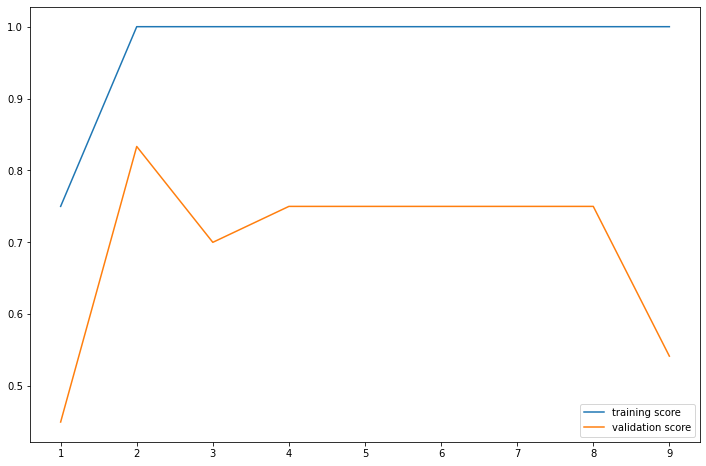

In [138]:
evaluation(model_tree)

<AxesSubplot:>

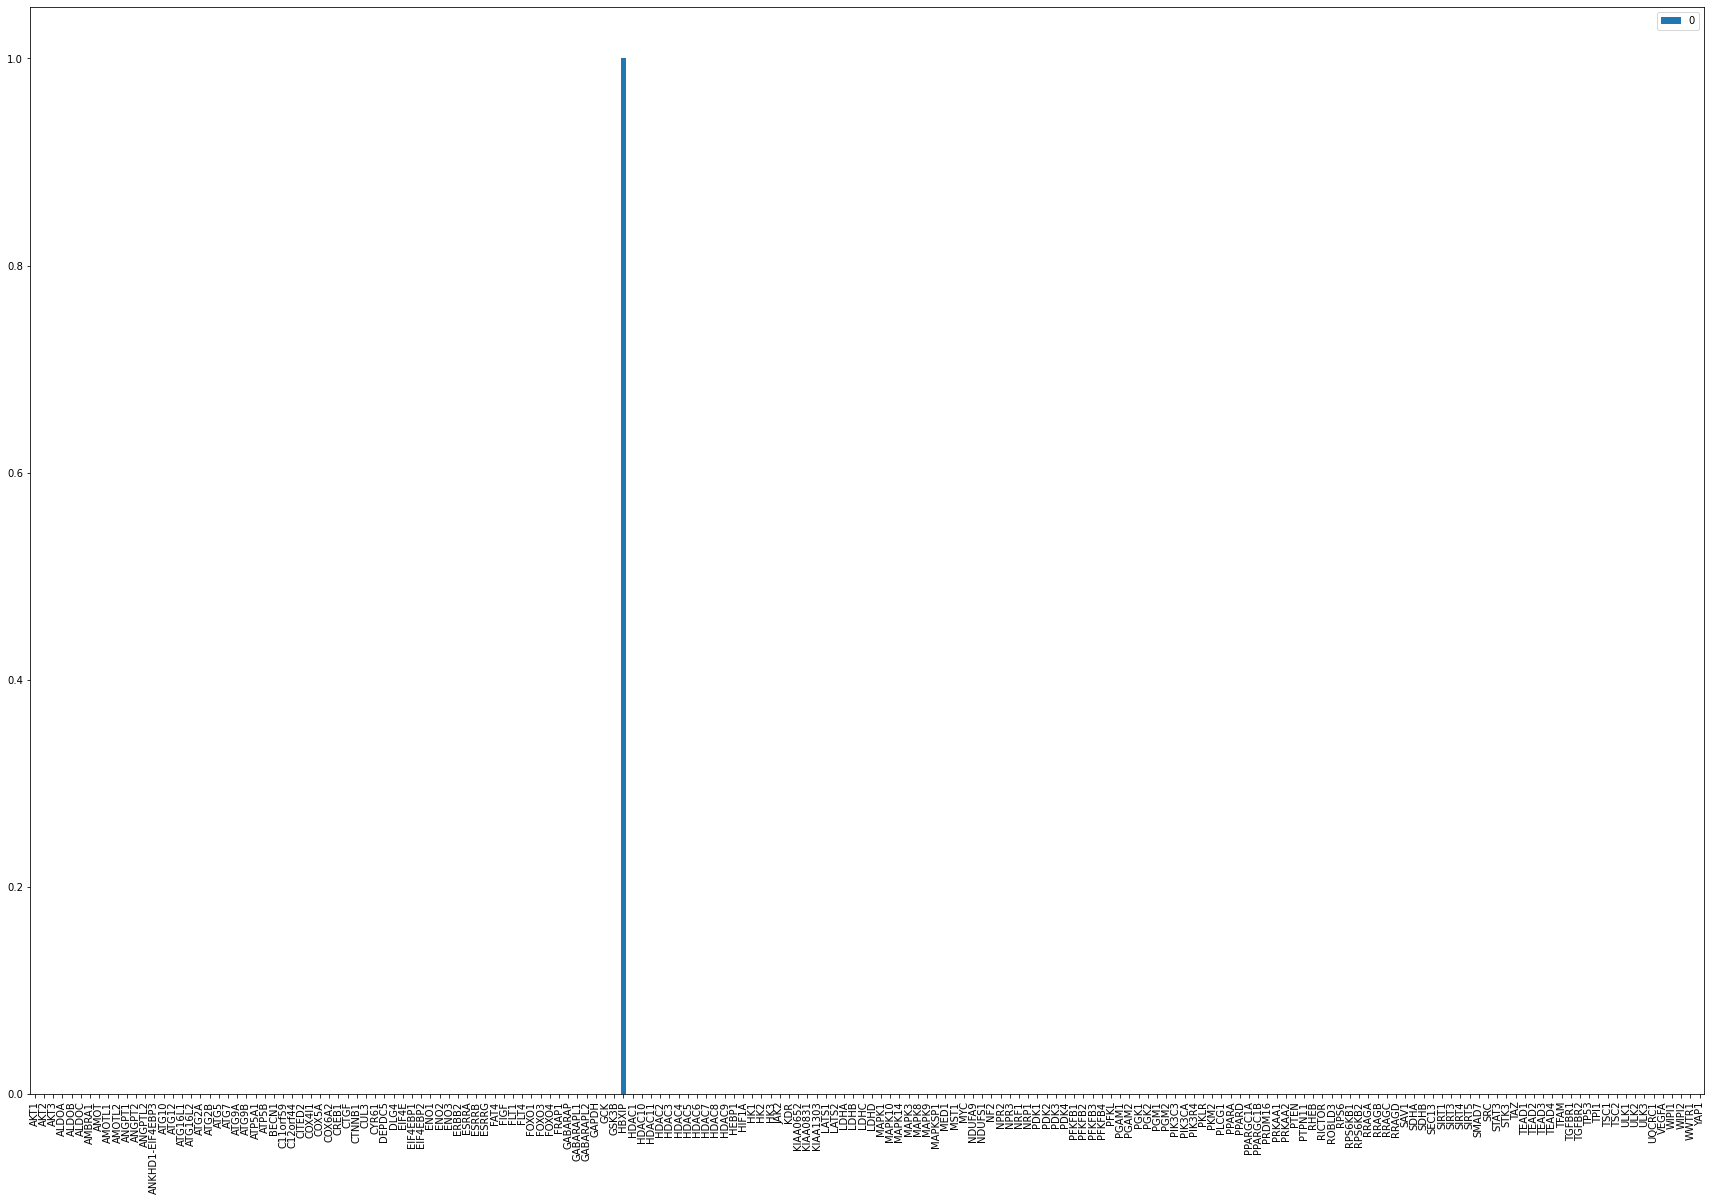

In [161]:
pd.DataFrame(model_tree.feature_importances_, index=x_train.columns).plot.bar(
    figsize=(30, 20))

#### 2nd test modeling +1 fold change method

In [126]:
def encode_time2(index_value): 
    if 'pre' in index_value:
        return 0
    elif 'post' in index_value:
        return 1


    
def encoding(data): 
    # 1. Creating a time column
    data['time'] = data.index.map(encode_time2)
    # 2. removing negative outliers
    
    #data=data[data>-2].fillna(value=-0.99)
    data=data[data>-1].fillna(value=0.9)    

    # 3. keeping the basal condition
    #basal_col=data.index.str.contains('basal')
    #data=data.loc[basal_col]

    # 4. Calculating the fold change with a special case for double negative with a lower value for post condition
    pre_conditions = data[data['time'] == 0]#.set_index('PGCP')
    post_conditions = data[data['time'] == 1]#.set_index('PGCP')

    pre_conditions = pre_conditions.reset_index(drop=True)
    post_conditions = post_conditions.reset_index(drop=True)

    fold_change = post_conditions / pre_conditions

        # Apply the condition for negative fold change
    fold_change = fold_change.mask((pre_conditions < 0) & (post_conditions < pre_conditions), -fold_change)
        # The mask() method replaces the values of the rows where the condition evaluates to True. 
        # The mask() method is the opposite of the The where() method.
    fold_change=fold_change.drop('time', axis=1)

    # 5. adding 1 to the pre condition
    pre_conditions+=1

    # 6. post condition = pre condition time fold change
    post_conditions = pre_conditions*fold_change

    # 7. set a new index
    j = range(1, (len(post_conditions)+1))
    i=pd.Series('post_' + str(j) for j in range(1, (len(post_conditions)+1)))
    post_conditions=post_conditions.set_index(i)

    j = range(1, (len(post_conditions)+1))
    i=pd.Series('pre_' + str(j) for j in range(1, (len(post_conditions)+1)))
    pre_conditions=pre_conditions.set_index(i)

    # 8. Concatenate the 2 df
    data=pd.concat([pre_conditions, post_conditions])
    data=data.drop('time', axis=1)
    return data

In [127]:
def aggregate(data): 
# Aggregate the multiple columns for each probe by taking the mean
    df_agg = data.groupby(data.columns.str.split('_').str[0], axis=1).mean()
    return df_agg

# Print the aggregated DataFrame
#data4=aggregate(data3)

data_mod1=encoding(data4)

In [128]:
from sklearn.model_selection import train_test_split
trainset1, testset1 = train_test_split(data_mod1, test_size=0.2, random_state=0)

def encode_training_status(index_values):
    if 'pre' in index_values:
        return 0
    if 'post' in index_values: 
        return 1
trainset1['training_status'] = trainset1.index.map(encode_training_status)
testset1['training_status'] = testset1.index.map(encode_training_status)

def define_x_y(data):
    x=data.drop('training_status', axis=1)
    y=data['training_status']
    print(y.value_counts())
    return x, y

x_train1, y_train1 = define_x_y(trainset1)
x_test1, y_test1 = define_x_y(testset1)

1    6
0    6
Name: training_status, dtype: int64
0    2
1    2
Name: training_status, dtype: int64


In [129]:
def evaluation2(model): 
    model.fit(x_train1, y_train1)
    y_pred1=model.predict(x_test1)
    print(confusion_matrix(y_test1, y_pred1))
    print(classification_report(y_test1, y_pred1))
    
    N, train_score, val_score = learning_curve(model, x_train1, y_train1, cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='training score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[2 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


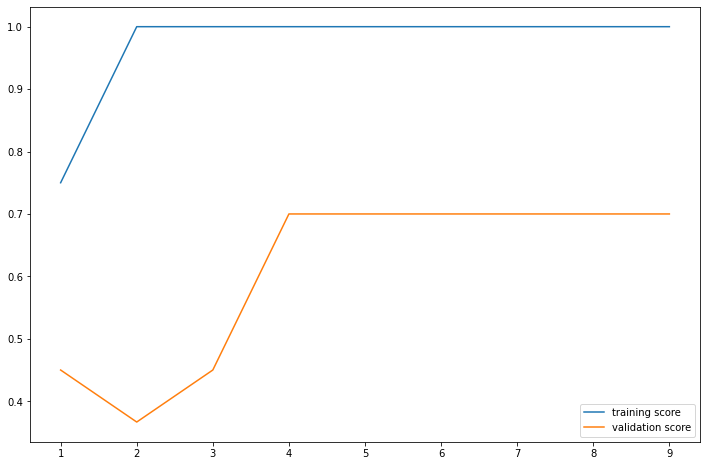

In [130]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(random_state=0)

evaluation2(model_tree)

<AxesSubplot:>

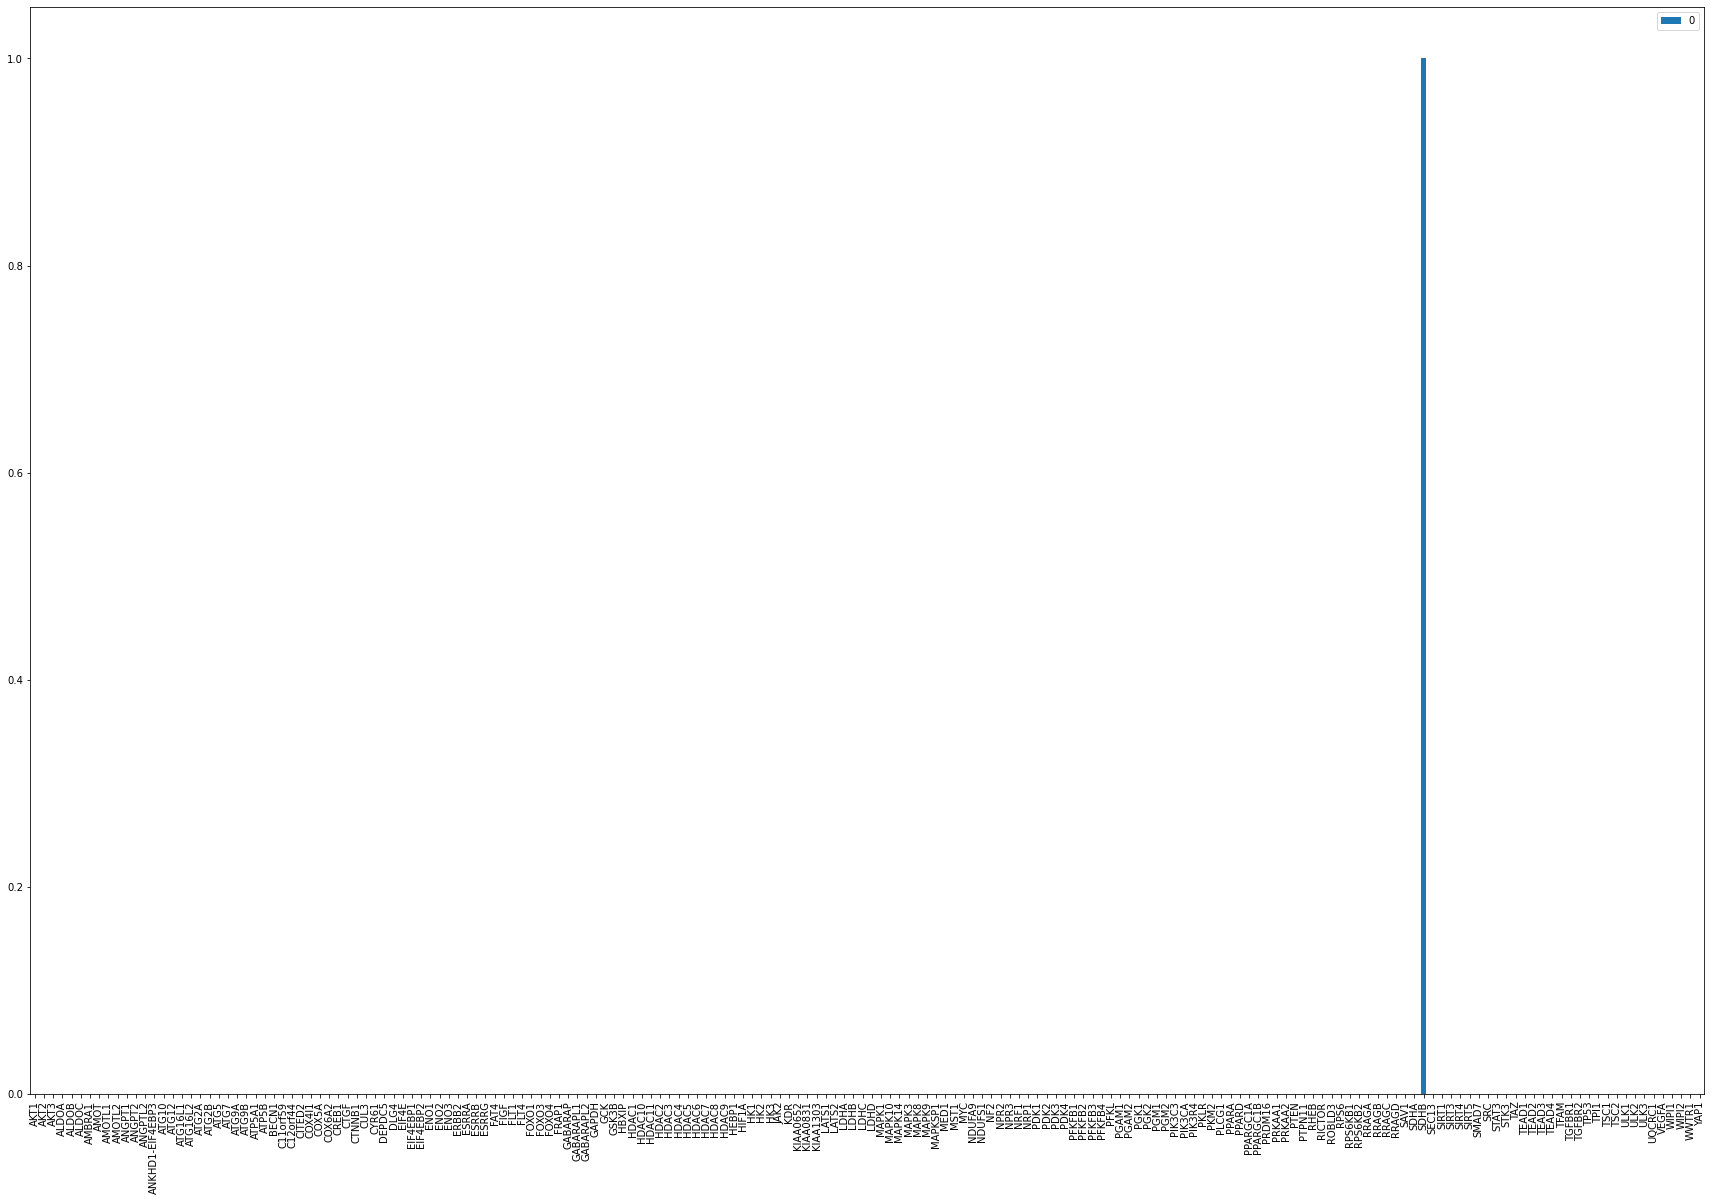

In [131]:
pd.DataFrame(model_tree.feature_importances_, index=x_train.columns).plot.bar(
    figsize=(30,20))

#### 3rd test modeling : robust scaler

In [220]:
def aggregate(data): 
# Aggregate the multiple columns for each probe by taking the mean
    df_agg = data.groupby(data.columns.str.split('_').str[0], axis=1).mean()
    return df_agg


# Print the aggregated DataFrame
data4=aggregate(data3)
data4

###==========================
###Scaling the data
###==========================
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_df=scaler.fit_transform(data4)
scaled_df

array([[-1.00630241e+00, -3.78140463e-01,  1.08197753e+00, ...,
         1.33532858e+00, -4.66773914e-07, -4.83950580e-01],
       [-2.18301330e-01,  1.60430497e-01, -2.68574848e-01, ...,
         9.53699361e-01,  4.09314270e+00, -8.96263055e+06],
       [-4.61308840e-01, -1.93508629e+07, -7.60370380e-02, ...,
         3.69390523e-01, -6.42985419e-07, -8.39835763e-01],
       ...,
       [ 2.64258476e-01, -8.34071999e+06, -4.92426757e-01, ...,
         2.70963755e-01, -1.61416418e-07, -1.18709001e-01],
       [ 4.67276509e-01,  5.14911778e-01,  8.85900707e-01, ...,
        -1.65653014e+00,  2.56576481e-07,  2.84822425e-01],
       [ 8.92851668e-01,  1.04018816e+07,  2.18631427e-01, ...,
        -4.47581076e-01,  1.37221788e-07,  5.97166613e-01]])

In [221]:
###=========================================
### Creating a new df with the scaled data
###=========================================
df=df_form(data4, scaled_df)

In [222]:
df

AKT1          AKT2          AKT3         ALDOA         ALDOB  \
pre_1  -1.006302 -3.781405e-01  1.081978e+00  5.902764e-01  1.775788e-07   
pre_2  -0.218301  1.604305e-01 -2.685748e-01 -6.659521e-01  3.280393e+00   
pre_3  -0.461309 -1.935086e+07 -7.603704e-02  9.460569e-01  2.398687e-01   
pre_4  -0.779248 -4.599821e-02 -2.609726e-01 -5.292303e-01 -3.318465e-07   
pre_5  -0.196793  4.353014e-01  6.624991e-01 -1.110550e+07 -3.899640e-01   
pre_6   1.856722 -5.392252e-01  3.951644e-02  1.464456e+00  3.553357e-08   
pre_7  -0.513009 -1.343218e-01  1.666084e+07 -3.770057e-01  8.781964e+00   
pre_8  -0.169352  4.599821e-02 -3.282639e-01  2.320992e-01 -2.784031e-07   
post_1 -0.722487  5.546461e+06 -6.577839e+06 -9.875198e+06  6.093368e+00   
post_2  0.701235 -1.435787e+07 -3.208775e-01  1.102883e+00  4.605698e-09   
post_3  0.299597  4.093335e-01 -3.951644e-02  5.831588e-01 -4.092560e-07   
post_4  0.793949 -7.190224e-01  1.176746e+07  2.466507e-01  7.816007e+00   
post_5  0.169352  2.169812e-01  7.179064e-02 -1.829335e-01 -2.220315e-07   
post_6  0.264258 -8.340720e+06 -4.924268e-01 -2.322628e-02 -4.605698e-09   
post_7  0.467277  5.149118e-01  8.859007e-01  2.322628e-02 -2.345058e-07   
post_8  0.892852  1.040188e+07  2.186314e-01 -1.235001e-01 -3.038901e+00   

               ALDOC    AMBRA1          AMOT        AMOTL1        AMOTL2  ...  \
pre_1  -1.896852e-01 -0.433236 -1.210451e+00 -5.500203e-07  7.901231e-01  ...   
pre_2  -3.249696e-01 -0.708627 -8.874008e-01 -4.303119e-07  7.848942e-01  ...   
pre_3   2.762295e+07 -0.974376 -3.019458e+00 -3.695231e+00 -1.069046e-01  ...   
pre_4  -3.650327e-01 -0.017866 -8.586031e-01 -3.505760e-07  1.105446e+00  ...   
pre_5  -8.962346e-01  0.351399 -2.029974e+00 -2.772635e-08  1.287469e+00  ...   
pre_6   1.249305e-01  0.388032  5.190235e-08  3.332386e-07 -1.372282e-01  ...   
pre_7   8.357123e-01 -0.788098 -9.978920e-01  3.999996e+00 -1.212797e+00  ...   
pre_8  -1.293053e+00  0.295601 -5.190235e-08 -8.508745e-07 -7.209839e-01  ...   
post_1 -2.902372e+06  0.017866 -1.006324e+00  1.538231e+01  1.535604e+07  ...   
post_2  6.199639e+06 -1.192388  1.091582e-07  2.772635e-08  4.443347e-01  ...   
post_3 -3.467536e-01  0.367848  1.230423e-07 -3.045704e-07  1.290685e-01  ...   
post_4  1.178188e-02 -0.623109  1.455705e-07  4.451490e+00 -1.826465e-02  ...   
post_5  4.986817e-01  0.531159  8.682977e-08  1.199440e+01  1.826465e-02  ...   
post_6  7.133648e-01 -0.577710  9.540899e-08 -4.753298e-08 -1.641935e-01  ...   
post_7 -1.178188e-02  0.325370  2.212048e-07  7.493129e-07 -3.626137e-01  ...   
post_8  6.271138e-01  0.874744  1.501570e-07  4.592743e-07 -5.479818e-01  ...   

            TSC2      ULK1          ULK2      ULK3    UQCRC1         VEGFA  \
pre_1  -0.032608  0.999416 -3.417602e-07 -0.160389 -0.932336 -1.174871e+00   
pre_2   0.537012  0.974309  3.999998e+00  0.509168 -1.026909 -1.731293e+00   
pre_3   0.058309  1.108203 -2.765501e-07 -0.153094 -0.591178 -8.191726e-01   
pre_4   0.382042  0.448283  6.360242e+00  0.506003 -0.441904 -8.459001e-01   
pre_5  -0.568439 -0.182320  1.619542e-07 -0.046049 -1.641869 -4.482764e+00   
pre_6   2.548251 -0.116426 -2.905834e-07 -2.235159  1.044643 -9.417092e-01   
pre_7  -1.718878  0.379915  9.282715e-09 -1.539677 -0.888627  4.074584e-08   
pre_8   0.474766  1.361021 -9.282715e-09 -0.944810 -0.232026  6.197572e-08   
post_1  1.270879 -0.588017  8.714548e-08  0.225485  0.154765 -4.709617e+00   
post_2 -0.563880 -1.767805 -2.270075e-07  1.086874  0.378709  2.207802e-07   
post_3 -0.486704  0.123713 -7.657369e-08 -0.898510  0.011860  3.545806e-07   
post_4 -0.788903 -0.649485  4.399469e-08  0.046049  0.927192  4.119169e-07   
post_5 -0.673790  0.116426  5.407505e+00  0.310372 -0.011860 -4.074584e-08   
post_6  0.076786 -0.364275 -3.278359e-07  0.882673  1.217848  1.191007e-07   
post_7 -1.443289 -1.724068 -4.236379e-07  0.539389  0.206509  2.299211e-07   
post_8  0.032608 -0.214836  4.076238e+00 -0.358105  0.319710  3.953003e-07   

           WIP

In [223]:
###==================================
### Train-test split
###==================================
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
trainset['training_status'] = trainset.index.map(encode_training_status)
testset['training_status'] = testset.index.map(encode_training_status)
trainset

AKT1          AKT2          AKT3         ALDOA         ALDOB  \
post_6  0.264258 -8.340720e+06 -4.924268e-01 -2.322628e-02 -4.605698e-09   
pre_5  -0.196793  4.353014e-01  6.624991e-01 -1.110550e+07 -3.899640e-01   
pre_3  -0.461309 -1.935086e+07 -7.603704e-02  9.460569e-01  2.398687e-01   
post_7  0.467277  5.149118e-01  8.859007e-01  2.322628e-02 -2.345058e-07   
post_3  0.299597  4.093335e-01 -3.951644e-02  5.831588e-01 -4.092560e-07   
pre_8  -0.169352  4.599821e-02 -3.282639e-01  2.320992e-01 -2.784031e-07   
post_8  0.892852  1.040188e+07  2.186314e-01 -1.235001e-01 -3.038901e+00   
post_4  0.793949 -7.190224e-01  1.176746e+07  2.466507e-01  7.816007e+00   
pre_4  -0.779248 -4.599821e-02 -2.609726e-01 -5.292303e-01 -3.318465e-07   
pre_1  -1.006302 -3.781405e-01  1.081978e+00  5.902764e-01  1.775788e-07   
pre_6   1.856722 -5.392252e-01  3.951644e-02  1.464456e+00  3.553357e-08   
post_5  0.169352  2.169812e-01  7.179064e-02 -1.829335e-01 -2.220315e-07   

               ALDOC    AMBRA1          AMOT        AMOTL1    AMOTL2  ...  \
post_6  7.133648e-01 -0.577710  9.540899e-08 -4.753298e-08 -0.164194  ...   
pre_5  -8.962346e-01  0.351399 -2.029974e+00 -2.772635e-08  1.287469  ...   
pre_3   2.762295e+07 -0.974376 -3.019458e+00 -3.695231e+00 -0.106905  ...   
post_7 -1.178188e-02  0.325370  2.212048e-07  7.493129e-07 -0.362614  ...   
post_3 -3.467536e-01  0.367848  1.230423e-07 -3.045704e-07  0.129069  ...   
pre_8  -1.293053e+00  0.295601 -5.190235e-08 -8.508745e-07 -0.720984  ...   
post_8  6.271138e-01  0.874744  1.501570e-07  4.592743e-07 -0.547982  ...   
post_4  1.178188e-02 -0.623109  1.455705e-07  4.451490e+00 -0.018265  ...   
pre_4  -3.650327e-01 -0.017866 -8.586031e-01 -3.505760e-07  1.105446  ...   
pre_1  -1.896852e-01 -0.433236 -1.210451e+00 -5.500203e-07  0.790123  ...   
pre_6   1.249305e-01  0.388032  5.190235e-08  3.332386e-07 -0.137228  ...   
post_5  4.986817e-01  0.531159  8.682977e-08  1.199440e+01  0.018265  ...   

            ULK1          ULK2      ULK3    UQCRC1         VEGFA     WIPI1  \
post_6 -0.364275 -3.278359e-07  0.882673  1.217848  1.191007e-07  0.640154   
pre_5  -0.182320  1.619542e-07 -0.046049 -1.641869 -4.482764e+00 -0.532524   
pre_3   1.108203 -2.765501e-07 -0.153094 -0.591178 -8.191726e-01 -0.696289   
post_7 -1.724068 -4.236379e-07  0.539389  0.206509  2.299211e-07  0.569132   
post_3  0.123713 -7.657369e-08 -0.898510  0.011860  3.545806e-07  0.067278   
pre_8   1.361021 -9.282715e-09 -0.944810 -0.232026  6.197572e-08  0.011151   
post_8 -0.214836  4.076238e+00 -0.358105  0.319710  3.953003e-07  1.025320   
post_4 -0.649485  4.399469e-08  0.046049  0.927192  4.119169e-07  0.636532   
pre_4   0.448283  6.360242e+00  0.506003 -0.441904 -8.459001e-01 -0.489436   
pre_1   0.999416 -3.417602e-07 -0.160389 -0.932336 -1.174871e+00 -0.728225   
pre_6  -0.116426 -2.905834e-07 -2.235159  1.044643 -9.417092e-01  0.759093   
post_5  0.116426  5.407505e+00  0.310372 -0.011860 -4.074584e-08 -0.011151   

           WIPI2         WWTR1      YAP1  training_status  
post_6  0.270964 -1.614164e-07 -0.118709                1  
pre_5  -0.342918  1.023637e+01  0.571677                0  
pre_3   0.369391 -6.429854e-07 -0.839836                0  
post_7 -1.656530  2.565765e-07  0.284822                1  
post_3 -1.156205 -1.372218e-07  0.429485                1  
pre_8   1.251191  2.499442e-07  0.098329                0  
post_8 -0.447581  1.372218e-07  0.597167                1  
post_4 -0.300452 -1.384819e-07 -0.394471                1  
pre_4   0.485282 -4.640251e+00 -0.098329                0  
pre_1   1.335329 -4.667739e-07 -0.483951                0  
pre_6   1.414941 -3.665006e+00  0.463634                0  
post_5  0.408520  4.702164e-07  0.861563                1  

[12 rows x 183 columns]

1    6
0    6
Name: training_status, dtype: int64
0    2
1    2
Name: training_status, dtype: int64
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

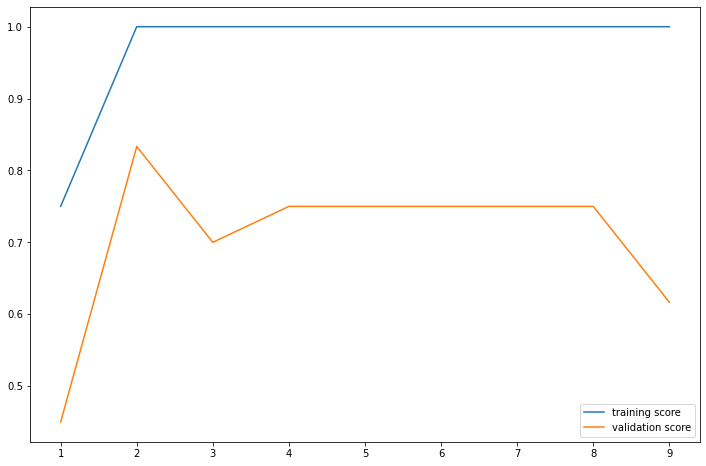

In [224]:
###================
### define x and y
###================
x_train, y_train=define_x_y(trainset)
x_test, y_test = define_x_y(testset)

def evaluation(model): 
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='training score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
evaluation(model)

<AxesSubplot:>

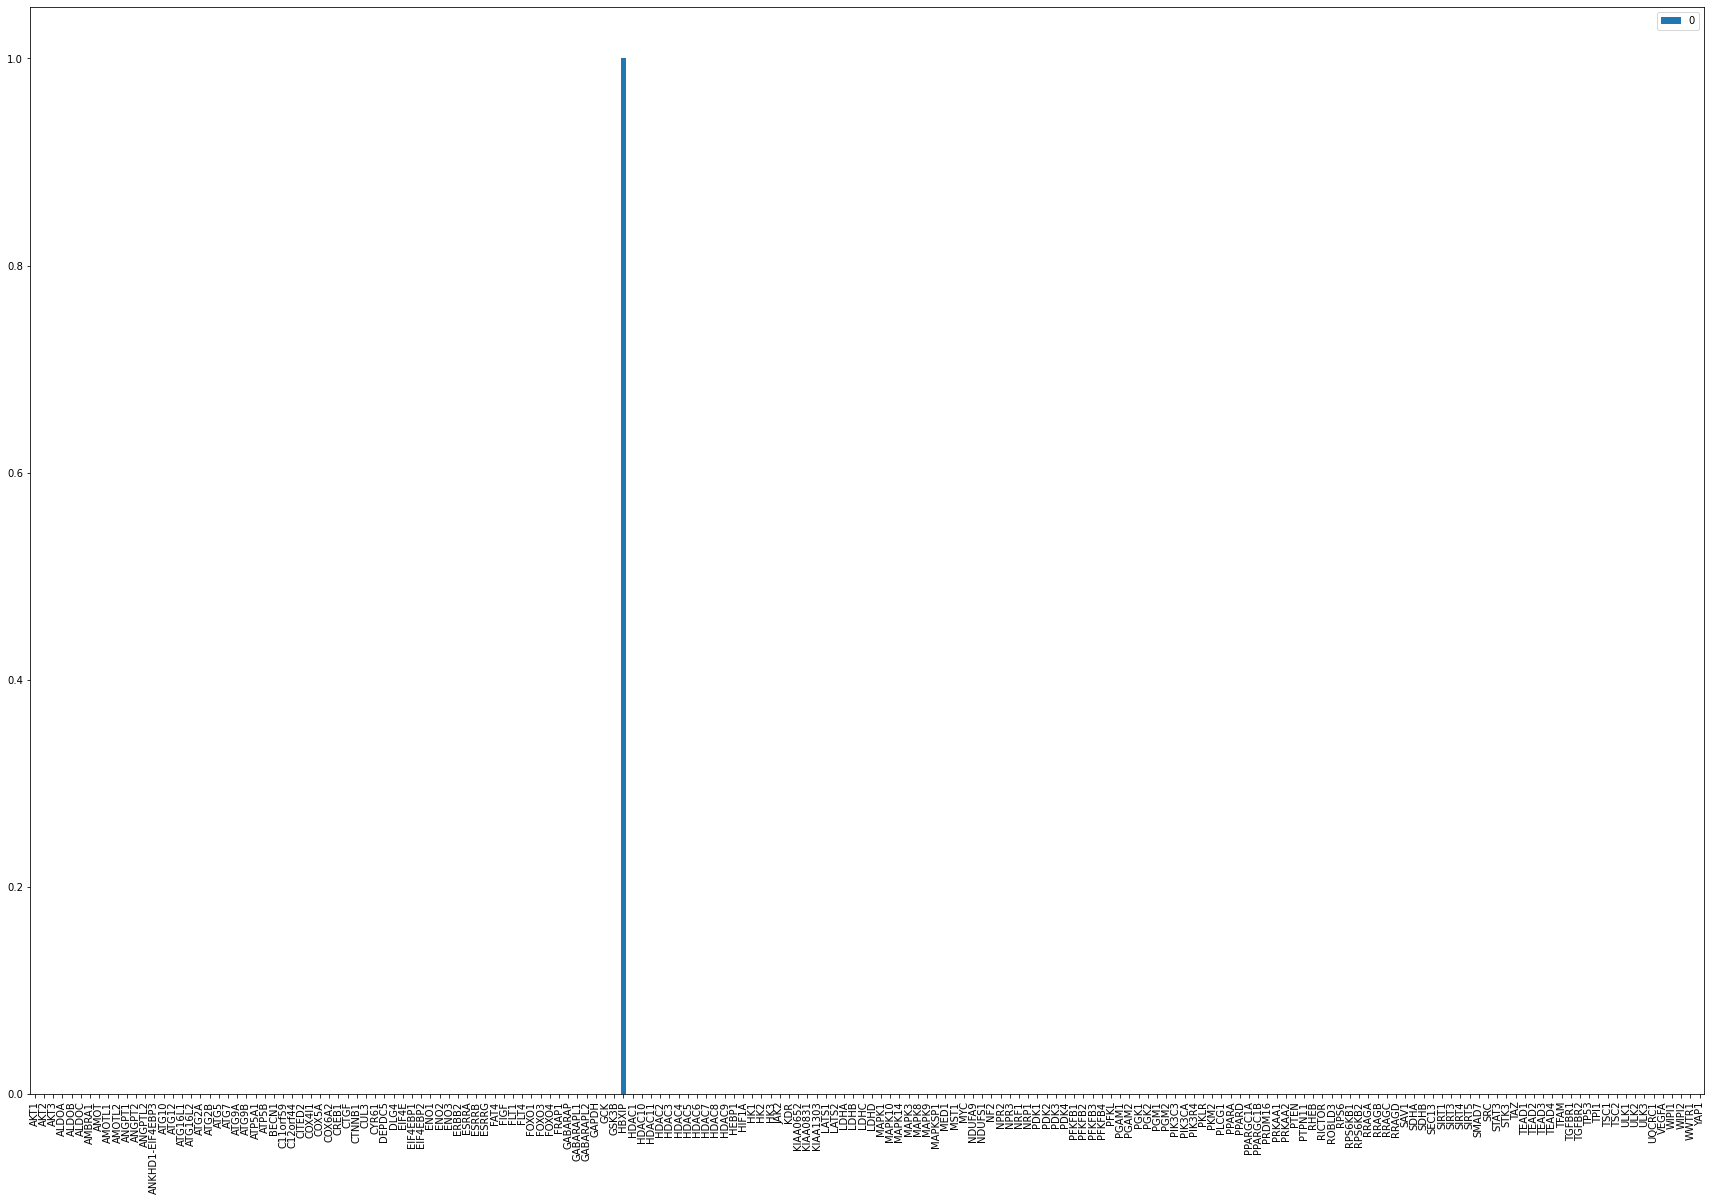

In [225]:
pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(
    figsize=(30,20))

#### 4th test modeling : non normalized data

In [334]:
def aggregate(data): 
# Aggregate the multiple columns for each probe by taking the mean
    df_agg = data.groupby(data.columns.str.split('_').str[0], axis=1).mean()
    return df_agg


# Print the aggregated DataFrame
data4=aggregate(data3)
data4

AKT1          AKT2          AKT3         ALDOA         ALDOB  \
pre_1  -0.476831 -2.631272e-01  4.876850e-01  1.179020e-01  5.068634e-01   
pre_2  -0.154392  1.964468e-01 -2.412216e-01 -5.696828e-01  6.866042e+06   
pre_3  -0.253828 -1.651250e+07 -1.373070e-01  3.126352e-01  5.020585e+05   
pre_4  -0.383924  2.029681e-02 -2.371186e-01 -4.948495e-01 -5.593917e-01   
pre_5  -0.145591  4.310000e-01  2.612883e-01 -6.078491e+06 -8.162158e+05   
pre_6   0.694679 -4.005843e-01 -7.494164e-02  5.963762e-01  2.095549e-01   
pre_7  -0.274982 -5.507160e-02  8.992022e+06 -4.115307e-01  1.838113e+07   
pre_8  -0.134363  9.879931e-02 -2.734364e-01 -7.814288e-02 -4.475317e-01   
post_1 -0.360698  4.732913e+06 -3.550125e+06 -5.405097e+06  1.275375e+07   
post_2  0.221869 -1.225188e+07 -2.694499e-01  3.984725e-01  1.448212e-01   
post_3  0.057525  4.088411e-01 -1.175965e-01  1.140063e-01 -7.214141e-01   
post_4  0.259807 -5.540090e-01  6.351016e+06 -7.017827e-02  1.635933e+07   
post_5  0.004230  2.447027e-01 -5.752293e-02 -3.053071e-01 -3.295429e-01   
post_6  0.043065 -7.117314e+06 -3.620367e-01 -2.178929e-01  1.255412e-01   
post_7  0.126137  4.989332e-01  3.818604e-01 -1.924675e-01 -3.556523e-01   
post_8  0.300276  8.876147e+06  2.172851e-02 -2.727768e-01 -6.360588e+06   

               ALDOC    AMBRA1          AMOT        AMOTL1        AMOTL2  ...  \
pre_1  -9.463000e-02 -0.279981 -7.826724e+06 -2.529210e-01  4.873238e-01  ...   
pre_2  -1.621206e-01 -0.455362 -5.737894e+06 -1.650040e-01  4.834852e-01  ...   
pre_3   1.378052e+07 -0.624603 -1.952368e+07 -2.713876e+06 -1.711893e-01  ...   
pre_4  -1.821072e-01 -0.015454 -5.551689e+06 -1.064438e-01  7.188044e-01  ...   
pre_5  -4.471128e-01  0.219710 -1.312572e+07  1.306656e-01  8.524284e-01  ...   
pre_6   6.232524e-02  0.243040 -1.720872e-01  3.957679e-01 -1.934500e-01  ...   
pre_7   4.169195e-01 -0.505973 -6.452325e+06  2.937704e+06 -9.830313e-01  ...   
pre_8  -6.450770e-01  0.184175 -8.432837e-01 -4.738764e-01 -6.219883e-01  ...   
post_1 -1.447933e+06  0.007301 -6.506844e+06  1.129718e+07  1.127296e+07  ...   
post_2  3.092871e+06 -0.763443  1.981263e-01  1.713915e-01  2.334786e-01  ...   
post_3 -1.729882e-01  0.230186  2.879002e-01 -7.265610e-02  2.039909e-03  ...   
post_4  5.877733e-03 -0.400901  4.335666e-01  3.269293e+06 -1.061182e-01  ...   
post_5  2.487819e-01  0.334189  5.375195e-02  8.809009e+06 -7.930183e-02  ...   
post_6  3.558829e-01 -0.371988  1.092248e-01  1.161191e-01 -2.132454e-01  ...   
post_7 -5.877733e-03  0.203134  9.226146e-01  7.013440e-01 -3.589067e-01  ...   
post_8  3.128540e-01  0.553000  4.632230e-01  4.883319e-01 -4.949865e-01  ...   

            TSC2      ULK1          ULK2      ULK3    UQCRC1         VEGFA  \
pre_1   0.031804  0.412245 -2.333138e-01 -0.015387 -0.378240 -4.039081e+06   
pre_2   0.211593  0.403640  5.000034e+06  0.150340 -0.415935 -5.951996e+06   
pre_3   0.060500  0.449533 -1.518006e-01 -0.013581 -0.242260 -2.816227e+06   
pre_4   0.162680  0.223340  7.950359e+06  0.149556 -0.182763 -2.908113e+06   
pre_5  -0.137320  0.007196  3.963337e-01  0.012914 -0.661047 -1.541126e+07   
pre_6   0.846397  0.029782 -1.693423e-01 -0.528927  0.409749 -3.237495e+06   
pre_7  -0.500431  0.199906  2.054930e-01 -0.356784 -0.360818 -3.974228e-01   
pre_8   0.191946  0.536188  1.822860e-01 -0.209544 -0.099109 -3.244368e-01   
post_1  0.443222 -0.131860  3.028221e-01  0.080123  0.055059 -1.619115e+07   
post_2 -0.135880 -0.536242 -8.987188e-02  0.293332  0.144319  2.215158e-01   
post_3 -0.111522  0.112091  9.817171e-02 -0.198084 -0.001900  6.815072e-01   
post_4 -0.206904 -0.152928  2.488832e-01  0.035710  0.362935  8.786231e-01   
post_5 -0.170571  0.109593  6.759429e+06  0.101134 -0.011355 -6.775824e-01   
post_6  0.066332 -0.055171 -2.159083e-01  0.242788  0.478785 -1.280472e-01   
post_7 -0.413447 -0.521250 -3.356617e-01  0.157820  0.075683  2.529414e-01   
post_8  0.052388 -0.003949  5.095334e+06 -0.064325  0.120803  8.214968e-01   

           WIP

In [335]:
###==================================
### Train-test split
###==================================
trainset, testset = train_test_split(data4, test_size=0.2, random_state=0)
trainset['training_status'] = trainset.index.map(encode_training_status)
testset['training_status'] = testset.index.map(encode_training_status)
trainset

AKT1          AKT2          AKT3         ALDOA         ALDOB  \
post_6  0.043065 -7.117314e+06 -3.620367e-01 -2.178929e-01  1.255412e-01   
pre_5  -0.145591  4.310000e-01  2.612883e-01 -6.078491e+06 -8.162158e+05   
pre_3  -0.253828 -1.651250e+07 -1.373070e-01  3.126352e-01  5.020585e+05   
post_7  0.126137  4.989332e-01  3.818604e-01 -1.924675e-01 -3.556523e-01   
post_3  0.057525  4.088411e-01 -1.175965e-01  1.140063e-01 -7.214141e-01   
pre_8  -0.134363  9.879931e-02 -2.734364e-01 -7.814288e-02 -4.475317e-01   
post_8  0.300276  8.876147e+06  2.172851e-02 -2.727768e-01 -6.360588e+06   
post_4  0.259807 -5.540090e-01  6.351016e+06 -7.017827e-02  1.635933e+07   
pre_4  -0.383924  2.029681e-02 -2.371186e-01 -4.948495e-01 -5.593917e-01   
pre_1  -0.476831 -2.631272e-01  4.876850e-01  1.179020e-01  5.068634e-01   
pre_6   0.694679 -4.005843e-01 -7.494164e-02  5.963762e-01  2.095549e-01   
post_5  0.004230  2.447027e-01 -5.752293e-02 -3.053071e-01 -3.295429e-01   

               ALDOC    AMBRA1          AMOT        AMOTL1    AMOTL2  ...  \
post_6  3.558829e-01 -0.371988  1.092248e-01  1.161191e-01 -0.213245  ...   
pre_5  -4.471128e-01  0.219710 -1.312572e+07  1.306656e-01  0.852428  ...   
pre_3   1.378052e+07 -0.624603 -1.952368e+07 -2.713876e+06 -0.171189  ...   
post_7 -5.877733e-03  0.203134  9.226146e-01  7.013440e-01 -0.358907  ...   
post_3 -1.729882e-01  0.230186  2.879002e-01 -7.265610e-02  0.002040  ...   
pre_8  -6.450770e-01  0.184175 -8.432837e-01 -4.738764e-01 -0.621988  ...   
post_8  3.128540e-01  0.553000  4.632230e-01  4.883319e-01 -0.494987  ...   
post_4  5.877733e-03 -0.400901  4.335666e-01  3.269293e+06 -0.106118  ...   
pre_4  -1.821072e-01 -0.015454 -5.551689e+06 -1.064438e-01  0.718804  ...   
pre_1  -9.463000e-02 -0.279981 -7.826724e+06 -2.529210e-01  0.487324  ...   
pre_6   6.232524e-02  0.243040 -1.720872e-01  3.957679e-01 -0.193450  ...   
post_5  2.487819e-01  0.334189  5.375195e-02  8.809009e+06 -0.079302  ...   

            ULK1          ULK2      ULK3    UQCRC1         VEGFA     WIPI1  \
post_6 -0.055171 -2.159083e-01  0.242788  0.478785 -1.280472e-01  0.356477   
pre_5   0.007196  3.963337e-01  0.012914 -0.661047 -1.541126e+07 -0.474668   
pre_3   0.449533 -1.518006e-01 -0.013581 -0.242260 -2.816227e+06 -0.590738   
post_7 -0.521250 -3.356617e-01  0.157820  0.075683  2.529414e-01  0.306139   
post_3  0.112091  9.817171e-02 -0.198084 -0.001900  6.815072e-01 -0.049554   
pre_8   0.536188  1.822860e-01 -0.209544 -0.099109 -3.244368e-01 -0.089334   
post_8 -0.003949  5.095334e+06 -0.064325  0.120803  8.214968e-01  0.629466   
post_4 -0.152928  2.488832e-01  0.035710  0.362935  8.786231e-01  0.353909   
pre_4   0.223340  7.950359e+06  0.149556 -0.182763 -2.908113e+06 -0.444129   
pre_1   0.412245 -2.333138e-01 -0.015387 -0.378240 -4.039081e+06 -0.613373   
pre_6   0.029782 -1.693423e-01 -0.528927  0.409749 -3.237495e+06  0.440776   
post_5  0.109593  6.759429e+06  0.101134 -0.011355 -6.775824e-01 -0.105141   

           WIPI2         WWTR1      YAP1  training_status  
post_6  0.032980 -1.052412e-01 -0.077067                1  
pre_5  -0.054125  7.097195e+06  0.388390                0  
pre_3   0.046945 -4.391281e-01 -0.563251                0  
post_7 -0.240515  1.845663e-01  0.194993                1  
post_3 -0.169524 -8.846635e-02  0.292525                1  
pre_8   0.172065  1.799679e-01  0.069259                0  
post_8 -0.068976  1.018140e-01  0.405576                1  
post_4 -0.048099 -8.934004e-02 -0.262986                1  
pre_4   0.063390 -3.217231e+06 -0.063327                0  
pre_1   0.184004 -3.169551e-01 -0.323313                0  
pre_6   0.195300 -2.541063e+06  0.315548                0  
post_5  0.052498  3.326896e-01  0.583831                1  

[12 rows x 183 columns]

1    6
0    6
Name: training_status, dtype: int64
0    2
1    2
Name: training_status, dtype: int64
[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


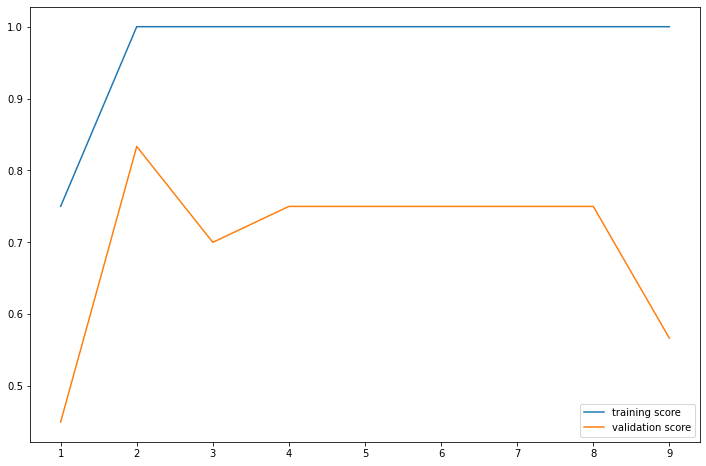

In [336]:
###================
### define x and y
###================
x_train, y_train=define_x_y(trainset)
x_test, y_test = define_x_y(testset)

def evaluation(model): 
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='training score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
evaluation(model)

<AxesSubplot:>

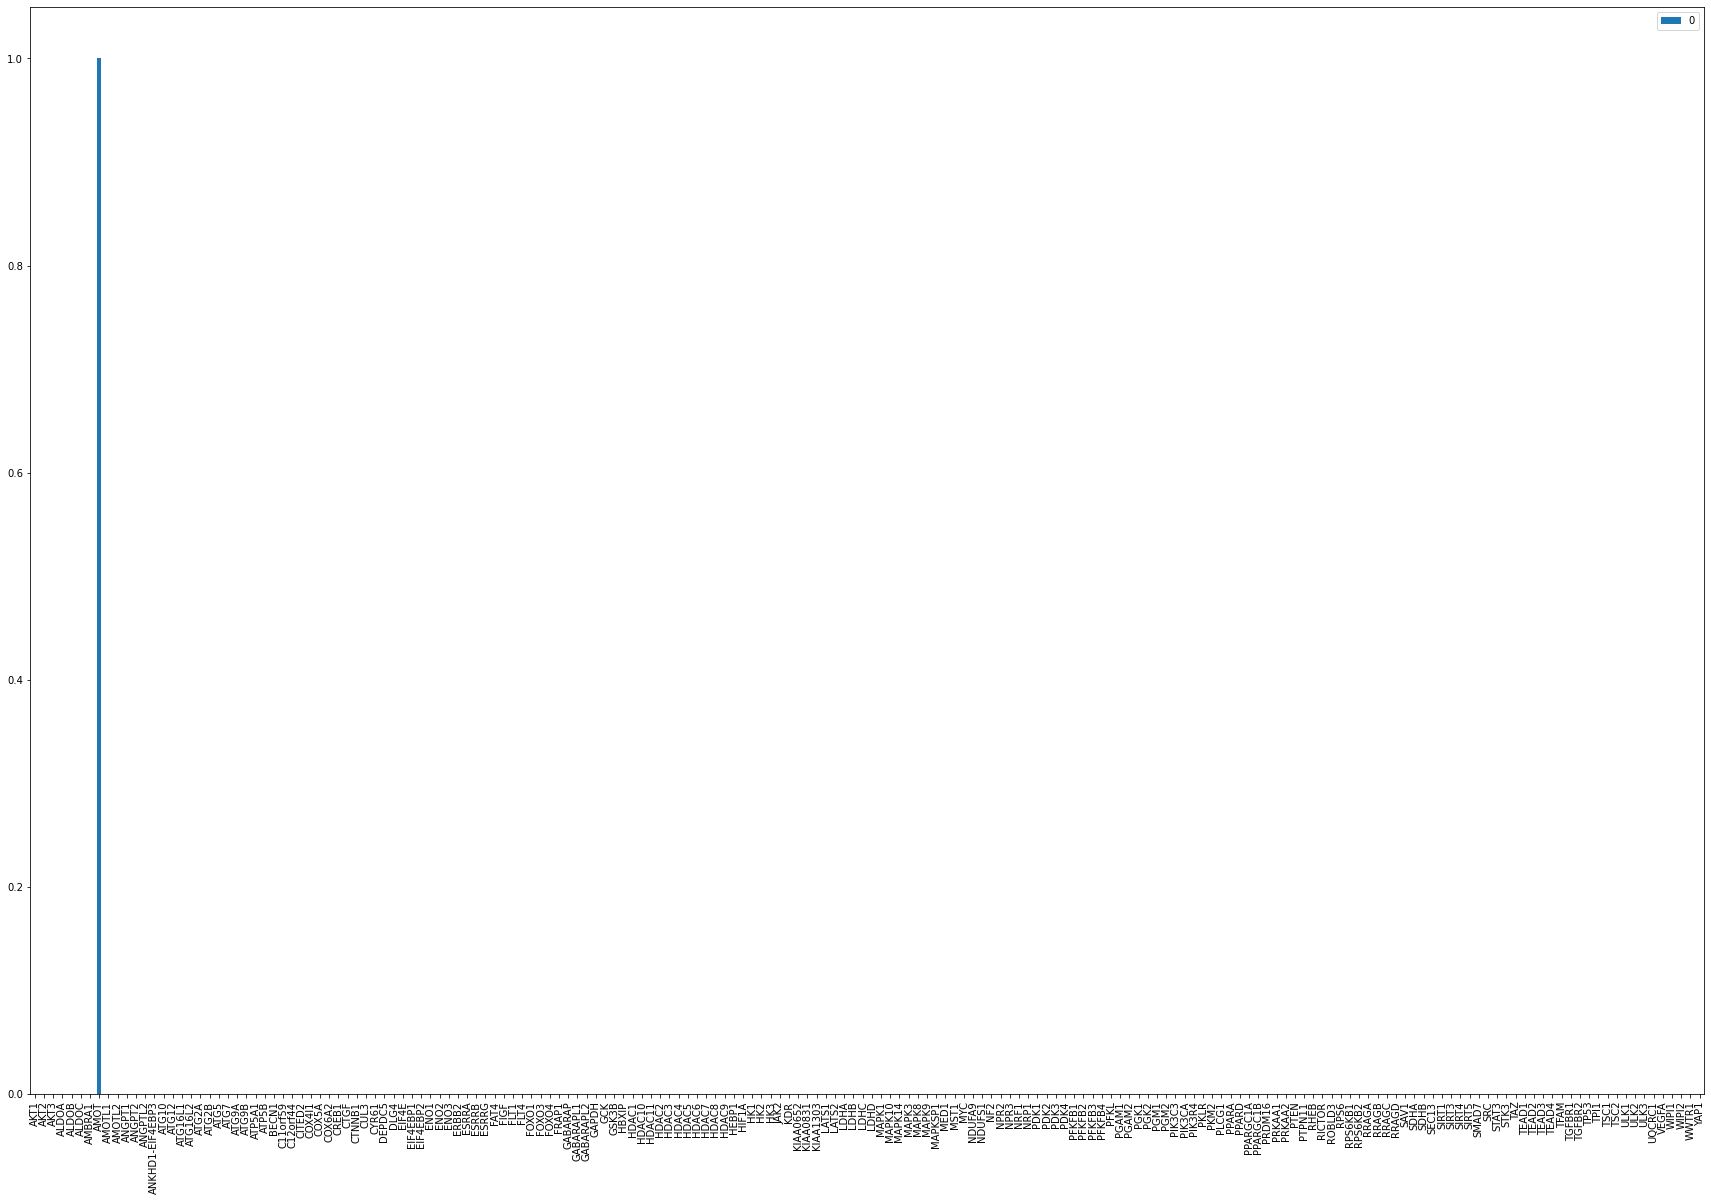

In [337]:
pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(
    figsize=(30,20))

### 3.2. Improve model performance
- The outliers are something usual when working with Gene expression, so we keep them
- First, due to the amount of column we need a feature selection : 
    - PCA 
    - SelectKBest, SelectFromModel
    - RFECV
        - then we will compare if we have common features
- Feature engineering ???
- Feature scaling 
    - we should proceed to the scaling and selection of method now
- Data leakage ???

#### ==========================Tryout with PCA =================================

- We are going to keep minmaxscaler and try PCA just because i wanted to work with PCA but see this as a simple tryout
- we are going to create pipelines with simple models we know and see normalization fits best

In [26]:
# Our starting point (cleaned & scaled data) : 
# df1 & data_mod1

# Create the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

#### df1 - minmaxscaler 

In [59]:
df1

A1BG          A1CF         A2BP1     A2LD1       A2M  \
pre_1   1.104757e-07  7.421903e-01  7.965842e-08  1.000000  0.666283   
pre_2   1.115183e-08  4.934703e-08  1.383289e-07  1.000000  0.488530   
pre_3   1.788259e-08  7.838847e-08  1.028343e-07  1.000000  0.205458   
pre_4   1.397807e-08  7.885522e-08  1.533372e-07  1.000000  0.322598   
pre_5   3.583297e-08  5.247406e-08  1.414517e-07  0.240291  0.775868   
pre_6   2.577810e-09  8.865908e-08  8.973963e-08  1.000000  0.549204   
pre_7   1.470633e-07  1.000000e+00  5.641055e-08  1.000000  0.513694   
pre_8   1.832453e-08  2.834181e-08  1.350139e-07  1.000000  0.000000   
post_1  1.000000e+00  9.090117e-08  1.000000e+00  0.000000  0.198770   
post_2  1.126055e-08  1.066366e-08  5.265636e-08  1.000000  0.892962   
post_3  0.000000e+00  0.000000e+00  0.000000e+00  1.000000  0.782737   
post_4  7.792083e-08  7.541866e-08  5.966052e-08  1.000000  0.664512   
post_5  9.887107e-08  3.650638e-08  1.775965e-07  1.000000  0.539676   
post_6  1.437921e-08  3.390058e-08  9.957956e-08  1.000000  0.757049   
post_7  6.550602e-08  9.840794e-08  3.394049e-08  1.000000  1.000000   
post_8  8.030837e-08  7.320316e-08  7.580701e-08  1.000000  0.205664   

           A2ML1       A3GALT2        A4GALT         A4GNT      AAAS  ...  \
pre_1   0.329313  5.357478e-08  3.096328e-07  3.217301e-08  0.617481  ...   
pre_2   0.000000  2.107899e-08  4.110544e-07  2.566612e-08  0.755511  ...   
pre_3   0.224331  3.631535e-08  2.010048e-07  2.253675e-08  0.723935  ...   
pre_4   0.223040  1.576760e-08  9.942563e-08  1.925979e-08  0.837403  ...   
pre_5   0.028096  0.000000e+00  4.534995e-07  0.000000e+00  0.706735  ...   
pre_6   0.395558  4.273122e-08  0.000000e+00  2.704535e-08  0.618372  ...   
pre_7   1.000000  1.000000e+00  1.000000e+00  1.000000e+00  0.000000  ...   
pre_8   0.432729  5.131823e-08  2.575839e-07  2.556463e-08  0.564758  ...   
post_1  0.127617  1.115718e-07  2.830243e-07  6.507381e-01  1.000000  ...   
post_2  0.310054  2.195058e-08  4.353353e-07  1.463316e-08  0.691810  ...   
post_3  0.173901  2.212797e-09  5.256698e-07  3.675661e-09  0.702318  ...   
post_4  0.491515  7.755611e-08  6.597540e-07  4.250266e-08  0.671297  ...   
post_5  0.331637  3.545960e-08  2.641450e-07  2.378664e-08  0.801651  ...   
post_6  0.428724  4.690141e-08  1.069416e-07  2.719612e-08  0.836440  ...   
post_7  0.523019  5.605549e-08  4.985301e-07  3.142048e-08  0.664264  ...   
post_8  0.572404  1.000124e-07  3.128984e-07  5.257361e-08  0.549937  ...   

        tcag7.1023  tcag7.1177    tcag7.1196  tcag7.1239  tcag7.1263  \
pre_1     0.555435    0.745233  7.182694e-08    0.178898    0.999999   
pre_2     0.392729    1.000000  6.497074e-08    0.250733    0.999999   
pre_3     0.936146    0.745233  8.401117e-08    0.659299    0.999999   
pre_4     0.706216    0.745233  4.808077e-08    0.628102    0.999999   
pre_5     0.446051    0.745233  5.279565e-08    0.934535    0.999999   
pre_6     1.000000    0.745233  0.000000e+00    0.896577    1.000000   
pre_7     0.393121    0.745233  1.000000e+00    0.000000    0.999999   
pre_8     0.388491    0.745233  2.797020e-08    0.128488    0.999999   
post_1    0.978652    0.745233  3.301368e-08    0.887098    0.000000   
post_2    0.505173    0.713565  5.658784e-08    0.641746    1.000000   
post_3    0.691453    0.745233  5.687571e-08    0.783883    1.000000   
post_4    0.888165    0.745233  5.007084e-08    0.693286    1.000000   
post_5    0.718746    0.745233  4.358007e-08    1.000000    1.000000   
post_6    0.224459    0.745233  2.734046e-08    0.302596    1.000000   
post_7    0.000000    0.516194  1.343356e-08    0.067043    1.000000   
post_8    0.340058    0.000000  1.910126e-08    0.350833    1.000000   

        tcag7.23  tcag7.350     tcag7.873  tcag7.907     tcag7.977  
pre_1   0.739852   0.472796  5.322250e-08   1.000000  1.815649e-08  
pre_2   0.672269   0.271959  6.023531e-08   0.363899  0.000000e+00  
pre_3   1.000000   1.000000  4.600110e-08   0.363

In [27]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df1, test_size=0.2, random_state=0)

def encode_training_status(index_values):
    if 'pre' in index_values:
        return 0
    if 'post' in index_values: 
        return 1

trainset['training_status'] = trainset.index.map(encode_training_status)
testset['training_status'] = testset.index.map(encode_training_status)

def define_x_y(data):
    x=data.drop('training_status', axis=1)
    y=data['training_status']
    print(y.value_counts())
    return x, y

x_train, y_train=define_x_y(trainset)
x_test, y_test = define_x_y(testset)

1    6
0    6
Name: training_status, dtype: int64
0    2
1    2
Name: training_status, dtype: int64


In [28]:
x_train.shape

(12, 182)

In [29]:
model_pca = PCA(n_components=12)
model_pca.fit_transform(x_train)
x_reduced=model_pca.fit_transform(x_train)

In [30]:
x_reduced.shape

(12, 12)

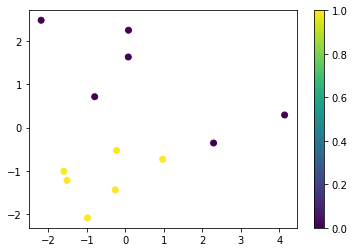

In [31]:
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_train)
plt.colorbar()

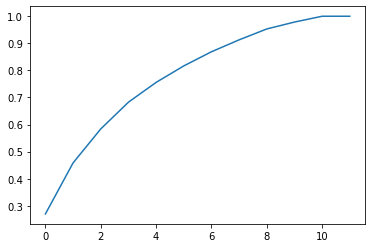

In [32]:
plt.plot(np.cumsum(model_pca.explained_variance_ratio_))

In [33]:
np.argmax(np.cumsum(model_pca.explained_variance_ratio_)>0.99)

10

In [34]:
model_pca=PCA(n_components=10)
x_reduced=model_pca.fit_transform(x_train)

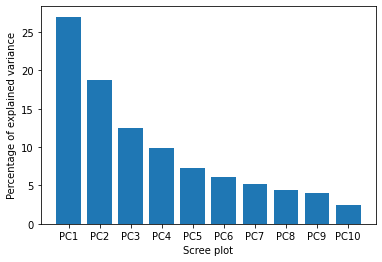

In [35]:
per_var=np.round(model_pca.explained_variance_ratio_*100, decimals=1)
label_list=['PC' + str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=label_list)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Scree plot')
plt.show()

In [36]:
x_reduced.shape

(12, 10)

In [38]:
# Get the loadings of genes on each principal component
gene_loadings=model_pca.components_

# Determine the genes contributing most to the first two principal component
highest_loading_gene=x_train.columns[np.abs(gene_loadings[0]).argsort()[::-1]][:10]
second_highest_loading=x_train.columns[np.abs(gene_loadings[1]).argsort()[::-1]][:10]
print(highest_loading_gene, second_highest_loading)

Index(['ENO1', 'PGAM2', 'HDAC11', 'TPI1', 'TEAD3', 'TEAD1', 'ANGPTL2', 'SDHA',
       'WIPI1', 'SDHB'],
      dtype='object') Index(['RPS6', 'HBXIP', 'NDUFS1', 'HDAC3', 'LDHD', 'FOXO1', 'PIK3CA', 'WIPI2',
       'SIRT1', 'RPS6KB2'],
      dtype='object')


#### ============================================
Since we have a lot of features, we will proceed to a feature selection

In [39]:
model = make_pipeline(SelectKBest(f_classif, k=100), PCA(n_components=10))
model.get_params()
model.fit_transform(x_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array([[-1.73975502e+00,  2.96193502e-02,  8.37239814e-02,
         1.60885274e-01,  1.75469787e-02, -3.82180458e-01,
         1.31936186e+00,  3.11057917e-01, -7.30722746e-03,
        -4.18155450e-01],
       [ 2.65574210e+00, -1.94452557e+00,  6.65326968e-01,
        -5.83263495e-01, -3.12385654e-01, -3.25250875e-02,
         1.48089214e-01,  2.27224672e-01, -7.26696788e-01,
        -1.35285867e-01],
       [ 1.07876783e+00,  1.22785288e+00, -8.65644121e-01,
         6.54631418e-01, -5.04453977e-01,  5.78736224e-01,
         1.19579322e-01,  9.50593079e-01,  2.33968199e-02,
         3.88315924e-01],
       [-1.14159558e+00, -1.36900826e+00, -2.46162750e-01,
        -9.65266874e-01, -7.30126192e-01, -3.77983376e-01,
        -6.37681610e-02,  1.35402373e-03,  6.79889204e-01,
         5.93522878e-01],
       [-6.66961849e-01, -3.66452362e-01, -4.61338976e-01,
        -3.72848139e-01,  5.15066057e-01,  3.43888605e-01,
        -6.99116352e-01,  6.67218644e-01,  3.00653226e-01,
        -5.

In [40]:
model.get_params()

{'memory': None,
 'steps': [('selectkbest', SelectKBest(k=100)), ('pca', PCA(n_components=10))],
 'verbose': False,
 'selectkbest': SelectKBest(k=100),
 'pca': PCA(n_components=10),
 'selectkbest__k': 100,
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 10,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

In [41]:
selector = SelectKBest(f_classif, k=100)
selector.fit(x_train, y_train)
best_columns = selector.get_support(indices=True)
x_train.iloc[:, best_columns]

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


AKT1      AMOT    AMOTL1        AMOTL2    ANGPT1  ATG10   ATG16L1  \
post_6  0.443783  1.000000  0.193695  6.828607e-08  0.405471    1.0  0.307990   
pre_5   0.282746  0.327703  0.193695  1.628197e-07  0.405471    1.0  0.307990   
pre_3   0.190356  0.000000  0.000000  7.201678e-08  0.405471    1.0  0.307990   
post_7  0.514693  1.000000  0.193695  5.536476e-08  0.405471    1.0  0.307990   
post_3  0.456126  1.000000  0.193695  8.738358e-08  0.405471    1.0  0.000000   
pre_8   0.292331  1.000000  0.193695  3.202736e-08  0.405471    1.0  0.618097   
post_8  0.663338  1.000000  0.193695  4.329342e-08  0.405471    1.0  0.307990   
post_4  0.628794  1.000000  0.427032  7.778910e-08  0.405471    1.0  0.307990   
pre_4   0.079306  0.715643  0.193695  1.509662e-07  0.405471    1.0  0.307990   
pre_1   0.000000  0.599116  0.193695  1.304321e-07  0.405471    0.0  0.307990   
pre_6   1.000000  1.000000  0.193695  7.004208e-08  0.030022    1.0  0.307990   
post_5  0.410634  1.000000  0.822414  8.016792e-08  0.405471    1.0  0.307990   

         ATG16L2     ATG2A         ATG2B  ...      TFAM      TPI1      TSC2  \
post_6  0.996134  0.533530  0.000000e+00  ...  0.833342  1.000000  0.420813   
pre_5   0.996134  0.428113  4.381493e-08  ...  0.194992  0.168446  0.269605   
pre_3   0.996134  0.571745  8.676516e-08  ...  0.491427  1.000000  0.416483   
post_7  0.996134  0.283004  1.084924e-07  ...  0.638565  1.000000  0.064584   
post_3  0.996134  0.415713  9.373540e-08  ...  0.922889  1.000000  0.288759   
pre_8   0.996134  0.515493  1.773856e-07  ...  0.497222  1.000000  0.514080   
post_8  0.996134  0.376464  1.095715e-07  ...  0.885293  1.000000  0.410460   
post_4  0.996134  0.436175  8.488887e-08  ...  1.000000  1.000000  0.217939   
pre_4   0.996134  0.623986  1.712782e-07  ...  0.138132  0.000000  0.492350   
pre_1   0.996134  0.451304  1.403972e-07  ...  0.291973  1.000000  0.395177   
pre_6   0.000000  1.000000  1.155584e-07  ...  0.412137  1.000000  1.000000   
post_5  1.000000  0.000000  3.205662e-08  ...  0.220758  1.000000  0.244916   

            ULK1      ULK3    UQCRC1     VEGFA     WIPI1     WIPI2  YAP1  
post_6  0.448580  0.938531  1.000000  1.000000  0.780350  0.627548   1.0  
pre_5   0.506735  0.658967  0.000000  0.048168  0.111603  0.427682   1.0  
pre_3   0.919197  0.626744  0.367411  0.826064  0.018212  0.659593   1.0  
post_7  0.013979  0.835196  0.646350  1.000000  0.739848  0.000000   1.0  
post_3  0.604546  0.402359  0.578284  1.000000  0.453654  0.162894   1.0  
pre_8   1.000000  0.388422  0.493001  1.000000  0.421646  0.946687   1.0  
post_8  0.496342  0.565032  0.685935  1.000000  1.000000  0.393606   1.0  
post_4  0.357425  0.686690  0.898362  1.000000  0.778285  0.441508   1.0  
pre_4   0.708281  0.825146  0.419610  0.820389  0.136175  0.697325   1.0  
pre_1   0.884428  0.624548  0.248113  0.750538  0.000000  0.974080   1.0  
pre_6   0.527795  0.000000  0.939433  0.800045  0.848178  1.000000   1.0  
post_5  0.602217  0.766257  0.569989  1.000000  0.408928  0.672333   1.0  

[12 rows x 100 columns]

### ================ We will work again with a Decision and start our feature selection===========

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [43]:
model=model_tree.fit(x_train, y_train)

[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

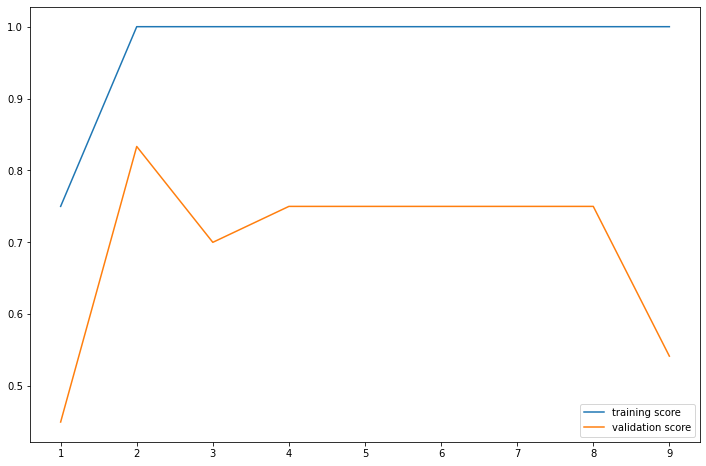

In [44]:
evaluation(model)

In [178]:
# We have an overfitting learning curve

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

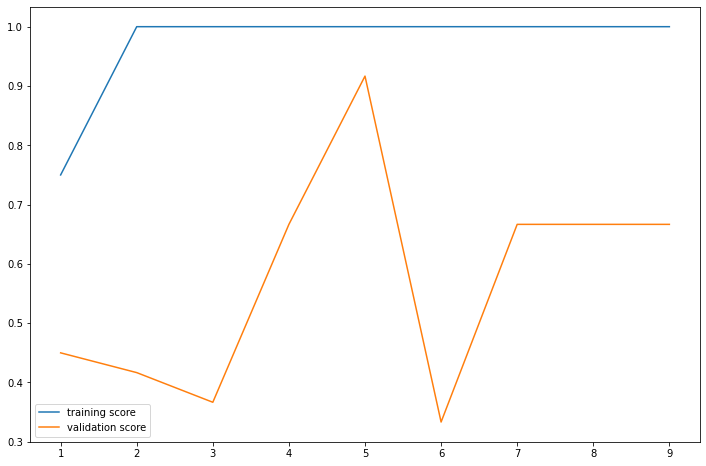

In [154]:
model=make_pipeline(SelectKBest(f_classif, k=100), DecisionTreeClassifier())
evaluation(model)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  57 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenov

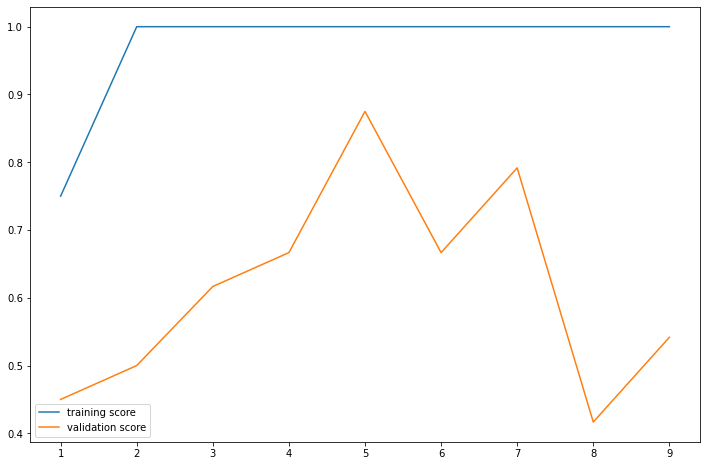

In [153]:
model=make_pipeline(SelectKBest(f_classif, k=50), DecisionTreeClassifier())
evaluation(model)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn

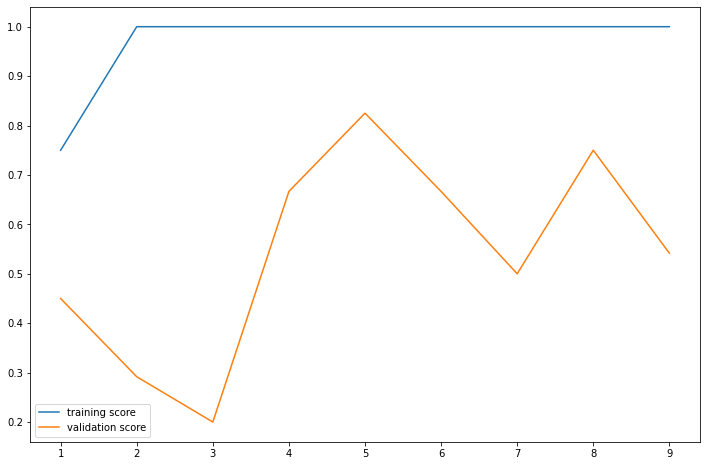

In [146]:
model=make_pipeline(SelectKBest(f_classif, k=20), DecisionTreeClassifier())
evaluation(model)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

k = 1
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  14  17  27  31  33  38  39  41  50  51  57  67 110 113 119 122 123
 140 145 147 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_select

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 38 39 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Leno

None
k = 2
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  66 123] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % c

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  57 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38  57 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Le

None
k = 3
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero en

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = 

None
k = 4
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_featu

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  57 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenov

None
k = 5
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero en

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by

None
k = 6
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % c

None
k = 7
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  57 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\an

None
k = 8
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda

None
k = 9
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\featu

None
k = 10
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  14  17  27  31  33  38  39  41  50  51  57  67 110 113 119 122 123
 140 145 147 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by

None
k = 11
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  66 123] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in tru

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = 

None
k = 12
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  66 123] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 38 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % c

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = 

None
k = 13
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Featur

None
k = 14
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  1

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  57 145] are constant.
  warnings.warn("Features %s 

None
k = 15
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero en

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  57 145] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\an

None
k = 16
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero en

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 38 39 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Leno

None
k = 17
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  14  17  27  31  33  38  39  41  50  51  57  67 110 113 119 122 123
 140 145 147 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_select

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  57 145] are constant.
  warnings.warn("Features %s 

None
k = 18
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Featur

None
k = 19
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = 

None
k = 20
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero en

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 38 39 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Leno

None
k = 21
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 14  16  27  38  39  46  52  57  66  72  82 100 134 145 147 156] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by

None
k = 22
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  14  17  27  31  33  38  39  41  50  51  57  67 110 113 119 122 123
 140 145 147 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38 114 123 140 145 157 170] 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Use

None
k = 23
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 30  38  41  50 110 113 114 119 122 123 157 170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  38  66 123] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in tru

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn

None
k = 24
[[2 0]
 [2 0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selecti

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 16  17  57 131 145 147] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 27 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 17  57 145] are constant.
  warnings.warn("Features %s 

None


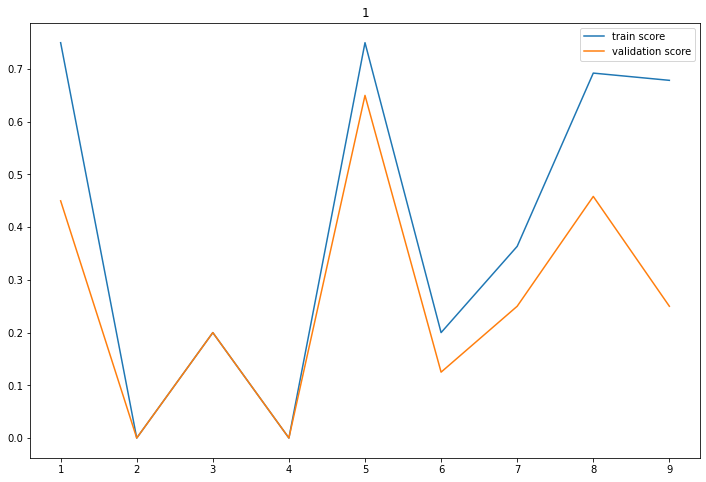

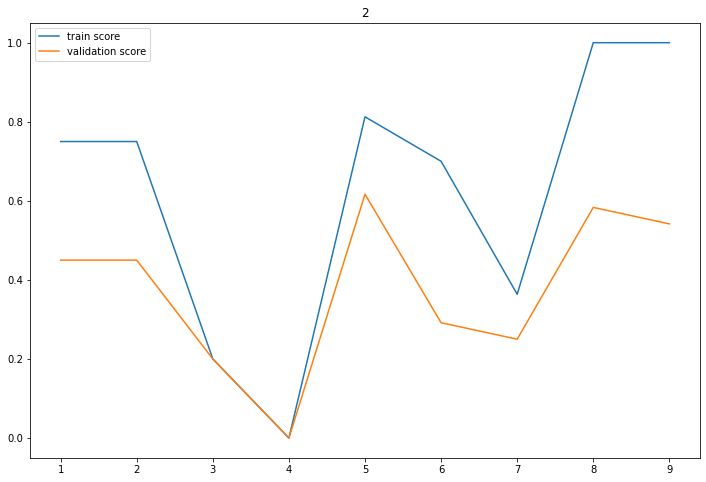

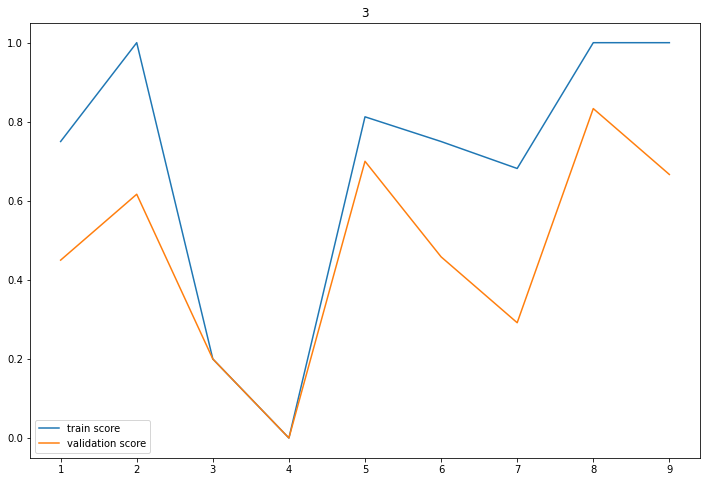

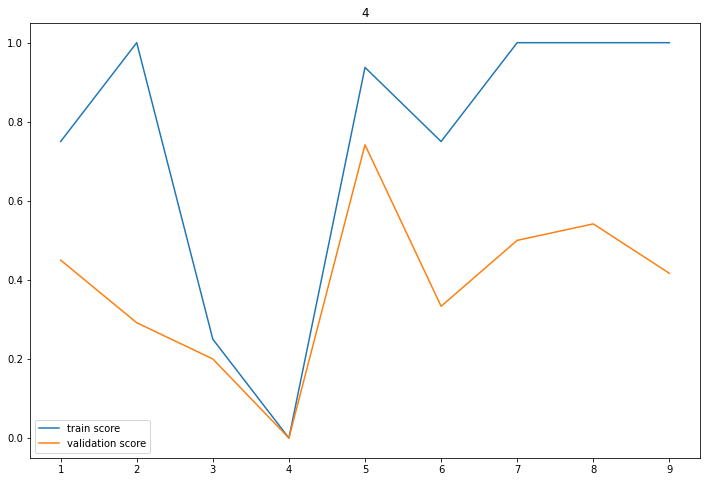

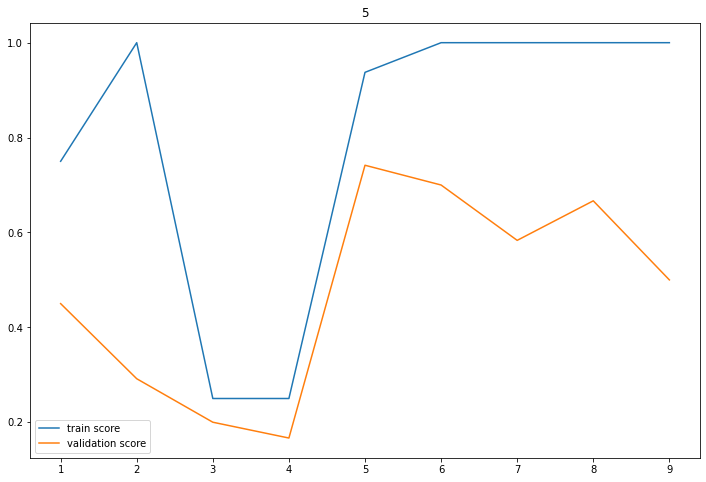

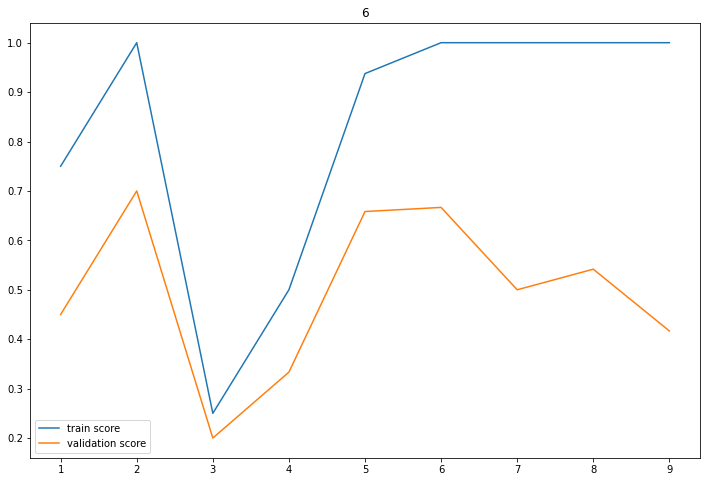

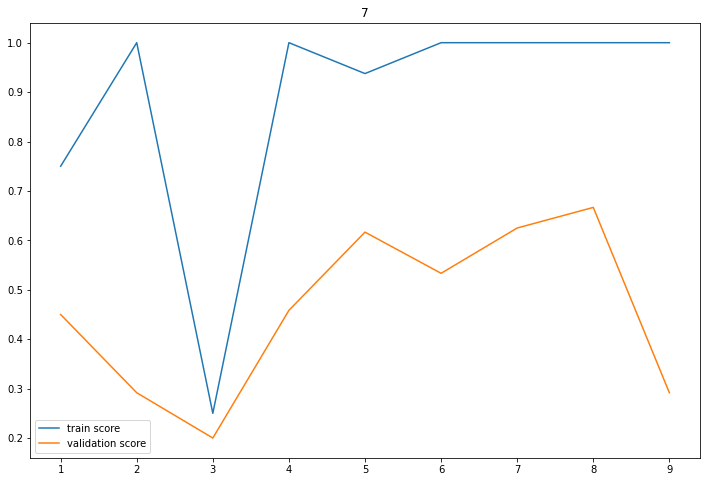

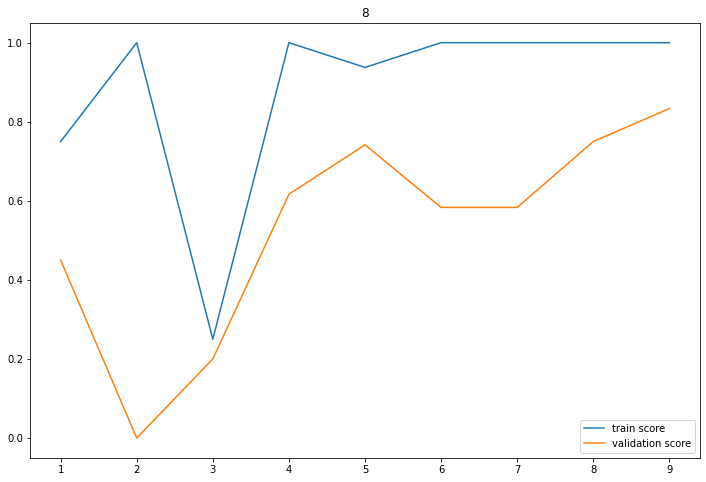

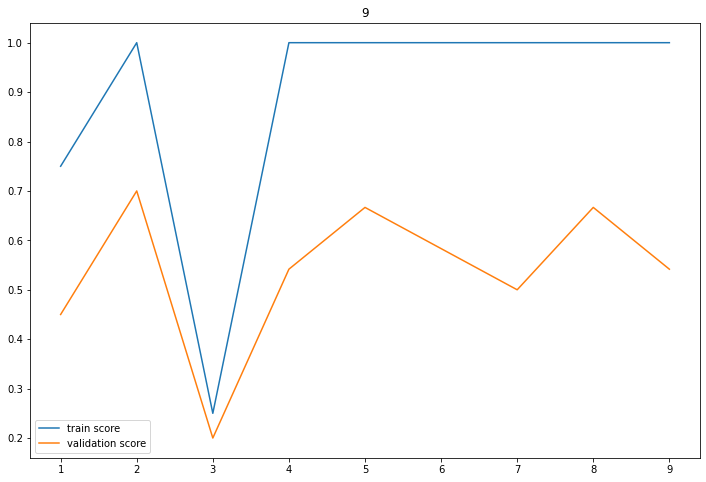

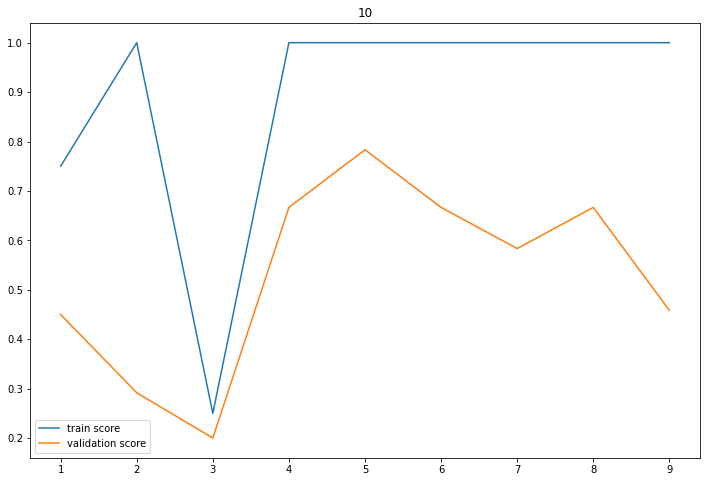

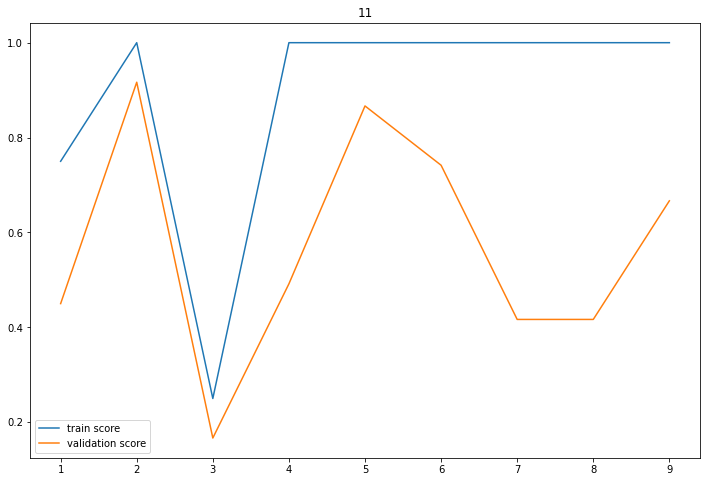

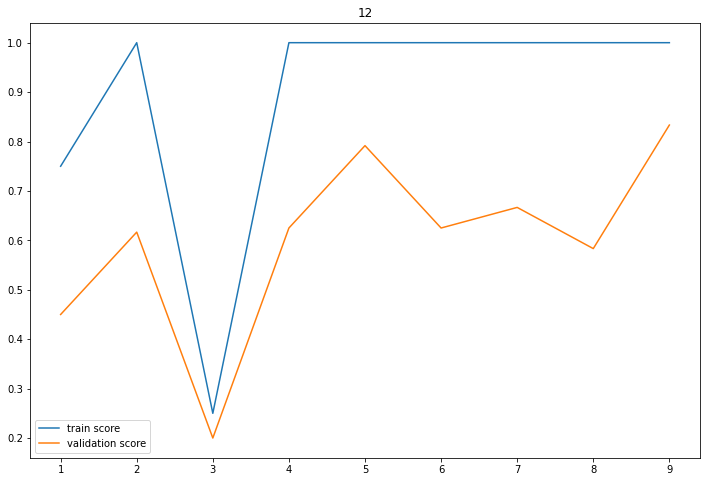

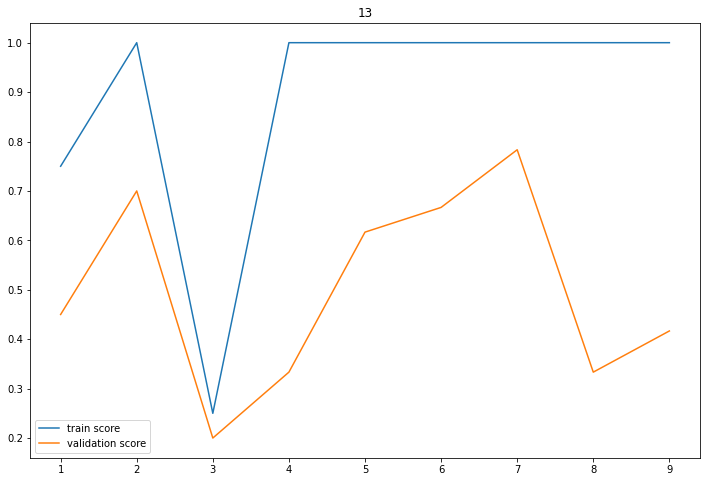

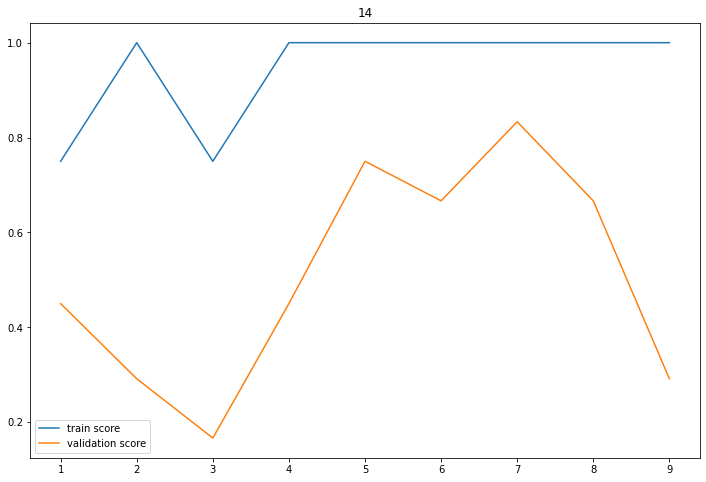

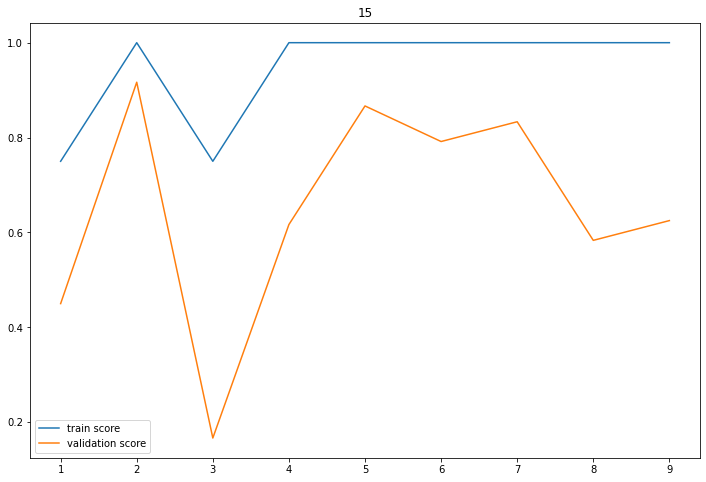

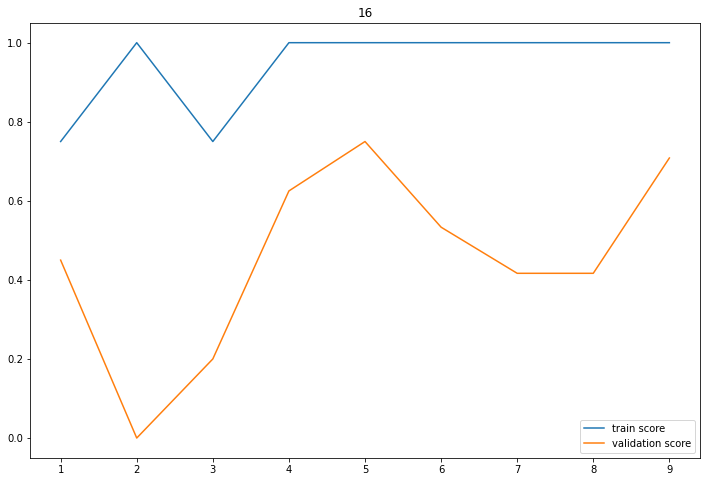

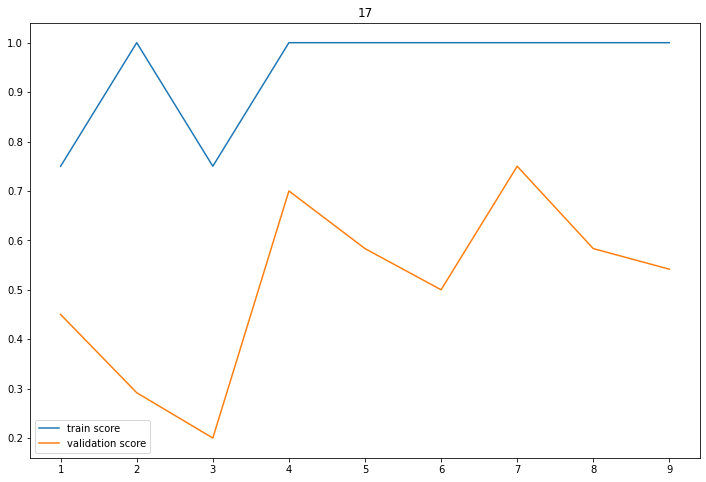

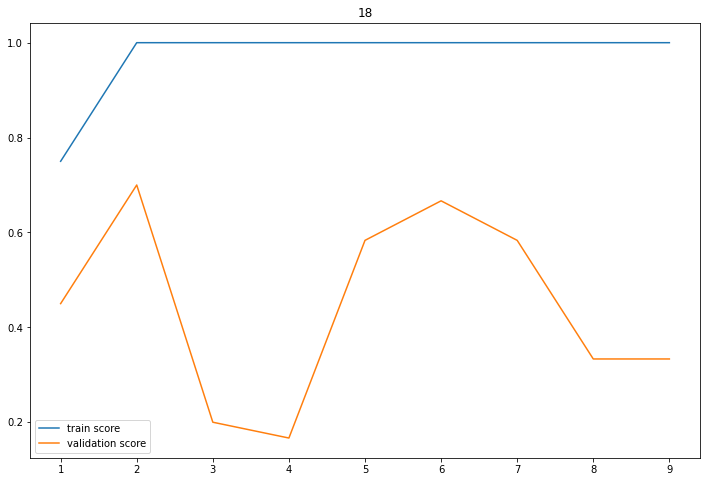

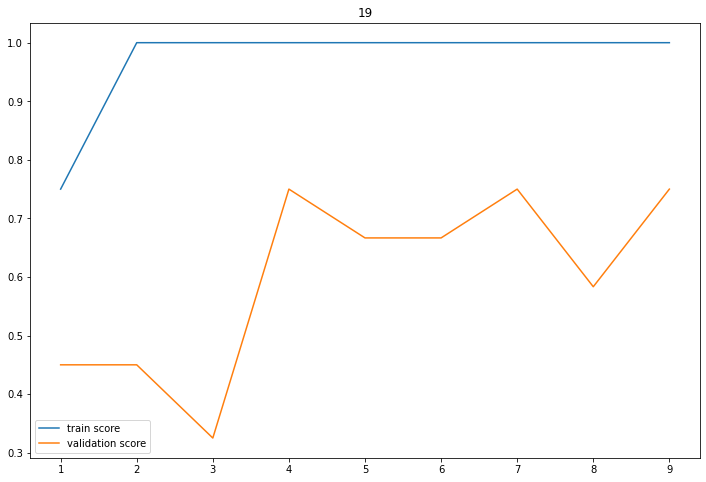

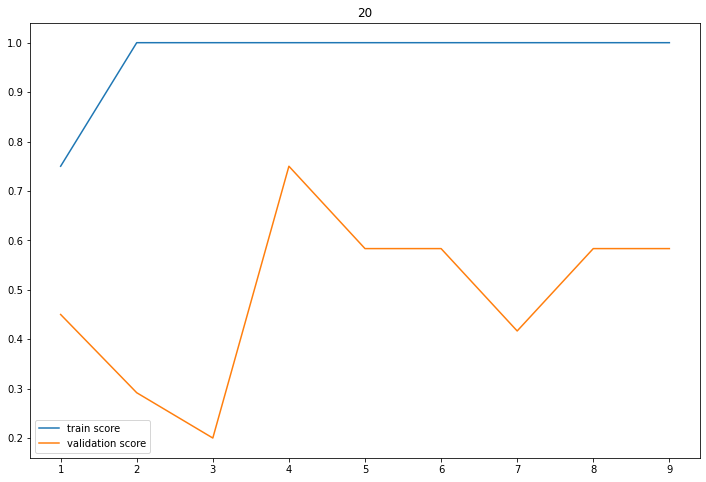

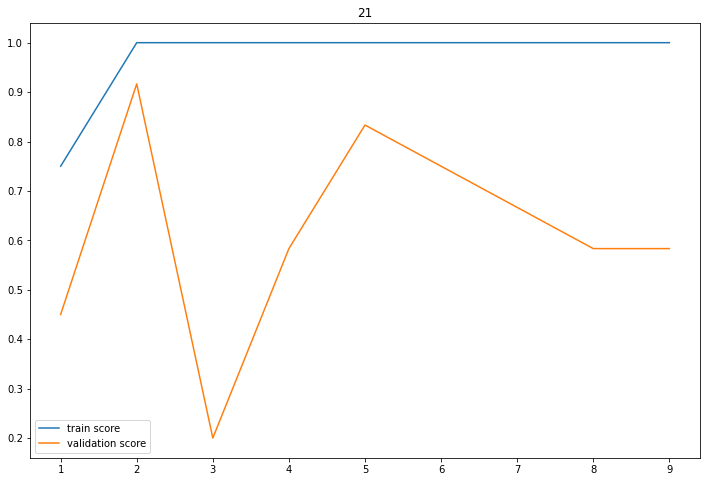

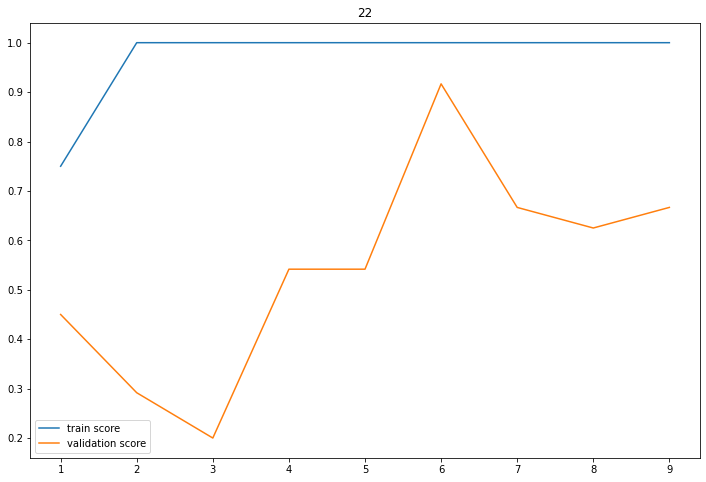

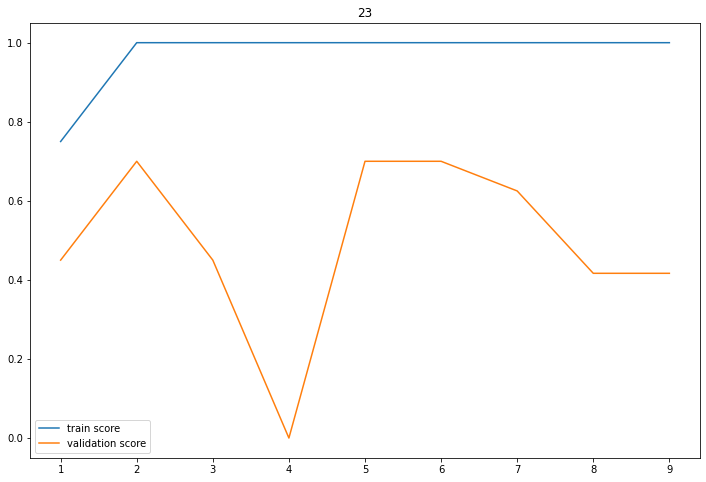

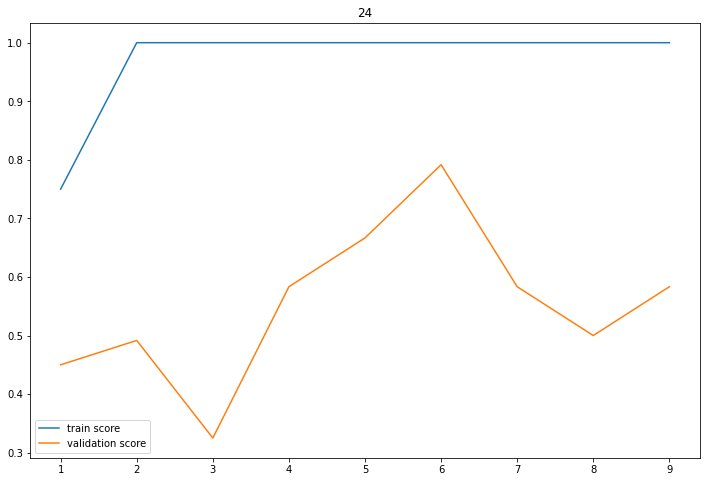

In [152]:
for i in range(1, 25): 
    model = make_pipeline(SelectKBest(f_classif, k=i), DecisionTreeClassifier(random_state=0))

    def evaluation_2(model):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
        print('k =', i)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        N, train_score, val_score = learning_curve(model, x_train, y_train,cv=4,  scoring='f1', train_sizes=np.linspace(0.1,1,10))

        plt.figure(figsize=(12, 8))
        plt.title(i)
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
    
    
    print(evaluation_2(model))

In [155]:
# 19 parameters seems to be the best choice here, but still in overfitting

We will try VarianceThreshold

In [156]:
from sklearn.feature_selection import VarianceThreshold
x_train.var(axis=0)

AKT1     7.545226e-02
AKT2     5.415275e-02
AKT3     2.136788e-02
ALDOA    8.333332e-02
ALDOB    4.472846e-02
             ...     
VEGFA    7.400927e-02
WIPI1    1.235508e-01
WIPI2    9.858088e-02
WWTR1    5.727641e-02
YAP1     2.573374e-15
Length: 182, dtype: float64

In [166]:
selector = VarianceThreshold(threshold=0.9)
selector.fit_transform(x_train)
selector.get_support()

ValueError: No feature in X meets the variance threshold 0.90000

even at a threshold as high as 0.9, no features seems to be rejected

In [45]:
model = make_pipeline(SelectKBest(f_classif, k=19), DecisionTreeClassifier(random_state=0))

In [46]:
selector = SelectKBest(f_classif, k=19)
selector.fit(x_train, y_train)
mask = selector.get_support()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [47]:
x_train.columns[mask]

Index(['ATP5A1', 'ATP5B', 'DEPDC5', 'HBXIP', 'HK2', 'KIAA0652', 'LDHD',
       'NDUFA9', 'NDUFS1', 'PFKFB3', 'PIK3CA', 'PPARGC1A', 'SDHB', 'SIRT3',
       'TAZ', 'TFAM', 'ULK1', 'WIPI1', 'WIPI2'],
      dtype='object')

In [48]:
selectkbest=['ATP5A1', 'ATP5B', 'DEPDC5', 'HBXIP', 'HK2', 'KIAA0652', 'LDHD',
       'NDUFA9', 'NDUFS1', 'PFKFB3', 'PIK3CA', 'PPARGC1A', 'SDHB', 'SIRT3',
       'TAZ', 'TFAM', 'ULK1', 'WIPI1', 'WIPI2']

In [49]:
pca_best_features=['ENO1', 'PGAM2', 'HDAC11', 'TPI1', 'TEAD3', 'TEAD1', 'ANGPTL2', 'SDHA',
 'WIPI1', 'SDHB', 'RPS6', 'HBXIP', 'NDUFS1', 'HDAC3', 'LDHD', 'FOXO1', 'PIK3CA', 'WIPI2','SIRT1', 'RPS6KB2']

In [50]:
best_features=[i for i in selectkbest if i in pca_best_features]
print(best_features)

['HBXIP', 'LDHD', 'NDUFS1', 'PIK3CA', 'SDHB', 'WIPI1', 'WIPI2']


In [51]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(DecisionTreeClassifier(), threshold='mean')
selector.fit_transform(x_train, y_train)
mask=selector.get_support()
selectfrommodel = x_train.columns[mask]
selectfrommodel

Index(['HBXIP'], dtype='object')

We will try with RFE

In [52]:
from sklearn.feature_selection import RFECV
selector = RFECV(DecisionTreeClassifier(), step=1, min_features_to_select=2, cv=5)
selector.fit(x_train, y_train)
selector.ranking_

array([53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37,
       36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [53]:
selector.grid_scores_

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.5       ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.5       ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.5       ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.5       ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.5       ],
       [0.66666667, 0.66666667, 0.5       , 1.        , 0.        ],
       [0.66666667, 0.66666667, 0.

In [54]:
mask=selector.get_support()
rfecv_features=x_train.columns[mask]
rfecv_features

Index(['FLT1', 'FLT4', 'FOXO1', 'FOXO3', 'FOXO4', 'FRAP1', 'GABARAP',
       'GABARAPL1', 'GABARAPL2', 'GAPDH',
       ...
       'TSC2', 'ULK1', 'ULK2', 'ULK3', 'UQCRC1', 'VEGFA', 'WIPI1', 'WIPI2',
       'WWTR1', 'YAP1'],
      dtype='object', length=130)

#### We have a list of different parameters that are common to the different feature selection approach

In [81]:
a=[i for i in rfecv_features if i in selectkbest]
b=[j for j in rfecv_features if j in pca_best_features]
c=[k for k in rfecv_features if k in selectkbest and k in pca_best_features]

In [185]:
print('a:', a)
print('b:', b)
print('c:', c)

a: ['HBXIP', 'HK2', 'KIAA0652', 'LDHD', 'NDUFA9', 'NDUFS1', 'PFKFB3', 'PIK3CA', 'PPARGC1A', 'SDHB', 'SIRT3', 'TAZ', 'TFAM', 'ULK1', 'WIPI1', 'WIPI2']
b: ['FOXO1', 'HBXIP', 'HDAC11', 'HDAC3', 'LDHD', 'NDUFS1', 'PGAM2', 'PIK3CA', 'RPS6', 'RPS6KB2', 'SDHA', 'SDHB', 'SIRT1', 'TEAD1', 'TEAD3', 'TPI1', 'WIPI1', 'WIPI2']
c: ['HBXIP', 'LDHD', 'NDUFS1', 'PIK3CA', 'SDHB', 'WIPI1', 'WIPI2']


In [83]:
best_features = []
for i in a:
    for j in b:
        for k in c:
            if i not in b and i not in c:
                if i not in best_features: 
                    best_features.append(i)
            if j not in a and j not in c:
                if j not in best_features: 
                    best_features.append(j)
            if k not in a and k not in b:
                if k not in best_features: 
                    best_features.append(k)
# best_features=set(best_features)
best_features

['FOXO1',
 'HDAC11',
 'HDAC3',
 'PGAM2',
 'RPS6',
 'RPS6KB2',
 'SDHA',
 'SIRT1',
 'TEAD1',
 'TEAD3',
 'TPI1',
 'HK2',
 'KIAA0652',
 'NDUFA9',
 'PFKFB3',
 'PPARGC1A',
 'SIRT3',
 'TAZ',
 'TFAM',
 'ULK1']

In [91]:
print(x_train[best_features])
print(y_train)
print(x_test[best_features])
print(y_test)

           FOXO1    HDAC11     HDAC3     PGAM2      RPS6   RPS6KB2      SDHA  \
post_6  0.020792  1.000000  0.497987  1.000000  0.480290  0.384454  0.977193   
pre_5   0.731739  0.105454  0.042237  0.000000  0.000000  0.238234  0.000000   
pre_3   0.791313  1.000000  1.000000  1.000000  1.000000  0.624341  0.374901   
post_7  0.091435  1.000000  0.000000  1.000000  0.158557  0.000000  0.784830   
post_3  0.819103  1.000000  0.274257  1.000000  0.641884  0.486979  0.844040   
pre_8   0.754130  1.000000  0.850886  1.000000  0.649088  0.629082  0.654193   
post_8  0.278158  1.000000  0.474455  1.000000  0.567184  0.609581  0.944908   
post_4  0.020310  1.000000  0.288508  1.000000  0.042775  0.238372  1.000000   
pre_4   1.000000  0.090260  0.205444  0.126696  0.224792  0.153231  0.507958   
pre_1   0.697562  1.000000  0.675904  1.000000  0.964863  0.752480  0.052001   
pre_6   0.944119  1.000000  0.974242  1.000000  0.873083  1.000000  0.886014   
post_5  0.985991  1.000000  0.216145  1.

In [92]:
x_train=x_train[best_features]
x_test=x_test[best_features]

In [93]:
x_train

FOXO1    HDAC11     HDAC3     PGAM2      RPS6   RPS6KB2      SDHA  \
post_6  0.020792  1.000000  0.497987  1.000000  0.480290  0.384454  0.977193   
pre_5   0.731739  0.105454  0.042237  0.000000  0.000000  0.238234  0.000000   
pre_3   0.791313  1.000000  1.000000  1.000000  1.000000  0.624341  0.374901   
post_7  0.091435  1.000000  0.000000  1.000000  0.158557  0.000000  0.784830   
post_3  0.819103  1.000000  0.274257  1.000000  0.641884  0.486979  0.844040   
pre_8   0.754130  1.000000  0.850886  1.000000  0.649088  0.629082  0.654193   
post_8  0.278158  1.000000  0.474455  1.000000  0.567184  0.609581  0.944908   
post_4  0.020310  1.000000  0.288508  1.000000  0.042775  0.238372  1.000000   
pre_4   1.000000  0.090260  0.205444  0.126696  0.224792  0.153231  0.507958   
pre_1   0.697562  1.000000  0.675904  1.000000  0.964863  0.752480  0.052001   
pre_6   0.944119  1.000000  0.974242  1.000000  0.873083  1.000000  0.886014   
post_5  0.985991  1.000000  0.216145  1.000000  0.111408  0.586430  0.465341   

           SIRT1     TEAD1     TEAD3      TPI1       HK2  KIAA0652  NDUFA9  \
post_6  0.488270  0.526766  0.964363  1.000000  0.575129  0.505820     1.0   
pre_5   0.198354  0.000000  0.000000  0.168446  0.368908  0.361040     1.0   
pre_3   0.932235  0.436507  0.842275  1.000000  0.239130  0.511038     1.0   
post_7  0.202887  0.717572  0.332415  1.000000  1.000000  0.372539     1.0   
post_3  0.580072  0.427012  0.924431  1.000000  0.575129  0.045864     1.0   
pre_8   1.000000  1.000000  0.733091  1.000000  0.448096  0.756054     1.0   
post_8  0.677300  0.935103  1.000000  1.000000  0.982038  0.357125     1.0   
post_4  0.091251  0.928469  0.840783  1.000000  0.575129  0.000191     1.0   
pre_4   0.361437  0.055324  0.423261  0.000000  0.234976  0.551808     1.0   
pre_1   0.858874  0.469229  0.693544  1.000000  0.000000  0.599525     1.0   
pre_6   0.705670  0.769362  0.995220  1.000000  0.374691  0.751432     1.0   
post_5  0.193085  0.296451  0.364714  1.000000  0.363822  0.102042     1.0   

          PFKFB3  PPARGC1A     SIRT3       TAZ      TFAM      ULK1  
post_6  0.000000  0.686321  1.000000  1.000000  0.833342  0.448580  
pre_5   0.395989  0.458729  0.056201  0.000000  0.194992  0.506735  
pre_3   0.520928  0.317852  0.380646  0.422483  0.491427  0.919197  
post_7  0.303647  0.686321  0.342240  0.881560  0.638565  0.013979  
post_3  0.395989  0.887388  0.711641  0.683989  0.922889  0.604546  
pre_8   0.487871  0.686321  0.480728  0.595282  0.497222  1.000000  
post_8  0.033450  1.000000  0.823190  0.856822  0.885293  0.496342  
post_4  0.197593  0.686321  0.908545  0.869522  1.000000  0.357425  
pre_4   0.503447  0.482187  0.589270  0.114906  0.138132  0.708281  
pre_1   1.000000  0.449341  0.000000  0.441412  0.291973  0.884428  
pre_6   0.395989  0.686321  0.602993  0.445446  0.412137  0.527795  
post_5  0.074972  0.686321  0.653437  0.549289  0.220758  0.602217

# 4. Modeling
- Training different models (don't forget to try bagging, boosting)
- Optimization with GridSearchCV and hyperparameters tunning
- (optional) Return to pre-processing / EDA
- Learning curve and decision-making

In [98]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

#### First we will try with classification

In [100]:
model1=DecisionTreeClassifier(random_state=0)
model2=RandomForestClassifier(random_state=0)
model3=KNeighborsClassifier(n_neighbors=2)
model4=LinearSVC()
model5=SGDClassifier()

model6=VotingClassifier([('Tree', model1), 
                        ('Forest', model2), 
                        ('KNN', model3), 
                        ('Linear', model4),
                        ('SGD', model5)], 
                       voting='hard')
for model in (model1, model2, model3, model4, model5, model6):
    model.fit(x_train, y_train)
    print(model.__class__.__name__, model.score(x_test, y_test))

DecisionTreeClassifier 0.75
RandomForestClassifier 0.75
KNeighborsClassifier 0.75
LinearSVC 0.75
SGDClassifier 0.75
VotingClassifier 0.75


DecisionTreeClassifier(random_state=0)
[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


None
RandomForestClassifier(random_state=0)
[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


None
KNeighborsClassifier(n_neighbors=2)
[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_sco

None
LinearSVC()
[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(


None
SGDClassifier()
[[1 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(


None
VotingClassifier(estimators=[('Tree', DecisionTreeClassifier(random_state=0)),
                             ('Forest', RandomForestClassifier(random_state=0)),
                             ('KNN', KNeighborsClassifier(n_neighbors=2)),
                             ('Linear', LinearSVC()),
                             ('SGD', SGDClassifier())])
[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(


None


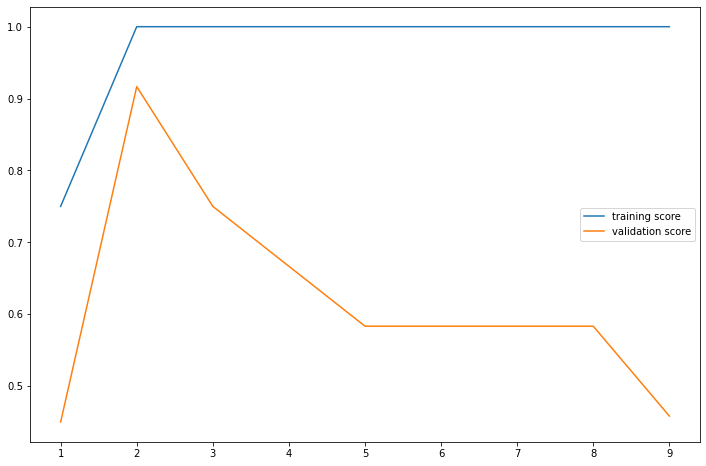

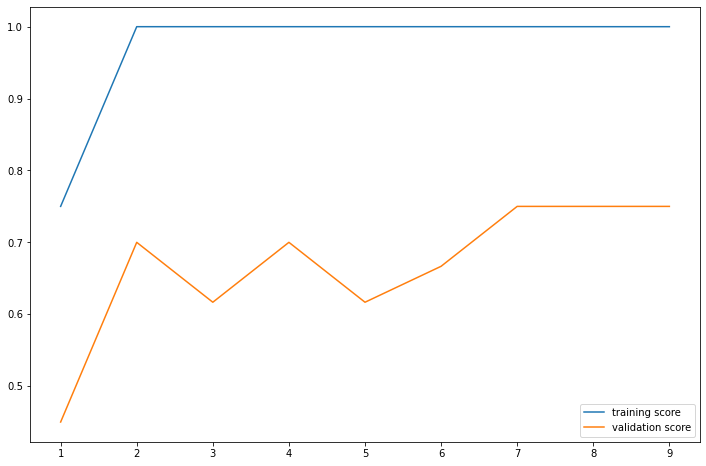

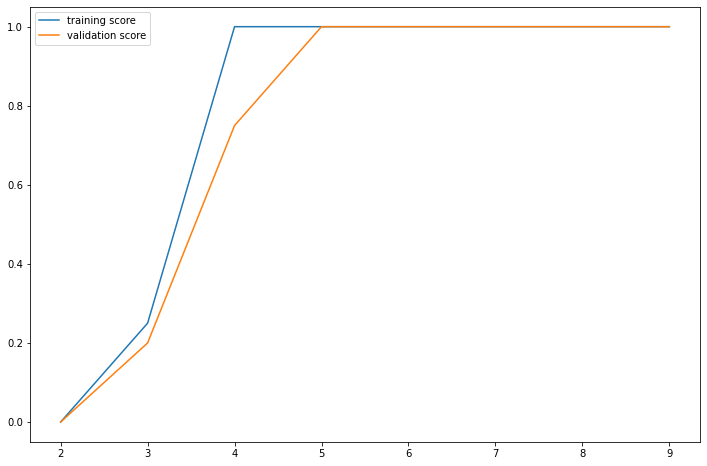

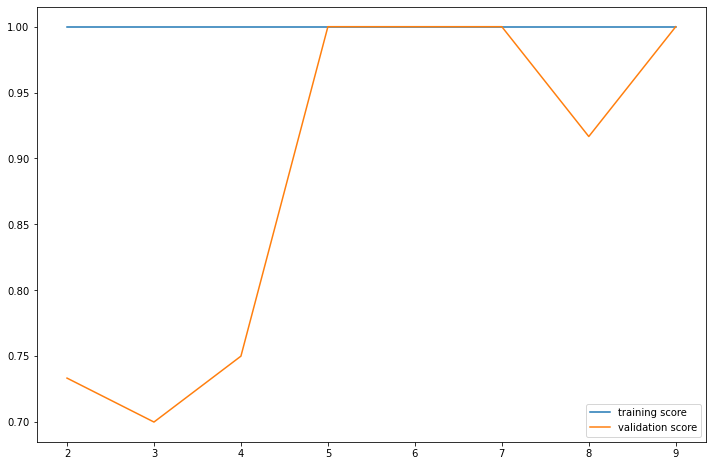

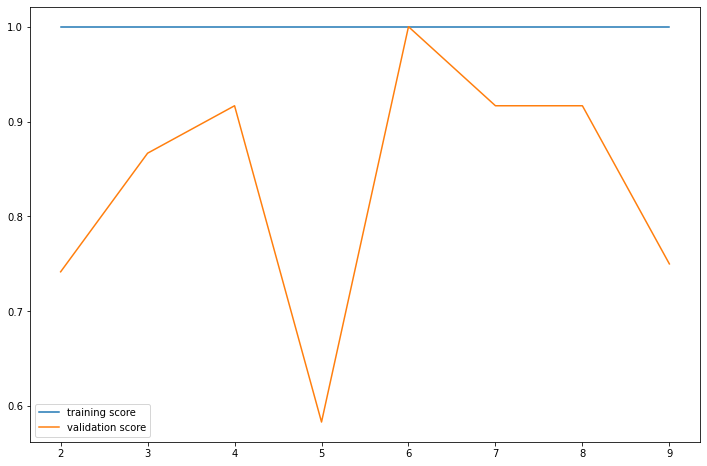

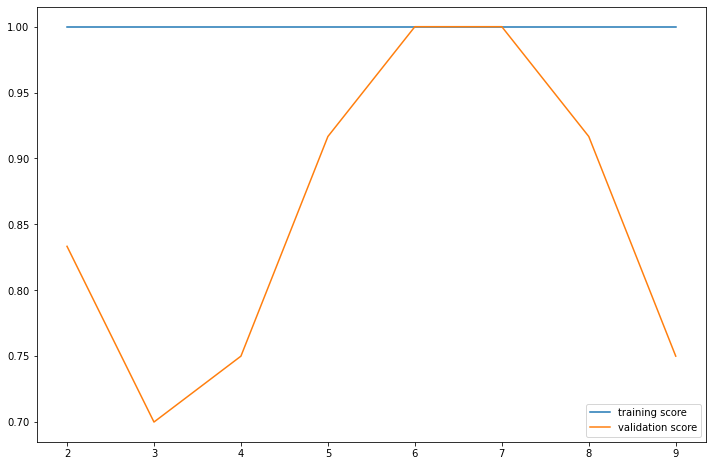

In [104]:
for model in (model1, model2, model3, model4, model5, model6):
    print(model)
    print(evaluation(model))

- They all score the same. The sample size is certainly a limiting factor 
- Nevertheless, based on the graph we can conclude that : 
    - RandomForest is in overfitting but the testing results gradually and reasonably increases (0.5 - 0.75)
    - KNN is in overfitting too but the testing line closely follows the training line (0.0 - 1.0)
    - LinearSVC is similar to KNN, except that they start from higher so it seems more reasonable (0.75 - 1.0)
#### We will now try with boosting

In [115]:
adaboost=AdaBoostClassifier(n_estimators=100)
adaboost.fit(x_train, y_train)
adaboost.score(x_test, y_test)

0.75

[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


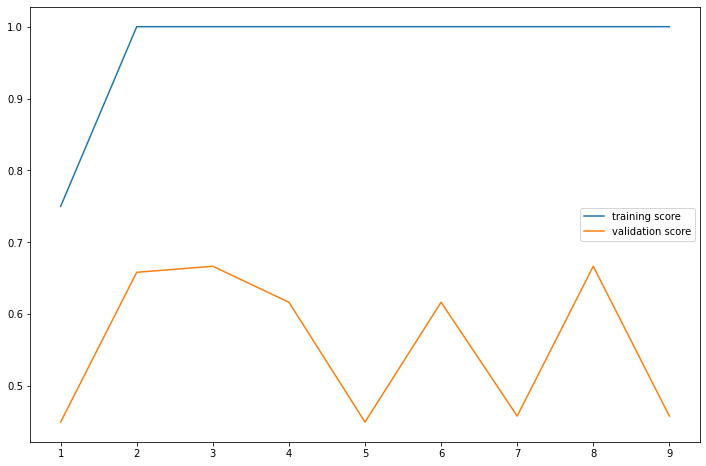

In [166]:
evaluation(adaboost)

In [117]:
from xgboost import XGBClassifier

In [120]:
xgb=XGBClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_test, y_test)

0.5

#### We wil now work with LinearSVC
- we will create a pipeline

In [182]:
from sklearn import set_config
set_config(display='text')

In [183]:
model4.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 9 instead of 10.
  warnings.warn(


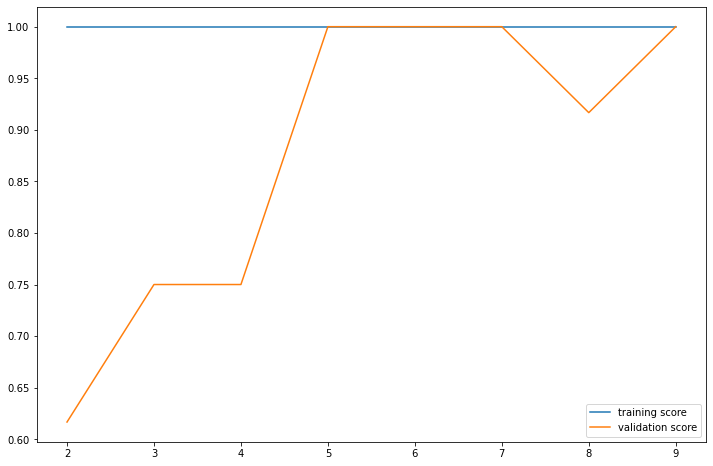

In [184]:
# As a reminder, the evaluation function fit x_train and y_train to the model, and return the y_pred
linearmodel=make_pipeline(PolynomialFeatures(2), LinearSVC(random_state=0))
evaluation(linearmodel)

In [189]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
linearmodel.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearsvc', LinearSVC(random_state=0))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'linearsvc': LinearSVC(random_state=0),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearsvc__C': 1.0,
 'linearsvc__class_weight': None,
 'linearsvc__dual': True,
 'linearsvc__fit_intercept': True,
 'linearsvc__intercept_scaling': 1,
 'linearsvc__loss': 'squared_hinge',
 'linearsvc__max_iter': 1000,
 'linearsvc__multi_class': 'ovr',
 'linearsvc__penalty': 'l2',
 'linearsvc__random_state': 0,
 'linearsvc__tol': 0.0001,
 'linearsvc__verbose': 0}

In [190]:
hyper_params = {'polynomialfeatures__degree': [2, 3, 4, 5], 
                'linearsvc__C': [1.0, 10.0, 10.0],
                'linearsvc__loss': ['hinge', 'squared_hinge'], 
               'linearsvc__penalty': ['l1', 'l2']}

In [196]:
grid = RandomizedSearchCV(linearmodel, hyper_params, n_iter=50, scoring='recall', cv=4)

In [197]:
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred=grid.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'polynomialfeatures__degree': 2, 'linearsvc__penalty': 'l2', 'linearsvc__loss': 'hinge', 'linearsvc__C': 1.0}
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_libline

In [198]:
from sklearn.metrics import precision_recall_curve

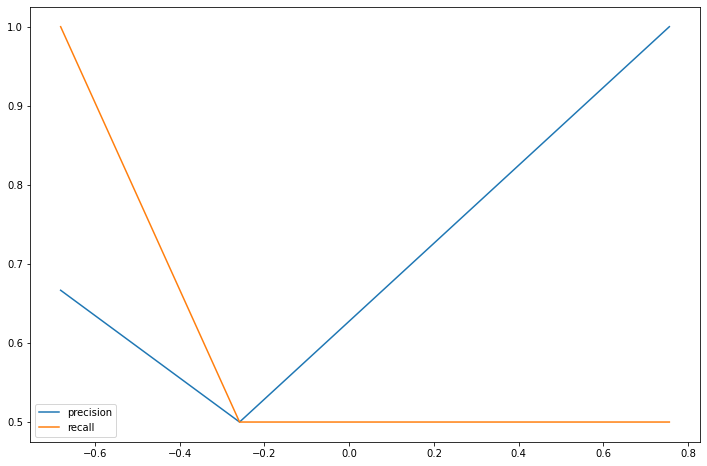

In [199]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))
plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [201]:
def final_model(model, x, threshold=0):
    return model.decision_function(x) > threshold

In [202]:
y_pred = final_model(grid.best_estimator_, x_test, threshold=-0.7)

In [203]:
f1_score(y_test, y_pred)

0.8

In [204]:
from sklearn.metrics import recall_score

In [205]:
recall_score(y_test, y_pred)

1.0